#### Check out the Notion for more Information ####
Notion page -> https://www.notion.so/Essence_of_Healthy_Stocks-18e0b9858ca88059afd2f08c9cd8e61f?pvs=4

This is the second process of the study !!!!

In [19]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import date
import matplotlib as plt
from IPython.display import Image
from lib import functions


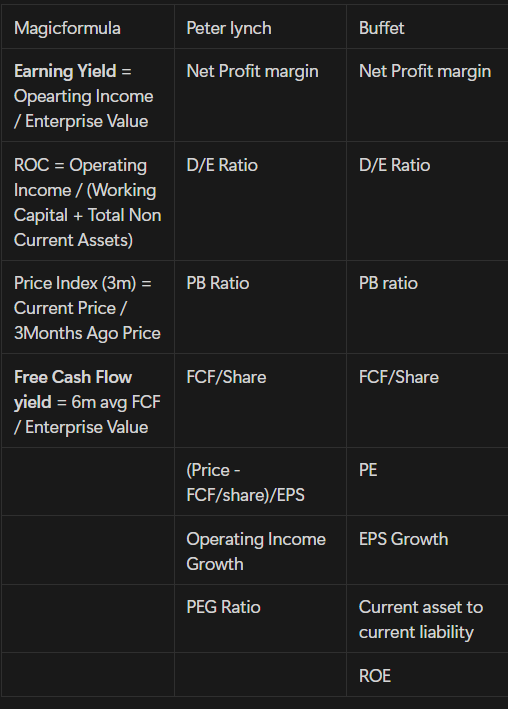

In [20]:
Image(filename='{6B164E19-AB08-4ECC-ADDC-80A486956487}.png')
## Here I categorize tasks into two groups ##
### 1) Common Indicators with No calculation  which are NPM, D/E Ratio, PB Ratio, PE Ratio and FCF/share. In addition, I need to scrap some basic information for the second task calculation as well.
### 2) Indicators with calculation which are the remainings.


In [21]:
## Firstly, let me build up a list of tickers ####
list_stock_th = pd.read_excel('list_tickers/stock_info_th.xlsx', sheet_name='listedCompanies_th_TH',skiprows=1)
df_list_stock_th = pd.DataFrame(list_stock_th['หลักทรัพย์'].astype('str') + '.bk')
df_list_stock_th['market'] = list_stock_th['ตลาด']
df_list_stock_th = df_list_stock_th.rename(columns={'หลักทรัพย์' : 'ticker'})
df_list_stock_th = df_list_stock_th.reset_index(drop=True)

list_stock_sp500 = pd.read_csv('list_tickers/stock_info_s&p500.csv')
df_list_stock_sp500 = pd.DataFrame(list_stock_sp500['Symbol'].astype('str'))
df_list_stock_sp500 = df_list_stock_sp500.rename(columns={'Symbol' : 'ticker'})
df_list_stock_sp500 = df_list_stock_sp500.drop_duplicates()
df_list_stock_sp500['market'] = 'sp500'

list_stock_us1 = pd.read_csv('list_tickers/stock_info_us_1.csv')
list_stock_us2 = pd.read_csv('list_tickers/stock_info_us_2.csv')

df_list_stock_us1 = pd.DataFrame(list_stock_us1['Symbol'].astype('str'))
df_list_stock_us = pd.concat([df_list_stock_us1,list_stock_us2['Symbol'].astype('str')])
df_list_stock_us = df_list_stock_us.rename(columns={'Symbol' : 'ticker'})
df_list_stock_us = df_list_stock_us.drop_duplicates()
df_list_stock_us['market'] = 'US'

df_list_stock_us_all = pd.concat([df_list_stock_sp500,df_list_stock_us])
df_list_stock_us_all = df_list_stock_us_all.drop_duplicates('ticker')
df_list_stock_us_all = df_list_stock_us_all.reset_index(drop=True)

df_list_stock = pd.concat([df_list_stock_th,df_list_stock_us_all])
df_list_stock = df_list_stock.reset_index(drop=True)

## For the sake of study, I filter out and take only stock in S and P 500 ##

stockmarket = 'US'
df_list_stock = df_list_stock.loc[df_list_stock['market'] == stockmarket]
df_list_stock = df_list_stock.reset_index(drop=True)
# df_list_stock = df_list_stock[:10]

print(df_list_stock)

     ticker market
0      AACG     US
1      AADI     US
2      AAGR     US
3     AAGRW     US
4      AAME     US
...     ...    ...
6257    ZTO     US
6258    ZTR     US
6259    ZUO     US
6260   ZVIA     US
6261    ZWS     US

[6262 rows x 2 columns]


In [22]:
#### Now, we begin task1 ####

# 1st pulling date for this data #
df_list_stock['date_pulling'] = date.today()
# 2nd acquiring information from .info #
info_attribute_list = [
    'industry',
    'sector',
    'enterpriseValue',
    'totalCashPerShare',
    'profitMargins',
    # 'trailingPE',
    # 'beta',
    # 'sharesOutstanding',
    'priceToBook',
    'debtToEquity',
    'returnOnEquity',
    'currentRatio',
    # 'trailingPegRatio',
    # 'currentPrice',
    'trailingEps'
]
# 3rd acquiring information from .quarterly_balance_sheet #
balancesheet_list = [
    'Total Non Current Assets',
    'Working Capital'
]
# 4th acquiring information from .quarterly_financials #
ttm = 4
financials_list = [
    # 'EBIT',
    'Operating Income'
]

# 5th acquiring information from .quarterly_cash_flow #
ttm_c = 2
cashflow_list = [
    'Free Cash Flow'
]

In [23]:
info_attribute_list_buffer = []
balancesheet_list_buffer = []
financials_list_buffer = []
cashflow_list_buffer = []
normalised_OI_index_list_buffer = []
average_MF_ROC_list_buffer = []
pricerelated_list_bugger = []

In [24]:
# 1st pulling date for this data #
df_list_stock['date_pulling'] = date.today()

for i in range(len(df_list_stock)) :
    print(i, "/", len(df_list_stock)-1 ,df_list_stock['ticker'][i])
    yfticker = yf.Ticker(df_list_stock['ticker'][i])
    # 2nd acquiring information from .info #
    info_attribute_list_buffer_r = []
    for j in range(len(info_attribute_list)):
        try:
            info_attribute_list_buffer_r.append(yfticker.info[info_attribute_list[j]])
        except:
            info_attribute_list_buffer_r.append(None)
    info_attribute_list_buffer.append(info_attribute_list_buffer_r)

    # 3rd acquiring information from .balancesheet #
    balancesheet_list_buffer_r = []
    for j in range(len(balancesheet_list)):
        try:
            balancesheet_list_buffer_r.append(yfticker.quarterly_balance_sheet.loc[yfticker.quarterly_balance_sheet.index == balancesheet_list[j]].values[0][0])
        except:
            balancesheet_list_buffer_r.append(None)
    balancesheet_list_buffer.append(balancesheet_list_buffer_r)

    # 4th acquiring information from .quarterly_financials #
    financials_list_buffer_r = []
    for j in range(len(financials_list)):
        try:
            financials_list_buffer_r.append(np.array([yfticker.quarterly_financials.loc[yfticker.quarterly_financials.index == financials_list[j]].values[0][i] for i in range(ttm)]).sum())
        except:
            financials_list_buffer_r.append(None)
    try:
        financials_list_buffer_r.append(yfticker.quarterly_financials.columns[0])
    except:
        financials_list_buffer_r.append(None)
    financials_list_buffer.append(financials_list_buffer_r)

    # 5th acquiring information from .quarterly_cashflow #
    cashflow_list_buffer_r = []
    for j in range(len(cashflow_list)):
        try:
            cashflow_list_buffer_r.append(np.array([yfticker.quarterly_cashflow.loc[yfticker.quarterly_cashflow.index == cashflow_list[j]].values[0][i] for i in range(ttm_c)]).mean())
        except:
            cashflow_list_buffer_r.append(None)

    cashflow_list_buffer.append(cashflow_list_buffer_r)
    
    ### get average_MF_ROC_list_buffer ####
    average_MF_ROC_list_r = []
    try:
        avg_mf_roc = functions.yfinance_average_ROI(df_list_stock['ticker'][i],'Operating Income')
        average_MF_ROC_list_r.append(avg_mf_roc)
    except:
        average_MF_ROC_list_r.append(None)

    average_MF_ROC_list_buffer.append(average_MF_ROC_list_r)
    

    #### Get indicators based on price #####
    if (df_list_stock['market'][i] == 'SET'):
        market = "^SET.bk"
    elif (df_list_stock['market'][i] == 'mai') :
        market = "^SET.bk"
    elif (df_list_stock['market'][i] == 'US') :
        market = "^GSPC"      
    else : market = "^GSPC" 
    pricerelated_list_bugger_r = []
    try:
        date_end = date.today()
        month_backward = -6
        date_start = functions.add_months(date_end, month_backward)
        beta, price_current, price_past = functions.finding_beta(market,df_list_stock['ticker'][i],date_start,date_end)

        pricerelated_list_bugger_r.append(beta)
        pricerelated_list_bugger_r.append(price_current)
        pricerelated_list_bugger_r.append(price_past)
    except:
        pricerelated_list_bugger_r.append(None)
        pricerelated_list_bugger_r.append(None)
        pricerelated_list_bugger_r.append(None)
    pricerelated_list_bugger.append(pricerelated_list_bugger_r)


financials_list.append('ttm_latest')
df_list_stock = df_list_stock.join(pd.DataFrame(info_attribute_list_buffer, columns=info_attribute_list))
df_list_stock = df_list_stock.join(pd.DataFrame(balancesheet_list_buffer, columns=balancesheet_list))
df_list_stock = df_list_stock.join(pd.DataFrame(financials_list_buffer, columns=financials_list))
df_list_stock = df_list_stock.join(pd.DataFrame(cashflow_list_buffer, columns=cashflow_list))
df_list_stock = df_list_stock.join(pd.DataFrame(average_MF_ROC_list_buffer, columns=['avg_MF_ROC']))
df_list_stock = df_list_stock.join(pd.DataFrame(pricerelated_list_bugger, columns=['beta','price_current','price_past']))

#### Drop NAN #############
df_list_stock = df_list_stock.dropna()
## we could notice that bakning/financial stocks would be filtered out since there accounting method is not the same as others 

df_list_stock = df_list_stock.reset_index(drop=True)


#### Now, we begin task2 ####
df_list_stock = df_list_stock.loc[df_list_stock['enterpriseValue'] != 0]
df_list_stock['MF_EarningYield'] = df_list_stock['Operating Income'] / df_list_stock['enterpriseValue']

df_list_stock['current_MF_ROC'] = df_list_stock['Operating Income'] / (df_list_stock['Working Capital'] + df_list_stock['Total Non Current Assets'])

df_list_stock['FCF_Yield'] = df_list_stock['Free Cash Flow'] / df_list_stock['enterpriseValue']

df_list_stock['PE_offset_Cash'] = (df_list_stock['price_current'] - df_list_stock['totalCashPerShare']) / df_list_stock['trailingEps']

df_list_stock['PE'] = (df_list_stock['price_current']) / df_list_stock['trailingEps']

df_list_stock['PriceIndex_6m'] = df_list_stock['price_current']/df_list_stock['price_past']
df_list_stock['percenFCFpersharetoprice'] = (df_list_stock['totalCashPerShare'])/df_list_stock['price_current']



#### Unrelated columns #### 
# df_list_stock = df_list_stock.drop(columns=['enterpriseValue','Total Non Current Assets','Working Capital','Operating Income','Free Cash Flow','totalCashPerShare','ttm_latest','price_current','price_past'])

df_list_stock.to_csv('df_list_stock_' + stockmarket +'.csv',index= False)

0 / 6261 AACG
1 / 6261 AADI
2 / 6261 AAGR
3 / 6261 AAGRW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


4 / 6261 AAME
5 / 6261 AAOI
6 / 6261 AAON
7 / 6261 ABAT
8 / 6261 ABCL
9 / 6261 ABEO
10 / 6261 ABIO


$ABIO: possibly delisted; no timezone found


11 / 6261 ABL
12 / 6261 ABLLL
13 / 6261 ABLLW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


14 / 6261 ABLV
15 / 6261 ABOS
16 / 6261 ABSI
17 / 6261 ABTS
18 / 6261 ABUS
19 / 6261 ABVC
20 / 6261 ABVE
21 / 6261 ABVEW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


22 / 6261 ABVX
23 / 6261 ACAB


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ACAB?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=ACAB&crumb=BwigKI9CrH9
$ACAB: possibly delisted; no timezone found


24 / 6261 ACABU


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ACABU?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=ACABU&crumb=BwigKI9CrH9
$ACABU: possibly delisted; no timezone found


25 / 6261 ACABW


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ACABW?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=ACABW&crumb=BwigKI9CrH9
$ACABW: possibly delisted; no timezone found


26 / 6261 ACAC


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ACAC?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=ACAC&crumb=BwigKI9CrH9
$ACAC: possibly delisted; no timezone found


27 / 6261 ACAD
28 / 6261 ACB
29 / 6261 ACCD
30 / 6261 ACDC
31 / 6261 ACET
32 / 6261 ACGLN
33 / 6261 ACGLO
34 / 6261 ACHC
35 / 6261 ACHL
36 / 6261 ACHV
37 / 6261 ACIC
38 / 6261 ACIU
39 / 6261 ACIW
40 / 6261 ACLS
41 / 6261 ACLX
42 / 6261 ACMR
43 / 6261 ACNB
44 / 6261 ACNT
45 / 6261 ACON
46 / 6261 ACONW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


47 / 6261 ACRS
48 / 6261 ACRV
49 / 6261 ACST


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ACST?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=ACST&crumb=BwigKI9CrH9
$ACST: possibly delisted; no timezone found


50 / 6261 ACT
51 / 6261 ACTG
52 / 6261 ACTU
53 / 6261 ACVA
54 / 6261 ACXP
55 / 6261 ADAG
56 / 6261 ADAP
57 / 6261 ADD
58 / 6261 ADEA
59 / 6261 ADGM
60 / 6261 ADIL
61 / 6261 ADMA
62 / 6261 ADN
63 / 6261 ADNWW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


64 / 6261 ADPT
65 / 6261 ADSE
66 / 6261 ADSEW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


67 / 6261 ADTN
68 / 6261 ADTX
69 / 6261 ADUS
70 / 6261 ADV
71 / 6261 ADVM
72 / 6261 ADVWW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


73 / 6261 ADXN
74 / 6261 AEAE
75 / 6261 AEAEU
76 / 6261 AEAEW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


77 / 6261 AEHL
78 / 6261 AEHR
79 / 6261 AEI
80 / 6261 AEIS
81 / 6261 AEMD
82 / 6261 AENT
83 / 6261 AERT
84 / 6261 AEYE
85 / 6261 AFBI
86 / 6261 AFCG
87 / 6261 AFJK
88 / 6261 AFMD
89 / 6261 AFRI
90 / 6261 AFRIW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


91 / 6261 AFRM
92 / 6261 AFYA
93 / 6261 AGAE
94 / 6261 AGBA


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/AGBA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=AGBA&crumb=BwigKI9CrH9
$AGBA: possibly delisted; no timezone found


95 / 6261 AGBAW


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/AGBAW?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=AGBAW&crumb=BwigKI9CrH9
$AGBAW: possibly delisted; no timezone found


96 / 6261 AGEN
97 / 6261 AGFY
98 / 6261 AGIO
99 / 6261 AGMH
100 / 6261 AGNC
101 / 6261 AGNCL
102 / 6261 AGNCM
103 / 6261 AGNCN
104 / 6261 AGNCO
105 / 6261 AGNCP
106 / 6261 AGRI
107 / 6261 AGYS
108 / 6261 AHCO
109 / 6261 AHG
110 / 6261 AIEV
111 / 6261 AIFF
112 / 6261 AIHS
113 / 6261 AILE
114 / 6261 AILEW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


115 / 6261 AIMBU
116 / 6261 AIMD
117 / 6261 AIOT
118 / 6261 AIP
119 / 6261 AIRE
120 / 6261 AIRG
121 / 6261 AIRJ
122 / 6261 AIRJW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


123 / 6261 AIRS
124 / 6261 AIRT
125 / 6261 AIRTP
126 / 6261 AISP
127 / 6261 AISPW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


128 / 6261 AITR
129 / 6261 AITRR


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


130 / 6261 AITRU
131 / 6261 AIXI
132 / 6261 AKAN
133 / 6261 AKBA
134 / 6261 AKRO
135 / 6261 AKTS
136 / 6261 AKTX
137 / 6261 AKYA
138 / 6261 ALAB
139 / 6261 ALAR
140 / 6261 ALBT
141 / 6261 ALCE
142 / 6261 ALCO
143 / 6261 ALCY
144 / 6261 ALCYW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


145 / 6261 ALDX
146 / 6261 ALEC
147 / 6261 ALF
148 / 6261 ALFUU
149 / 6261 ALFUW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


150 / 6261 ALGM
151 / 6261 ALGS
152 / 6261 ALGT
153 / 6261 ALHC
154 / 6261 ALIM


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ALIM?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=ALIM&crumb=BwigKI9CrH9
$ALIM: possibly delisted; no timezone found


155 / 6261 ALKS
156 / 6261 ALKT
157 / 6261 ALLK
158 / 6261 ALLO
159 / 6261 ALLR
160 / 6261 ALLT
161 / 6261 ALMS
162 / 6261 ALNT
163 / 6261 ALNY
164 / 6261 ALOT
165 / 6261 ALPP
166 / 6261 ALRM
167 / 6261 ALRN
168 / 6261 ALRS
169 / 6261 ALSA
170 / 6261 ALSAU
171 / 6261 ALSAW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


172 / 6261 ALT
173 / 6261 ALTI
174 / 6261 ALTO
175 / 6261 ALTR
176 / 6261 ALTS
177 / 6261 ALVO
178 / 6261 ALVOW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


179 / 6261 ALVR
180 / 6261 ALXO
181 / 6261 ALZN
182 / 6261 AMAL
183 / 6261 AMBA
184 / 6261 AMCX
185 / 6261 AMED
186 / 6261 AMIX
187 / 6261 AMKR
188 / 6261 AMLI
189 / 6261 AMLX
190 / 6261 AMPG
191 / 6261 AMPH
192 / 6261 AMPL
193 / 6261 AMRK
194 / 6261 AMRN
195 / 6261 AMRX
196 / 6261 AMSC
197 / 6261 AMSF
198 / 6261 AMST
199 / 6261 AMSWA


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/AMSWA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=AMSWA&crumb=BwigKI9CrH9
$AMSWA: possibly delisted; no timezone found


200 / 6261 AMTX
201 / 6261 AMWD
202 / 6261 ANAB
203 / 6261 ANDE
204 / 6261 ANEB
205 / 6261 ANGH
206 / 6261 ANGI
207 / 6261 ANGO
208 / 6261 ANIK
209 / 6261 ANIP
210 / 6261 ANIX
211 / 6261 ANL
212 / 6261 ANNX
213 / 6261 ANSC
214 / 6261 ANSCW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


215 / 6261 ANTE
216 / 6261 ANTX
217 / 6261 ANY
218 / 6261 AOGO
219 / 6261 AOGOW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


220 / 6261 AOSL
221 / 6261 AOUT
222 / 6261 APCX
223 / 6261 APCXW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


224 / 6261 APDN
225 / 6261 APEI
226 / 6261 APGE
227 / 6261 API
228 / 6261 APLD
229 / 6261 APLM
230 / 6261 APLMW
231 / 6261 APLS
232 / 6261 APLT
233 / 6261 APM
234 / 6261 APOG
235 / 6261 APP
236 / 6261 APPF
237 / 6261 APPN
238 / 6261 APPS
239 / 6261 APRE
240 / 6261 APTO
241 / 6261 APVO
242 / 6261 APWC
243 / 6261 APXI
244 / 6261 APYX
245 / 6261 AQB
246 / 6261 AQMS
247 / 6261 AQST
248 / 6261 AQU
249 / 6261 AQUNU
250 / 6261 ARAY
251 / 6261 ARBB
252 / 6261 ARBE
253 / 6261 ARBEW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


254 / 6261 ARBK
255 / 6261 ARBKL
256 / 6261 ARCB
257 / 6261 ARCC
258 / 6261 ARCT
259 / 6261 ARDX
260 / 6261 AREB
261 / 6261 AREBW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


262 / 6261 AREC
263 / 6261 ARGX
264 / 6261 ARHS
265 / 6261 ARKO
266 / 6261 ARKOW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


267 / 6261 ARKR
268 / 6261 ARLP
269 / 6261 ARM
270 / 6261 AROW
271 / 6261 ARQ
272 / 6261 ARQQ
273 / 6261 ARQQW
274 / 6261 ARQT
275 / 6261 ARRY
276 / 6261 ARTL
277 / 6261 ARTNA
278 / 6261 ARTV
279 / 6261 ARTW
280 / 6261 ARVN
281 / 6261 ARWR
282 / 6261 ASCB
283 / 6261 ASCBU
284 / 6261 ASCBW
285 / 6261 ASLE
286 / 6261 ASMB
287 / 6261 ASML
288 / 6261 ASND
289 / 6261 ASNS
290 / 6261 ASO
291 / 6261 ASPI
292 / 6261 ASPS
293 / 6261 ASRT
294 / 6261 ASRV
295 / 6261 ASST
296 / 6261 ASTC
297 / 6261 ASTE
298 / 6261 ASTH
299 / 6261 ASTI
300 / 6261 ASTL
301 / 6261 ASTLW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


302 / 6261 ASTS
303 / 6261 ASTSW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


304 / 6261 ASUR
305 / 6261 ASYS
306 / 6261 ATAI
307 / 6261 ATAT
308 / 6261 ATCOL
309 / 6261 ATEC
310 / 6261 ATER
311 / 6261 ATEX
312 / 6261 ATGL
313 / 6261 ATHA
314 / 6261 ATHE
315 / 6261 ATIF
316 / 6261 ATLC
317 / 6261 ATLCL
318 / 6261 ATLCP
319 / 6261 ATLCZ
320 / 6261 ATLO
321 / 6261 ATLX
322 / 6261 ATMC
323 / 6261 ATMV
324 / 6261 ATMVR


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


325 / 6261 ATNF
326 / 6261 ATNFW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


327 / 6261 ATNI
328 / 6261 ATOM
329 / 6261 ATOS
330 / 6261 ATPC
331 / 6261 ATRA
332 / 6261 ATRC
333 / 6261 ATRI


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ATRI?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=ATRI&crumb=BwigKI9CrH9
$ATRI: possibly delisted; no timezone found


334 / 6261 ATRO
335 / 6261 ATSG
336 / 6261 ATXG
337 / 6261 ATXI
338 / 6261 ATXS
339 / 6261 ATYR
340 / 6261 AUBN
341 / 6261 AUDC
342 / 6261 AUGX


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/AUGX?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=AUGX&crumb=BwigKI9CrH9
$AUGX: possibly delisted; no timezone found


343 / 6261 AUID
344 / 6261 AUPH
345 / 6261 AUR
346 / 6261 AURA
347 / 6261 AUROW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


348 / 6261 AUTL
349 / 6261 AUUD
350 / 6261 AVAH
351 / 6261 AVAV
352 / 6261 AVBP
353 / 6261 AVDL
354 / 6261 AVDX
355 / 6261 AVGR
356 / 6261 AVIR
357 / 6261 AVNW
358 / 6261 AVO
359 / 6261 AVPT
360 / 6261 AVPTW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


361 / 6261 AVT
362 / 6261 AVTE
363 / 6261 AVTX
364 / 6261 AVXL
365 / 6261 AWH
366 / 6261 AWRE
367 / 6261 AXDX
368 / 6261 AXGN
369 / 6261 AXNX


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/AXNX?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=AXNX&crumb=BwigKI9CrH9
$AXNX: possibly delisted; no timezone found


370 / 6261 AXSM
371 / 6261 AXTI
372 / 6261 AY
373 / 6261 AYRO
374 / 6261 AYTU
375 / 6261 AZ
376 / 6261 AZN
377 / 6261 AZPN
378 / 6261 AZTA
379 / 6261 BACK
380 / 6261 BAER
381 / 6261 BAFN
382 / 6261 BAND
383 / 6261 BANF
384 / 6261 BANFP
385 / 6261 BANL
386 / 6261 BANR
387 / 6261 BANX
388 / 6261 BAOS
389 / 6261 BASE
390 / 6261 BATRA
391 / 6261 BATRK
392 / 6261 BAYA
393 / 6261 BAYAR


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


394 / 6261 BAYAU
395 / 6261 BBCP
396 / 6261 BBGI
397 / 6261 BBIO
398 / 6261 BBLG
399 / 6261 BBSI
400 / 6261 BCAB
401 / 6261 BCAL
402 / 6261 BCAN
403 / 6261 BCBP
404 / 6261 BCDA
405 / 6261 BCG
406 / 6261 BCGWW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


407 / 6261 BCLI
408 / 6261 BCML
409 / 6261 BCOV
410 / 6261 BCOW
411 / 6261 BCPC
412 / 6261 BCRX
413 / 6261 BCSA


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/BCSA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=BCSA&crumb=BwigKI9CrH9
$BCSA: possibly delisted; no timezone found


414 / 6261 BCSAU


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/BCSAU?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=BCSAU&crumb=BwigKI9CrH9
$BCSAU: possibly delisted; no timezone found


415 / 6261 BCSAW


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/BCSAW?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=BCSAW&crumb=BwigKI9CrH9
$BCSAW: possibly delisted; no timezone found


416 / 6261 BCTX
417 / 6261 BCTXW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


418 / 6261 BCYC
419 / 6261 BDRX
420 / 6261 BDSX
421 / 6261 BDTX
422 / 6261 BEAM
423 / 6261 BEAT
424 / 6261 BEATW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


425 / 6261 BECN
426 / 6261 BEEM
427 / 6261 BELFA
428 / 6261 BELFB
429 / 6261 BENF
430 / 6261 BENFW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


431 / 6261 BETR
432 / 6261 BETRW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


433 / 6261 BFC
434 / 6261 BFI
435 / 6261 BFIIW


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/BFIIW?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=BFIIW&crumb=BwigKI9CrH9
$BFIIW: possibly delisted; no timezone found


436 / 6261 BFIN
437 / 6261 BFRG
438 / 6261 BFRGW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


439 / 6261 BFRI
440 / 6261 BFRIW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


441 / 6261 BFST
442 / 6261 BGC
443 / 6261 BGFV
444 / 6261 BGLC
445 / 6261 BGM
446 / 6261 BGNE
447 / 6261 BGXX
448 / 6261 BHAC
449 / 6261 BHACW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


450 / 6261 BHAT
451 / 6261 BHF
452 / 6261 BHFAL
453 / 6261 BHFAM
454 / 6261 BHFAN
455 / 6261 BHFAO
456 / 6261 BHFAP
457 / 6261 BHRB
458 / 6261 BIAF
459 / 6261 BIAFW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


460 / 6261 BIDU
461 / 6261 BIGC
462 / 6261 BILI
463 / 6261 BIMI
464 / 6261 BIOR
465 / 6261 BIOX
466 / 6261 BIRD
467 / 6261 BITF
468 / 6261 BIVI
469 / 6261 BJDX
470 / 6261 BJRI
471 / 6261 BKHA
472 / 6261 BKHAR


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


473 / 6261 BKHAU
474 / 6261 BKYI
475 / 6261 BL
476 / 6261 BLAC
477 / 6261 BLACU
478 / 6261 BLBD
479 / 6261 BLBX
480 / 6261 BLDE
481 / 6261 BLDEW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


482 / 6261 BLDP
483 / 6261 BLEU
484 / 6261 BLEUR


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/BLEUR?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=BLEUR&crumb=HUAspGK7Poj
$BLEUR: possibly delisted; no timezone found


485 / 6261 BLFS
486 / 6261 BLFY
487 / 6261 BLIN
488 / 6261 BLKB
489 / 6261 BLMN
490 / 6261 BLMZ
491 / 6261 BLNK
492 / 6261 BLRX
493 / 6261 BLTE
494 / 6261 BLUE
495 / 6261 BLZE
496 / 6261 BMBL
497 / 6261 BMEA
498 / 6261 BMR
499 / 6261 BMRA
500 / 6261 BMRC
501 / 6261 BMRN
502 / 6261 BNAI
503 / 6261 BNAIW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


504 / 6261 BNGO
505 / 6261 BNIX
506 / 6261 BNIXR


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


507 / 6261 BNOX
508 / 6261 BNR
509 / 6261 BNRG
510 / 6261 BNTC
511 / 6261 BNTX
512 / 6261 BNZI
513 / 6261 BOCN
514 / 6261 BOCNW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


515 / 6261 BOF
516 / 6261 BOKF
517 / 6261 BOLD
518 / 6261 BOLT
519 / 6261 BON
520 / 6261 BOOM
521 / 6261 BOSC
522 / 6261 BOTJ
523 / 6261 BOWN
524 / 6261 BOWNR


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


525 / 6261 BOXL
526 / 6261 BPMC
527 / 6261 BPOP
528 / 6261 BPOPM
529 / 6261 BPRN
530 / 6261 BPTH
531 / 6261 BPYPM
532 / 6261 BPYPN
533 / 6261 BPYPO
534 / 6261 BPYPP
535 / 6261 BRAC
536 / 6261 BRAG
537 / 6261 BREA
538 / 6261 BRFH
539 / 6261 BRID
540 / 6261 BRKH
541 / 6261 BRKHU
542 / 6261 BRKHW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


543 / 6261 BRKL
544 / 6261 BRKR
545 / 6261 BRLS
546 / 6261 BRLSW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


547 / 6261 BRLT


$BRLT: possibly delisted; no price data found  (1d 2024-08-05 -> 2025-02-05)


548 / 6261 BRNS
549 / 6261 BROG
550 / 6261 BROGW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


551 / 6261 BRTX
552 / 6261 BRY
553 / 6261 BRZE
554 / 6261 BSBK
555 / 6261 BSET
556 / 6261 BSFC
557 / 6261 BSLK
558 / 6261 BSLKW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


559 / 6261 BSRR
560 / 6261 BSVN
561 / 6261 BSY
562 / 6261 BTAI
563 / 6261 BTBD
564 / 6261 BTBDW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


565 / 6261 BTBT
566 / 6261 BTCS
567 / 6261 BTCT
568 / 6261 BTCTW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


569 / 6261 BTDR
570 / 6261 BTM
571 / 6261 BTMD
572 / 6261 BTMWW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


573 / 6261 BTOC
574 / 6261 BTOG
575 / 6261 BTSG
576 / 6261 BTSGU
577 / 6261 BUJA
578 / 6261 BUJAR


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


579 / 6261 BUJAU
580 / 6261 BUJAW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


581 / 6261 BUSE
582 / 6261 BVFL
583 / 6261 BVS
584 / 6261 BWAY
585 / 6261 BWB
586 / 6261 BWBBP
587 / 6261 BWEN
588 / 6261 BWFG
589 / 6261 BWIN
590 / 6261 BWMN
591 / 6261 BYFC
592 / 6261 BYND
593 / 6261 BYNO
594 / 6261 BYNOU
595 / 6261 BYNOW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


596 / 6261 BYRN
597 / 6261 BYSI
598 / 6261 BYU
599 / 6261 BZ
600 / 6261 BZFD
601 / 6261 BZFDW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


602 / 6261 BZUN
603 / 6261 CAAS
604 / 6261 CABA
605 / 6261 CAC
606 / 6261 CACC
607 / 6261 CACO


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/CACO?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=CACO&crumb=HUAspGK7Poj
$CACO: possibly delisted; no timezone found


608 / 6261 CADL
609 / 6261 CAKE
610 / 6261 CALC
611 / 6261 CALM
612 / 6261 CALT


$CALT: possibly delisted; no timezone found


613 / 6261 CAMT
614 / 6261 CAN
615 / 6261 CAPR
616 / 6261 CAPT
617 / 6261 CAPTW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


618 / 6261 CAR
619 / 6261 CARA
620 / 6261 CARE
621 / 6261 CARG
622 / 6261 CARM
623 / 6261 CART
624 / 6261 CARV
625 / 6261 CASH
626 / 6261 CASI
627 / 6261 CASS
628 / 6261 CASY
629 / 6261 CATY
630 / 6261 CBAN
631 / 6261 CBAT
632 / 6261 CBFV
633 / 6261 CBNK
634 / 6261 CBRG


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/CBRG?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=CBRG&crumb=HUAspGK7Poj
$CBRG: possibly delisted; no timezone found


635 / 6261 CBRL
636 / 6261 CBSH
637 / 6261 CBUS
638 / 6261 CCAP
639 / 6261 CCB
640 / 6261 CCBG
641 / 6261 CCCC
642 / 6261 CCCS
643 / 6261 CCD
644 / 6261 CCEP
645 / 6261 CCG
646 / 6261 CCGWW
647 / 6261 CCIX
648 / 6261 CCIXU
649 / 6261 CCIXW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


650 / 6261 CCLD
651 / 6261 CCLDO
652 / 6261 CCLDP
653 / 6261 CCNE
654 / 6261 CCNEP
655 / 6261 CCOI
656 / 6261 CCRN
657 / 6261 CCSI
658 / 6261 CCTG
659 / 6261 CCTS
660 / 6261 CCTSW


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/CCTSW?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=CCTSW&crumb=HUAspGK7Poj
$CCTSW: possibly delisted; no timezone found


661 / 6261 CDAQ


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/CDAQ?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=CDAQ&crumb=HUAspGK7Poj
$CDAQ: possibly delisted; no timezone found


662 / 6261 CDIO
663 / 6261 CDIOW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


664 / 6261 CDLX
665 / 6261 CDMO
666 / 6261 CDNA
667 / 6261 CDRO
668 / 6261 CDROW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


669 / 6261 CDT
670 / 6261 CDTG
671 / 6261 CDTX
672 / 6261 CDXC
673 / 6261 CDXS
674 / 6261 CDZI
675 / 6261 CDZIP
676 / 6261 CEAD
677 / 6261 CECO
678 / 6261 CELC
679 / 6261 CELH
680 / 6261 CELU
681 / 6261 CELUW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


682 / 6261 CELZ
683 / 6261 CENN
684 / 6261 CENT
685 / 6261 CENTA
686 / 6261 CENX
687 / 6261 CEP
688 / 6261 CERO
689 / 6261 CERS
690 / 6261 CERT
691 / 6261 CETX
692 / 6261 CETY
693 / 6261 CEVA
694 / 6261 CFB
695 / 6261 CFBK
696 / 6261 CFFI
697 / 6261 CFFN
698 / 6261 CFFSW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


699 / 6261 CFLT
700 / 6261 CFSB
701 / 6261 CG
702 / 6261 CGABL
703 / 6261 CGBD
704 / 6261 CGBDL
705 / 6261 CGBS
706 / 6261 CGBSW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


707 / 6261 CGC
708 / 6261 CGEM
709 / 6261 CGEN
710 / 6261 CGNT
711 / 6261 CGNX
712 / 6261 CGO
713 / 6261 CGON
714 / 6261 CGTX
715 / 6261 CHCI
716 / 6261 CHCO
717 / 6261 CHDN
718 / 6261 CHEF
719 / 6261 CHEK
720 / 6261 CHI
721 / 6261 CHK


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/CHK?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=CHK&crumb=HUAspGK7Poj
$CHK: possibly delisted; no timezone found


722 / 6261 CHKEL


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/CHKEL?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=CHKEL&crumb=HUAspGK7Poj
$CHKEL: possibly delisted; no timezone found


723 / 6261 CHKEW


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/CHKEW?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=CHKEW&crumb=HUAspGK7Poj
$CHKEW: possibly delisted; no timezone found


724 / 6261 CHKP
725 / 6261 CHMG
726 / 6261 CHNR
727 / 6261 CHR
728 / 6261 CHRD
729 / 6261 CHRS
730 / 6261 CHSCL
731 / 6261 CHSCM
732 / 6261 CHSCN
733 / 6261 CHSCO
734 / 6261 CHSCP
735 / 6261 CHSN
736 / 6261 CHUY


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/CHUY?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=CHUY&crumb=HUAspGK7Poj
$CHUY: possibly delisted; no timezone found


737 / 6261 CHW
738 / 6261 CHX
739 / 6261 CHY
740 / 6261 CIFR
741 / 6261 CIFRW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


742 / 6261 CIGI
743 / 6261 CING
744 / 6261 CINGW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


745 / 6261 CISO
746 / 6261 CISS
747 / 6261 CITEW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


748 / 6261 CIVB
749 / 6261 CJET
750 / 6261 CJJD
751 / 6261 CKPT
752 / 6261 CLAR
753 / 6261 CLBK
754 / 6261 CLBT
755 / 6261 CLBTW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


756 / 6261 CLDX
757 / 6261 CLEU
758 / 6261 CLFD
759 / 6261 CLGN
760 / 6261 CLIR
761 / 6261 CLLS
762 / 6261 CLMB
763 / 6261 CLMT
764 / 6261 CLNE
765 / 6261 CLNN
766 / 6261 CLNNW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


767 / 6261 CLOE
768 / 6261 CLOER


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


769 / 6261 CLOEU
770 / 6261 CLOV
771 / 6261 CLPS
772 / 6261 CLPT
773 / 6261 CLRB
774 / 6261 CLRC
775 / 6261 CLRCR


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


776 / 6261 CLRCU
777 / 6261 CLRO
778 / 6261 CLSD
779 / 6261 CLSK
780 / 6261 CLST
781 / 6261 CLWT
782 / 6261 CMAX
783 / 6261 CMAXW


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/CMAXW?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=CMAXW&crumb=HUAspGK7Poj
$CMAXW: possibly delisted; no timezone found


784 / 6261 CMBM
785 / 6261 CMCO
786 / 6261 CMCT
787 / 6261 CMLS
788 / 6261 CMMB
789 / 6261 CMND
790 / 6261 CMPO
791 / 6261 CMPOW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


792 / 6261 CMPR
793 / 6261 CMPS
794 / 6261 CMPX
795 / 6261 CMRX
796 / 6261 CMTL
797 / 6261 CNDT
798 / 6261 CNET
799 / 6261 CNEY
800 / 6261 CNFR
801 / 6261 CNFRZ
802 / 6261 CNOB
803 / 6261 CNOBP
804 / 6261 CNSL
805 / 6261 CNSP
806 / 6261 CNTA
807 / 6261 CNTB
808 / 6261 CNTM
809 / 6261 CNTX
810 / 6261 CNTY
811 / 6261 CNVS
812 / 6261 CNXC
813 / 6261 CNXN
814 / 6261 COCH
815 / 6261 COCHW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


816 / 6261 COCO
817 / 6261 COCP
818 / 6261 CODA
819 / 6261 CODX
820 / 6261 COEP
821 / 6261 COEPW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


822 / 6261 COFS
823 / 6261 COGT
824 / 6261 COHU
825 / 6261 COIN
826 / 6261 COKE
827 / 6261 COLB
828 / 6261 COLL
829 / 6261 COLM
830 / 6261 COMM
831 / 6261 COOP
832 / 6261 COOT
833 / 6261 COOTW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


834 / 6261 CORT
835 / 6261 CORZ
836 / 6261 CORZW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


837 / 6261 CORZZ


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


838 / 6261 COSM
839 / 6261 COYA
840 / 6261 CPBI
841 / 6261 CPHC
842 / 6261 CPIX
843 / 6261 CPLP


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/CPLP?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=CPLP&crumb=HUAspGK7Poj
$CPLP: possibly delisted; no timezone found


844 / 6261 CPOP
845 / 6261 CPRX
846 / 6261 CPSH
847 / 6261 CPSS
848 / 6261 CPTN
849 / 6261 CPTNW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


850 / 6261 CPZ
851 / 6261 CRAI
852 / 6261 CRBP
853 / 6261 CRBU
854 / 6261 CRCT
855 / 6261 CRDF
856 / 6261 CRDL
857 / 6261 CRDO
858 / 6261 CREG
859 / 6261 CRESW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


860 / 6261 CRESY
861 / 6261 CREV
862 / 6261 CREVW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


863 / 6261 CREX
864 / 6261 CRGO
865 / 6261 CRGOW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


866 / 6261 CRGX
867 / 6261 CRIS
868 / 6261 CRKN
869 / 6261 CRMD
870 / 6261 CRML
871 / 6261 CRMLW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


872 / 6261 CRMT
873 / 6261 CRNC
874 / 6261 CRNT
875 / 6261 CRNX
876 / 6261 CRON
877 / 6261 CROX
878 / 6261 CRSP
879 / 6261 CRSR
880 / 6261 CRTO
881 / 6261 CRUS
882 / 6261 CRVL
883 / 6261 CRVO
884 / 6261 CRVS
885 / 6261 CRWS
886 / 6261 CSBR
887 / 6261 CSCI
888 / 6261 CSGS
889 / 6261 CSIQ
890 / 6261 CSLM
891 / 6261 CSLMU
892 / 6261 CSLMW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


893 / 6261 CSLR
894 / 6261 CSLRW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


895 / 6261 CSPI
896 / 6261 CSQ
897 / 6261 CSTE
898 / 6261 CSTL
899 / 6261 CSWC
900 / 6261 CSWCZ
901 / 6261 CSWI
902 / 6261 CTBI
903 / 6261 CTCX
904 / 6261 CTCXW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


905 / 6261 CTHR
906 / 6261 CTKB
907 / 6261 CTLP
908 / 6261 CTMX
909 / 6261 CTNM
910 / 6261 CTNT
911 / 6261 CTOR
912 / 6261 CTRM
913 / 6261 CTRN
914 / 6261 CTSO
915 / 6261 CTXR
916 / 6261 CUB
917 / 6261 CUBA
918 / 6261 CUBWU
919 / 6261 CUBWW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


920 / 6261 CUE
921 / 6261 CURI
922 / 6261 CURIW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


923 / 6261 CUTR
924 / 6261 CVAC
925 / 6261 CVBF
926 / 6261 CVCO
927 / 6261 CVGI
928 / 6261 CVGW
929 / 6261 CVII


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/CVII?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=CVII&crumb=HUAspGK7Poj
$CVII: possibly delisted; no timezone found


930 / 6261 CVIIU


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/CVIIU?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=CVIIU&crumb=HUAspGK7Poj
$CVIIU: possibly delisted; no timezone found


931 / 6261 CVIIW


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/CVIIW?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=CVIIW&crumb=HUAspGK7Poj
$CVIIW: possibly delisted; no timezone found


932 / 6261 CVKD
933 / 6261 CVLT
934 / 6261 CVRX
935 / 6261 CVV
936 / 6261 CWBC
937 / 6261 CWCO
938 / 6261 CWD
939 / 6261 CWST
940 / 6261 CXAI
941 / 6261 CXAIW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


942 / 6261 CXDO
943 / 6261 CYBR
944 / 6261 CYCC
945 / 6261 CYCCP
946 / 6261 CYCN
947 / 6261 CYN
948 / 6261 CYRX
949 / 6261 CYTH
950 / 6261 CYTK
951 / 6261 CYTO
952 / 6261 CZFS
953 / 6261 CZNC
954 / 6261 CZWI
955 / 6261 DADA
956 / 6261 DAIO
957 / 6261 DAKT
958 / 6261 DALN
959 / 6261 DARE
960 / 6261 DASH
961 / 6261 DATS
962 / 6261 DATSW
963 / 6261 DAVE
964 / 6261 DAVEW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


965 / 6261 DAWN
966 / 6261 DBGI
967 / 6261 DBGIW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


968 / 6261 DBVT
969 / 6261 DBX
970 / 6261 DCBO
971 / 6261 DCGO
972 / 6261 DCOM
973 / 6261 DCOMG
974 / 6261 DCOMP
975 / 6261 DCTH
976 / 6261 DDI
977 / 6261 DDOG
978 / 6261 DECA
979 / 6261 DECAU
980 / 6261 DECAW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


981 / 6261 DENN
982 / 6261 DERM
983 / 6261 DFLI
984 / 6261 DFLIW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


985 / 6261 DGHI
986 / 6261 DGICA
987 / 6261 DGICB
988 / 6261 DGII
989 / 6261 DGLY
990 / 6261 DH
991 / 6261 DHAI
992 / 6261 DHAIW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


993 / 6261 DHC
994 / 6261 DHCNI
995 / 6261 DHCNL


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


996 / 6261 DHIL
997 / 6261 DIBS
998 / 6261 DIOD
999 / 6261 DIST
1000 / 6261 DISTW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


1001 / 6261 DJCO
1002 / 6261 DJT
1003 / 6261 DJTWW
1004 / 6261 DKNG
1005 / 6261 DLHC
1006 / 6261 DLO
1007 / 6261 DLPN
1008 / 6261 DLTH
1009 / 6261 DMAC
1010 / 6261 DMLP
1011 / 6261 DMRC
1012 / 6261 DNLI
1013 / 6261 DNTH
1014 / 6261 DNUT
1015 / 6261 DOCU
1016 / 6261 DOGZ
1017 / 6261 DOMH
1018 / 6261 DOMO
1019 / 6261 DOOO
1020 / 6261 DORM
1021 / 6261 DOX
1022 / 6261 DOYU
1023 / 6261 DPCS
1024 / 6261 DPCSU
1025 / 6261 DPRO
1026 / 6261 DRCT
1027 / 6261 DRIO
1028 / 6261 DRMA
1029 / 6261 DRMAW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


1030 / 6261 DRRX
1031 / 6261 DRS
1032 / 6261 DRTS
1033 / 6261 DRTSW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


1034 / 6261 DRUG
1035 / 6261 DRVN
1036 / 6261 DSGN
1037 / 6261 DSGR
1038 / 6261 DSGX
1039 / 6261 DSP
1040 / 6261 DSWL
1041 / 6261 DSY
1042 / 6261 DSYWW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


1043 / 6261 DTCK
1044 / 6261 DTI
1045 / 6261 DTIL
1046 / 6261 DTSQU
1047 / 6261 DTSS
1048 / 6261 DTST
1049 / 6261 DTSTW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


1050 / 6261 DUET
1051 / 6261 DUO
1052 / 6261 DUOL
1053 / 6261 DUOT
1054 / 6261 DVAX
1055 / 6261 DWSN
1056 / 6261 DXLG
1057 / 6261 DXPE
1058 / 6261 DXR
1059 / 6261 DXYN
1060 / 6261 DYAI
1061 / 6261 DYCQ
1062 / 6261 DYN
1063 / 6261 EAST
1064 / 6261 EBC
1065 / 6261 EBMT
1066 / 6261 EBON
1067 / 6261 EBTC
1068 / 6261 ECBK
1069 / 6261 ECDA
1070 / 6261 ECOR
1071 / 6261 ECPG
1072 / 6261 ECX
1073 / 6261 ECXWW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


1074 / 6261 EDAP
1075 / 6261 EDBL
1076 / 6261 EDBLW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


1077 / 6261 EDIT
1078 / 6261 EDRY
1079 / 6261 EDSA
1080 / 6261 EDTK
1081 / 6261 EDUC
1082 / 6261 EEFT
1083 / 6261 EEIQ
1084 / 6261 EFOI
1085 / 6261 EFSC
1086 / 6261 EFSCP
1087 / 6261 EGAN
1088 / 6261 EGBN
1089 / 6261 EGHT
1090 / 6261 EGIO


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/EGIO?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=EGIO&crumb=HUAspGK7Poj
$EGIO: possibly delisted; no timezone found


1091 / 6261 EGRX
1092 / 6261 EH
1093 / 6261 EHGO
1094 / 6261 EHTH
1095 / 6261 EJH
1096 / 6261 EKSO
1097 / 6261 ELAB
1098 / 6261 ELBM
1099 / 6261 ELDN
1100 / 6261 ELEV
1101 / 6261 ELSE
1102 / 6261 ELTK
1103 / 6261 ELTX
1104 / 6261 ELUT
1105 / 6261 ELVA
1106 / 6261 ELVN
1107 / 6261 ELWS
1108 / 6261 ELYM


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ELYM?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=ELYM&crumb=HUAspGK7Poj
$ELYM: possibly delisted; no timezone found


1109 / 6261 EM
1110 / 6261 EMBC
1111 / 6261 EMCG
1112 / 6261 EMCGR


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


1113 / 6261 EMCGU
1114 / 6261 EMKR
1115 / 6261 EML
1116 / 6261 ENG
1117 / 6261 ENGN
1118 / 6261 ENGNW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


1119 / 6261 ENLT
1120 / 6261 ENLV
1121 / 6261 ENSC
1122 / 6261 ENSG
1123 / 6261 ENTA
1124 / 6261 ENTG
1125 / 6261 ENTO
1126 / 6261 ENTX
1127 / 6261 ENVB
1128 / 6261 ENVX
1129 / 6261 EOLS
1130 / 6261 EOSE
1131 / 6261 EOSEW
1132 / 6261 EPIX
1133 / 6261 EPOW
1134 / 6261 EPRX
1135 / 6261 EPSN
1136 / 6261 EQ
1137 / 6261 ERAS
1138 / 6261 ERIC
1139 / 6261 ERIE
1140 / 6261 ERII
1141 / 6261 ERNA
1142 / 6261 ESCA
1143 / 6261 ESEA
1144 / 6261 ESGL
1145 / 6261 ESGR
1146 / 6261 ESGRO
1147 / 6261 ESGRP
1148 / 6261 ESHA
1149 / 6261 ESHAR


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


1150 / 6261 ESLA
1151 / 6261 ESLAW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


1152 / 6261 ESLT
1153 / 6261 ESOA
1154 / 6261 ESPR
1155 / 6261 ESQ
1156 / 6261 ESSA
1157 / 6261 ESTA
1158 / 6261 ETHA
1159 / 6261 ETNB
1160 / 6261 ETON
1161 / 6261 EU
1162 / 6261 EUDA
1163 / 6261 EUDAW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


1164 / 6261 EURKU
1165 / 6261 EVAX
1166 / 6261 EVCM
1167 / 6261 EVER
1168 / 6261 EVGN
1169 / 6261 EVGO
1170 / 6261 EVGOW
1171 / 6261 EVGR
1172 / 6261 EVLV
1173 / 6261 EVLVW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


1174 / 6261 EVO
1175 / 6261 EVOK
1176 / 6261 EVTV
1177 / 6261 EWBC
1178 / 6261 EWCZ
1179 / 6261 EWTX
1180 / 6261 EXAI


$EXAI: possibly delisted; no timezone found


1181 / 6261 EXAS
1182 / 6261 EXEL
1183 / 6261 EXFY
1184 / 6261 EXLS
1185 / 6261 EXPI
1186 / 6261 EXPO
1187 / 6261 EXTR
1188 / 6261 EYE
1189 / 6261 EYEN
1190 / 6261 EYPT
1191 / 6261 EZFL
1192 / 6261 EZGO
1193 / 6261 EZPW
1194 / 6261 FA
1195 / 6261 FAAS
1196 / 6261 FAASW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


1197 / 6261 FAMI
1198 / 6261 FANH


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/FANH?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=FANH&crumb=HUAspGK7Poj
$FANH: possibly delisted; no timezone found


1199 / 6261 FARM
1200 / 6261 FARO
1201 / 6261 FAT
1202 / 6261 FATBB
1203 / 6261 FATBP
1204 / 6261 FATBW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


1205 / 6261 FATE
1206 / 6261 FBIO
1207 / 6261 FBIOP
1208 / 6261 FBIZ
1209 / 6261 FBLG
1210 / 6261 FBNC
1211 / 6261 FBRX
1212 / 6261 FBYD
1213 / 6261 FBYDW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


1214 / 6261 FCAP
1215 / 6261 FCBC
1216 / 6261 FCCO
1217 / 6261 FCEL
1218 / 6261 FCFS
1219 / 6261 FCNCA
1220 / 6261 FCNCO
1221 / 6261 FCNCP
1222 / 6261 FCUV
1223 / 6261 FDBC
1224 / 6261 FDMT
1225 / 6261 FDSB
1226 / 6261 FDUS
1227 / 6261 FEAM
1228 / 6261 FEBO
1229 / 6261 FEIM
1230 / 6261 FELE
1231 / 6261 FEMY
1232 / 6261 FENC
1233 / 6261 FER
1234 / 6261 FEXD


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/FEXD?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=FEXD&crumb=HUAspGK7Poj
$FEXD: possibly delisted; no timezone found


1235 / 6261 FEXDR


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/FEXDR?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=FEXDR&crumb=HUAspGK7Poj
$FEXDR: possibly delisted; no timezone found


1236 / 6261 FEXDU


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/FEXDU?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=FEXDU&crumb=HUAspGK7Poj
$FEXDU: possibly delisted; no timezone found


1237 / 6261 FEXDW


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/FEXDW?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=FEXDW&crumb=HUAspGK7Poj
$FEXDW: possibly delisted; no timezone found


1238 / 6261 FFBC
1239 / 6261 FFIC
1240 / 6261 FFIE
1241 / 6261 FFIEW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


1242 / 6261 FFIN
1243 / 6261 FFNW
1244 / 6261 FGBI
1245 / 6261 FGBIP
1246 / 6261 FGEN
1247 / 6261 FGF
1248 / 6261 FGFPP
1249 / 6261 FGI
1250 / 6261 FHB
1251 / 6261 FHTX
1252 / 6261 FIAC


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/FIAC?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=FIAC&crumb=HUAspGK7Poj
$FIAC: possibly delisted; no timezone found


1253 / 6261 FIACU


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/FIACU?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=FIACU&crumb=HUAspGK7Poj
$FIACU: possibly delisted; no timezone found


1254 / 6261 FIBK
1255 / 6261 FINW
1256 / 6261 FIP
1257 / 6261 FISI
1258 / 6261 FITBI
1259 / 6261 FITBO
1260 / 6261 FITBP
1261 / 6261 FIVE
1262 / 6261 FIVN
1263 / 6261 FIZZ


401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/FIZZ?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=FIZZ&crumb=Edge%3A+Too+Many+Requests


1264 / 6261 FKWL


401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/FKWL?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=FKWL&crumb=Edge%3A+Too+Many+Requests


1265 / 6261 FLD
1266 / 6261 FLDDU
1267 / 6261 FLDDW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


1268 / 6261 FLEX
1269 / 6261 FLGC
1270 / 6261 FLGT
1271 / 6261 FLIC
1272 / 6261 FLL
1273 / 6261 FLNC
1274 / 6261 FLNT
1275 / 6261 FLUX
1276 / 6261 FLWS
1277 / 6261 FLXS
1278 / 6261 FLYE
1279 / 6261 FLYW
1280 / 6261 FMAO
1281 / 6261 FMBH
1282 / 6261 FMNB
1283 / 6261 FMST
1284 / 6261 FNGR
1285 / 6261 FNKO
1286 / 6261 FNLC
1287 / 6261 FNVT


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


1288 / 6261 FNVTW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


1289 / 6261 FNWB
1290 / 6261 FNWD
1291 / 6261 FOLD
1292 / 6261 FONR
1293 / 6261 FORA
1294 / 6261 FORD
1295 / 6261 FORL
1296 / 6261 FORLW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


1297 / 6261 FORM
1298 / 6261 FORR
1299 / 6261 FORTY
1300 / 6261 FOSL
1301 / 6261 FOSLL
1302 / 6261 FOXF
1303 / 6261 FPAY
1304 / 6261 FRAF
1305 / 6261 FRBA
1306 / 6261 FRES
1307 / 6261 FRGT
1308 / 6261 FRHC
1309 / 6261 FRLA
1310 / 6261 FRLAW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


1311 / 6261 FRME
1312 / 6261 FRMEP
1313 / 6261 FROG
1314 / 6261 FRPH
1315 / 6261 FRPT
1316 / 6261 FRSH
1317 / 6261 FRST
1318 / 6261 FRSX
1319 / 6261 FRZA
1320 / 6261 FSBC
1321 / 6261 FSBW
1322 / 6261 FSEA
1323 / 6261 FSFG
1324 / 6261 FSHP
1325 / 6261 FSHPR


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


1326 / 6261 FSHPU
1327 / 6261 FSTR
1328 / 6261 FSUN
1329 / 6261 FSV
1330 / 6261 FTAI
1331 / 6261 FTAIM
1332 / 6261 FTAIN
1333 / 6261 FTAIO
1334 / 6261 FTAIP


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/FTAIP?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=FTAIP&crumb=HUAspGK7Poj
$FTAIP: possibly delisted; no timezone found


1335 / 6261 FTCI
1336 / 6261 FTDR
1337 / 6261 FTEK
1338 / 6261 FTEL
1339 / 6261 FTFT
1340 / 6261 FTHM
1341 / 6261 FTII
1342 / 6261 FTLF
1343 / 6261 FTRE
1344 / 6261 FUFU
1345 / 6261 FUFUW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


1346 / 6261 FULC
1347 / 6261 FULT
1348 / 6261 FULTP
1349 / 6261 FUNC
1350 / 6261 FUND
1351 / 6261 FUSB
1352 / 6261 FUTU
1353 / 6261 FVCB
1354 / 6261 FWONA
1355 / 6261 FWONK
1356 / 6261 FWRD
1357 / 6261 FWRG
1358 / 6261 FXNC
1359 / 6261 FYBR
1360 / 6261 GABC
1361 / 6261 GAIA
1362 / 6261 GAIN
1363 / 6261 GAINL
1364 / 6261 GAINN
1365 / 6261 GAINZ
1366 / 6261 GALT
1367 / 6261 GAMB
1368 / 6261 GAME
1369 / 6261 GAN
1370 / 6261 GANX
1371 / 6261 GAQ


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/GAQ?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=GAQ&crumb=HUAspGK7Poj
$GAQ: possibly delisted; no timezone found


1372 / 6261 GASS
1373 / 6261 GATE
1374 / 6261 GATEU
1375 / 6261 GATEW
1376 / 6261 GAUZ
1377 / 6261 GBBK
1378 / 6261 GBBKR


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


1379 / 6261 GBBKW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


1380 / 6261 GBDC
1381 / 6261 GBIO
1382 / 6261 GBNY
1383 / 6261 GCBC
1384 / 6261 GCMG
1385 / 6261 GCMGW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


1386 / 6261 GCT
1387 / 6261 GCTK
1388 / 6261 GDC
1389 / 6261 GDEN
1390 / 6261 GDEV
1391 / 6261 GDEVW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


1392 / 6261 GDHG
1393 / 6261 GDRX
1394 / 6261 GDS
1395 / 6261 GDST
1396 / 6261 GDSTR


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


1397 / 6261 GDTC
1398 / 6261 GDYN
1399 / 6261 GECC
1400 / 6261 GECCI
1401 / 6261 GECCM


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/GECCM?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=GECCM&crumb=HUAspGK7Poj
$GECCM: possibly delisted; no timezone found


1402 / 6261 GECCO
1403 / 6261 GECCZ


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


1404 / 6261 GEG
1405 / 6261 GEGGL
1406 / 6261 GENE
1407 / 6261 GENK
1408 / 6261 GEOS
1409 / 6261 GERN
1410 / 6261 GEVO
1411 / 6261 GFAI
1412 / 6261 GFAIW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


1413 / 6261 GFS
1414 / 6261 GGAL
1415 / 6261 GGR
1416 / 6261 GGROW
1417 / 6261 GH
1418 / 6261 GHIX
1419 / 6261 GHIXU


$GHIXU: possibly delisted; no timezone found


1420 / 6261 GHIXW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


1421 / 6261 GHRS
1422 / 6261 GHSI
1423 / 6261 GIFI
1424 / 6261 GIGM
1425 / 6261 GIII
1426 / 6261 GILT
1427 / 6261 GIPR
1428 / 6261 GIPRW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


1429 / 6261 GLAC
1430 / 6261 GLACU
1431 / 6261 GLAD
1432 / 6261 GLADZ
1433 / 6261 GLBE
1434 / 6261 GLBS
1435 / 6261 GLBZ
1436 / 6261 GLDD
1437 / 6261 GLLIR


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


1438 / 6261 GLLIU
1439 / 6261 GLMD
1440 / 6261 GLNG
1441 / 6261 GLPG
1442 / 6261 GLPI
1443 / 6261 GLRE
1444 / 6261 GLSI
1445 / 6261 GLST
1446 / 6261 GLSTR


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


1447 / 6261 GLTO
1448 / 6261 GLUE
1449 / 6261 GLYC
1450 / 6261 GMAB
1451 / 6261 GMGI
1452 / 6261 GMM
1453 / 6261 GNFT
1454 / 6261 GNLN
1455 / 6261 GNLX
1456 / 6261 GNPX
1457 / 6261 GNSS
1458 / 6261 GNTA
1459 / 6261 GNTX
1460 / 6261 GO
1461 / 6261 GOCO
1462 / 6261 GODN
1463 / 6261 GODNR


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


1464 / 6261 GOEV
1465 / 6261 GOEVW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


1466 / 6261 GOGL
1467 / 6261 GOGO
1468 / 6261 GOOD
1469 / 6261 GOODN
1470 / 6261 GOODO
1471 / 6261 GORV
1472 / 6261 GOSS
1473 / 6261 GOVX
1474 / 6261 GOVXW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


1475 / 6261 GP
1476 / 6261 GPAT
1477 / 6261 GPATU
1478 / 6261 GPATW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


1479 / 6261 GPCR
1480 / 6261 GPRE
1481 / 6261 GPRO
1482 / 6261 GRAB
1483 / 6261 GRABW
1484 / 6261 GRAL
1485 / 6261 GRDI


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/GRDI?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=GRDI&crumb=HUAspGK7Poj
$GRDI: possibly delisted; no timezone found


1486 / 6261 GRDIW


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/GRDIW?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=GRDIW&crumb=HUAspGK7Poj
$GRDIW: possibly delisted; no timezone found


1487 / 6261 GREE
1488 / 6261 GREEL
1489 / 6261 GRFS
1490 / 6261 GRI
1491 / 6261 GRNQ
1492 / 6261 GROM
1493 / 6261 GROMW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


1494 / 6261 GROW
1495 / 6261 GRPN
1496 / 6261 GRRR
1497 / 6261 GRRRW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


1498 / 6261 GRTS


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/GRTS?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=GRTS&crumb=HUAspGK7Poj
$GRTS: possibly delisted; no timezone found


1499 / 6261 GRVY
1500 / 6261 GRWG
1501 / 6261 GRYP
1502 / 6261 GSBC
1503 / 6261 GSHD
1504 / 6261 GSIT
1505 / 6261 GSIW
1506 / 6261 GSM
1507 / 6261 GSMGW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


1508 / 6261 GSUN
1509 / 6261 GT
1510 / 6261 GTAC


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/GTAC?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=GTAC&crumb=HUAspGK7Poj
$GTAC: possibly delisted; no timezone found


1511 / 6261 GTBP
1512 / 6261 GTEC
1513 / 6261 GTHX


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/GTHX?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=GTHX&crumb=HUAspGK7Poj
$GTHX: possibly delisted; no timezone found


1514 / 6261 GTI
1515 / 6261 GTIM
1516 / 6261 GTLB
1517 / 6261 GTX
1518 / 6261 GURE
1519 / 6261 GUTS
1520 / 6261 GV
1521 / 6261 GVH
1522 / 6261 GVP


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/GVP?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=GVP&crumb=HUAspGK7Poj
$GVP: possibly delisted; no timezone found


1523 / 6261 GWAV
1524 / 6261 GWRS
1525 / 6261 GXAI
1526 / 6261 GYRE
1527 / 6261 GYRO
1528 / 6261 HA


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/HA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=HA&crumb=HUAspGK7Poj
$HA: possibly delisted; no timezone found


1529 / 6261 HAFC
1530 / 6261 HAIA
1531 / 6261 HAIAU
1532 / 6261 HAIAW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


1533 / 6261 HAIN
1534 / 6261 HALO
1535 / 6261 HAO
1536 / 6261 HAYN


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/HAYN?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=HAYN&crumb=HUAspGK7Poj
$HAYN: possibly delisted; no timezone found


1537 / 6261 HBANL
1538 / 6261 HBANM
1539 / 6261 HBANP
1540 / 6261 HBCP
1541 / 6261 HBIO
1542 / 6261 HBNC
1543 / 6261 HBT
1544 / 6261 HCAT
1545 / 6261 HCKT
1546 / 6261 HCM
1547 / 6261 HCP
1548 / 6261 HCSG
1549 / 6261 HCTI
1550 / 6261 HCVI
1551 / 6261 HCVIU
1552 / 6261 HCVIW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


1553 / 6261 HCWB
1554 / 6261 HDL
1555 / 6261 HDSN
1556 / 6261 HEAR
1557 / 6261 HEES
1558 / 6261 HELE
1559 / 6261 HEPA
1560 / 6261 HEPS
1561 / 6261 HFBL
1562 / 6261 HFFG
1563 / 6261 HFWA
1564 / 6261 HGBL
1565 / 6261 HHGC
1566 / 6261 HHGCR


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/HHGCR?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=HHGCR&crumb=HUAspGK7Poj
$HHGCR: possibly delisted; no timezone found


1567 / 6261 HHGCU
1568 / 6261 HHGCW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


1569 / 6261 HHS
1570 / 6261 HIFS
1571 / 6261 HIHO
1572 / 6261 HIMX
1573 / 6261 HITI
1574 / 6261 HIVE
1575 / 6261 HKIT
1576 / 6261 HLIT
1577 / 6261 HLMN
1578 / 6261 HLNE
1579 / 6261 HLP
1580 / 6261 HLVX
1581 / 6261 HLXB
1582 / 6261 HMNF


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/HMNF?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=HMNF&crumb=HUAspGK7Poj
$HMNF: possibly delisted; no timezone found


1583 / 6261 HMST
1584 / 6261 HNNA
1585 / 6261 HNRG
1586 / 6261 HNST
1587 / 6261 HNVR
1588 / 6261 HOFT
1589 / 6261 HOFV
1590 / 6261 HOFVW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


1591 / 6261 HOLO
1592 / 6261 HOLOW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


1593 / 6261 HONDU
1594 / 6261 HONE
1595 / 6261 HOOD
1596 / 6261 HOOK
1597 / 6261 HOPE
1598 / 6261 HOTH
1599 / 6261 HOUR
1600 / 6261 HOVNP
1601 / 6261 HOVR
1602 / 6261 HOVRW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


1603 / 6261 HOWL
1604 / 6261 HPAI
1605 / 6261 HPAIW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


1606 / 6261 HPCO
1607 / 6261 HPH
1608 / 6261 HPK
1609 / 6261 HPKEW
1610 / 6261 HQI
1611 / 6261 HQY
1612 / 6261 HRMY
1613 / 6261 HROW
1614 / 6261 HROWL
1615 / 6261 HROWM
1616 / 6261 HRTX
1617 / 6261 HRYU
1618 / 6261 HRZN
1619 / 6261 HSAI
1620 / 6261 HSCS
1621 / 6261 HSCSW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


1622 / 6261 HSDT
1623 / 6261 HSII
1624 / 6261 HSON
1625 / 6261 HSPO
1626 / 6261 HSPOW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


1627 / 6261 HSTM
1628 / 6261 HTBI
1629 / 6261 HTBK
1630 / 6261 HTCR
1631 / 6261 HTHT
1632 / 6261 HTIA
1633 / 6261 HTIBP
1634 / 6261 HTLD
1635 / 6261 HTLF
1636 / 6261 HTLFP
1637 / 6261 HTOO
1638 / 6261 HTOOW
1639 / 6261 HTZ
1640 / 6261 HTZWW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


1641 / 6261 HUBC
1642 / 6261 HUBCW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


1643 / 6261 HUBCZ


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


1644 / 6261 HUBG
1645 / 6261 HUDI
1646 / 6261 HUIZ
1647 / 6261 HUMA
1648 / 6261 HUMAW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


1649 / 6261 HURC
1650 / 6261 HURN
1651 / 6261 HUT
1652 / 6261 HWBK
1653 / 6261 HWC
1654 / 6261 HWCPZ
1655 / 6261 HWH
1656 / 6261 HWKN
1657 / 6261 HYFM
1658 / 6261 HYMC
1659 / 6261 HYMCL
1660 / 6261 HYMCW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


1661 / 6261 HYPR
1662 / 6261 HYZN
1663 / 6261 HYZNW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


1664 / 6261 IAC
1665 / 6261 IART
1666 / 6261 IAS
1667 / 6261 IBAC
1668 / 6261 IBACR


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


1669 / 6261 IBCP
1670 / 6261 IBEX
1671 / 6261 IBKR
1672 / 6261 IBOC
1673 / 6261 IBRX
1674 / 6261 IBTX
1675 / 6261 ICAD
1676 / 6261 ICCC
1677 / 6261 ICCH
1678 / 6261 ICCM
1679 / 6261 ICCT
1680 / 6261 ICFI
1681 / 6261 ICG
1682 / 6261 ICHR
1683 / 6261 ICLK
1684 / 6261 ICLR
1685 / 6261 ICMB
1686 / 6261 ICON
1687 / 6261 ICU
1688 / 6261 ICUCW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


1689 / 6261 ICUI
1690 / 6261 IDAI
1691 / 6261 IDCC
1692 / 6261 IDN
1693 / 6261 IDYA
1694 / 6261 IEP
1695 / 6261 IESC
1696 / 6261 IFBD
1697 / 6261 IFRX
1698 / 6261 IGIC
1699 / 6261 IGMS
1700 / 6261 IGTA
1701 / 6261 IGTAR


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


1702 / 6261 IGTAU
1703 / 6261 IHRT
1704 / 6261 III
1705 / 6261 IIIV
1706 / 6261 IINN
1707 / 6261 IINNW
1708 / 6261 IKNA
1709 / 6261 IKT
1710 / 6261 ILAG
1711 / 6261 ILMN
1712 / 6261 ILPT
1713 / 6261 IMAB
1714 / 6261 IMCC
1715 / 6261 IMCR
1716 / 6261 IMKTA
1717 / 6261 IMMP
1718 / 6261 IMMR
1719 / 6261 IMMX
1720 / 6261 IMNM
1721 / 6261 IMNN
1722 / 6261 IMOS
1723 / 6261 IMPP
1724 / 6261 IMPPP
1725 / 6261 IMRN
1726 / 6261 IMRX
1727 / 6261 IMTE
1728 / 6261 IMTX
1729 / 6261 IMTXW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


1730 / 6261 IMUX
1731 / 6261 IMVT
1732 / 6261 IMXI
1733 / 6261 INAB
1734 / 6261 INAQ
1735 / 6261 INAQU
1736 / 6261 INAQW
1737 / 6261 INBK
1738 / 6261 INBKZ
1739 / 6261 INBS
1740 / 6261 INBX
1741 / 6261 INCR
1742 / 6261 INDB
1743 / 6261 INDI
1744 / 6261 INDP
1745 / 6261 INDV
1746 / 6261 INFN
1747 / 6261 INGN
1748 / 6261 INHD
1749 / 6261 INKT
1750 / 6261 INM
1751 / 6261 INMB
1752 / 6261 INMD
1753 / 6261 INNV
1754 / 6261 INO
1755 / 6261 INOD
1756 / 6261 INSE
1757 / 6261 INSG
1758 / 6261 INSM
1759 / 6261 INTA
1760 / 6261 INTE
1761 / 6261 INTEU
1762 / 6261 INTEW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


1763 / 6261 INTG
1764 / 6261 INTJ
1765 / 6261 INTR
1766 / 6261 INTS
1767 / 6261 INTZ
1768 / 6261 INVA
1769 / 6261 INVE
1770 / 6261 INVO


$INVO: possibly delisted; no timezone found


1771 / 6261 INVZ
1772 / 6261 INVZW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


1773 / 6261 INZY
1774 / 6261 IOBT
1775 / 6261 IONR
1776 / 6261 IONS
1777 / 6261 IOSP
1778 / 6261 IOVA
1779 / 6261 IPA
1780 / 6261 IPAR
1781 / 6261 IPDN
1782 / 6261 IPGP
1783 / 6261 IPHA
1784 / 6261 IPSC
1785 / 6261 IPW
1786 / 6261 IPWR
1787 / 6261 IPX
1788 / 6261 IPXX
1789 / 6261 IPXXU
1790 / 6261 IPXXW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


1791 / 6261 IQ
1792 / 6261 IRAA
1793 / 6261 IRAAU
1794 / 6261 IRAAW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


1795 / 6261 IRBT
1796 / 6261 IRDM
1797 / 6261 IREN
1798 / 6261 IRIX
1799 / 6261 IRMD
1800 / 6261 IROH
1801 / 6261 IROHR


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


1802 / 6261 IROHU
1803 / 6261 IROHW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


1804 / 6261 IRON
1805 / 6261 IROQ
1806 / 6261 IRTC
1807 / 6261 IRWD
1808 / 6261 ISPC
1809 / 6261 ISPO
1810 / 6261 ISPOW
1811 / 6261 ISPR
1812 / 6261 ISRL
1813 / 6261 ISSC
1814 / 6261 ISTR
1815 / 6261 ITCI
1816 / 6261 ITI


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ITI?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=ITI&crumb=HUAspGK7Poj
$ITI: possibly delisted; no timezone found


1817 / 6261 ITIC
1818 / 6261 ITOS
1819 / 6261 ITRI
1820 / 6261 ITRM
1821 / 6261 ITRN
1822 / 6261 IVA
1823 / 6261 IVAC
1824 / 6261 IVCA
1825 / 6261 IVCAU
1826 / 6261 IVCAW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


1827 / 6261 IVCB
1828 / 6261 IVCBW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


1829 / 6261 IVCP
1830 / 6261 IVCPW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


1831 / 6261 IVDA
1832 / 6261 IVDAW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


1833 / 6261 IVP
1834 / 6261 IVVD
1835 / 6261 IXAQ
1836 / 6261 IXAQU
1837 / 6261 IXAQW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


1838 / 6261 IXHL
1839 / 6261 IZEA
1840 / 6261 IZM
1841 / 6261 JACK
1842 / 6261 JAGX
1843 / 6261 JAKK
1844 / 6261 JAMF
1845 / 6261 JANX
1846 / 6261 JAZZ
1847 / 6261 JBLU
1848 / 6261 JBSS
1849 / 6261 JCSE
1850 / 6261 JCTCF


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/JCTCF?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=JCTCF&crumb=HUAspGK7Poj
$JCTCF: possibly delisted; no timezone found


1851 / 6261 JD
1852 / 6261 JDZG
1853 / 6261 JEWL
1854 / 6261 JFBR
1855 / 6261 JFIN
1856 / 6261 JFU
1857 / 6261 JG
1858 / 6261 JJSF
1859 / 6261 JL
1860 / 6261 JMSB
1861 / 6261 JNVR
1862 / 6261 JOUT
1863 / 6261 JRSH
1864 / 6261 JRVR
1865 / 6261 JSM
1866 / 6261 JSPR
1867 / 6261 JSPRW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


1868 / 6261 JTAI
1869 / 6261 JTAIW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


1870 / 6261 JTAIZ


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


1871 / 6261 JUNE
1872 / 6261 JVA
1873 / 6261 JVSA
1874 / 6261 JVSAR


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


1875 / 6261 JVSAU
1876 / 6261 JWEL
1877 / 6261 JXJT
1878 / 6261 JYD
1879 / 6261 JYNT
1880 / 6261 JZ
1881 / 6261 JZXN
1882 / 6261 KA


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/KA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=KA&crumb=HUAspGK7Poj
$KA: possibly delisted; no timezone found


1883 / 6261 KACLR


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


1884 / 6261 KACLU
1885 / 6261 KALA
1886 / 6261 KALU
1887 / 6261 KALV
1888 / 6261 KARO
1889 / 6261 KAVL
1890 / 6261 KC
1891 / 6261 KDLY
1892 / 6261 KDLYW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


1893 / 6261 KE
1894 / 6261 KELYA
1895 / 6261 KELYB
1896 / 6261 KEQU
1897 / 6261 KFFB
1898 / 6261 KGEI
1899 / 6261 KIDS
1900 / 6261 KINS
1901 / 6261 KIRK
1902 / 6261 KITT
1903 / 6261 KITTW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


1904 / 6261 KLIC
1905 / 6261 KLTR
1906 / 6261 KLXE
1907 / 6261 KMDA
1908 / 6261 KNDI
1909 / 6261 KNSA
1910 / 6261 KOD
1911 / 6261 KOPN
1912 / 6261 KOSS
1913 / 6261 KPLT
1914 / 6261 KPLTW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


1915 / 6261 KPRX
1916 / 6261 KPTI
1917 / 6261 KRKR
1918 / 6261 KRMD
1919 / 6261 KRNT
1920 / 6261 KRNY
1921 / 6261 KRON
1922 / 6261 KROS
1923 / 6261 KRRO
1924 / 6261 KRT
1925 / 6261 KRUS
1926 / 6261 KRYS
1927 / 6261 KSCP
1928 / 6261 KSPI
1929 / 6261 KTCC
1930 / 6261 KTOS
1931 / 6261 KTRA


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/KTRA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=KTRA&crumb=HUAspGK7Poj
$KTRA: possibly delisted; no timezone found


1932 / 6261 KTTA
1933 / 6261 KTTAW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


1934 / 6261 KURA
1935 / 6261 KVAC
1936 / 6261 KVACU
1937 / 6261 KVACW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


1938 / 6261 KVHI
1939 / 6261 KWE
1940 / 6261 KWESW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


1941 / 6261 KXIN
1942 / 6261 KYMR
1943 / 6261 KYTX
1944 / 6261 KZIA
1945 / 6261 KZR
1946 / 6261 LAB
1947 / 6261 LAES
1948 / 6261 LAKE
1949 / 6261 LAMR
1950 / 6261 LANC
1951 / 6261 LAND
1952 / 6261 LANDM
1953 / 6261 LANDO
1954 / 6261 LANDP
1955 / 6261 LARK
1956 / 6261 LASE
1957 / 6261 LASR
1958 / 6261 LAUR
1959 / 6261 LAZR
1960 / 6261 LBPH


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/LBPH?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=LBPH&crumb=HUAspGK7Poj
$LBPH: possibly delisted; no timezone found


1961 / 6261 LBRDA
1962 / 6261 LBRDK
1963 / 6261 LBRDP
1964 / 6261 LBTYA
1965 / 6261 LBTYB
1966 / 6261 LBTYK
1967 / 6261 LCFY
1968 / 6261 LCFYW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


1969 / 6261 LCID
1970 / 6261 LCNB
1971 / 6261 LCUT
1972 / 6261 LDTC
1973 / 6261 LDTCW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


1974 / 6261 LDWY
1975 / 6261 LE
1976 / 6261 LECO
1977 / 6261 LEDS
1978 / 6261 LEE
1979 / 6261 LEGH
1980 / 6261 LEGN


$LEGN: possibly delisted; no price data found  (1d 2024-08-05 -> 2025-02-05)


1981 / 6261 LENZ
1982 / 6261 LESL
1983 / 6261 LEXX
1984 / 6261 LEXXW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


1985 / 6261 LFCR
1986 / 6261 LFLY
1987 / 6261 LFLYW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


1988 / 6261 LFMD
1989 / 6261 LFMDP
1990 / 6261 LFST
1991 / 6261 LFUS
1992 / 6261 LFVN
1993 / 6261 LFWD
1994 / 6261 LGCB
1995 / 6261 LGCL
1996 / 6261 LGHL
1997 / 6261 LGHLW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


1998 / 6261 LGIH
1999 / 6261 LGMK
2000 / 6261 LGND
2001 / 6261 LGO
2002 / 6261 LGVN
2003 / 6261 LI
2004 / 6261 LICN
2005 / 6261 LIDR
2006 / 6261 LIDRW
2007 / 6261 LIF
2008 / 6261 LIFW
2009 / 6261 LIFWW
2010 / 6261 LILA
2011 / 6261 LILAK
2012 / 6261 LILM
2013 / 6261 LILMW


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/LILMW?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=LILMW&crumb=HUAspGK7Poj
$LILMW: possibly delisted; no timezone found


2014 / 6261 LINC
2015 / 6261 LIND
2016 / 6261 LINE
2017 / 6261 LINK
2018 / 6261 LION
2019 / 6261 LIPO
2020 / 6261 LIQT
2021 / 6261 LITE
2022 / 6261 LITM
2023 / 6261 LIVE
2024 / 6261 LIVN
2025 / 6261 LIXT
2026 / 6261 LIXTW
2027 / 6261 LKCO
2028 / 6261 LKFN
2029 / 6261 LLYVA
2030 / 6261 LLYVK
2031 / 6261 LMAT
2032 / 6261 LMB
2033 / 6261 LMFA
2034 / 6261 LMNR
2035 / 6261 LNKB
2036 / 6261 LNSR
2037 / 6261 LNTH
2038 / 6261 LNW
2039 / 6261 LNZA
2040 / 6261 LNZAW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


2041 / 6261 LOAN
2042 / 6261 LOBO
2043 / 6261 LOCO
2044 / 6261 LOGC
2045 / 6261 LOGI
2046 / 6261 LOOP
2047 / 6261 LOPE
2048 / 6261 LOT
2049 / 6261 LOTWW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


2050 / 6261 LOVE
2051 / 6261 LPAAU
2052 / 6261 LPCN
2053 / 6261 LPLA
2054 / 6261 LPRO
2055 / 6261 LPSN
2056 / 6261 LPTH
2057 / 6261 LPTX
2058 / 6261 LQDA
2059 / 6261 LQDT
2060 / 6261 LQR
2061 / 6261 LRE
2062 / 6261 LRFC
2063 / 6261 LRHC
2064 / 6261 LRMR
2065 / 6261 LSAK
2066 / 6261 LSB
2067 / 6261 LSBK
2068 / 6261 LSBPW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


2069 / 6261 LSCC
2070 / 6261 LSEA
2071 / 6261 LSEAW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


2072 / 6261 LSH
2073 / 6261 LSTA
2074 / 6261 LSTR
2075 / 6261 LSXMA


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/LSXMA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=LSXMA&crumb=HUAspGK7Poj
$LSXMA: possibly delisted; no timezone found


2076 / 6261 LSXMB


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/LSXMB?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=LSXMB&crumb=HUAspGK7Poj
$LSXMB: possibly delisted; no timezone found


2077 / 6261 LSXMK


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/LSXMK?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=LSXMK&crumb=HUAspGK7Poj
$LSXMK: possibly delisted; no timezone found


2078 / 6261 LTBR
2079 / 6261 LTRN
2080 / 6261 LTRX
2081 / 6261 LTRY
2082 / 6261 LTRYW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


2083 / 6261 LUCD
2084 / 6261 LUCY
2085 / 6261 LUCYW


500 Server Error: Internal Server Error for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/LUCYW?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=LUCYW&crumb=HUAspGK7Poj


2086 / 6261 LUMO
2087 / 6261 LUNA
2088 / 6261 LUNG
2089 / 6261 LUNR
2090 / 6261 LUNRW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


2091 / 6261 LUXH
2092 / 6261 LUXHP
2093 / 6261 LVLU
2094 / 6261 LVO
2095 / 6261 LVRO
2096 / 6261 LVTX
2097 / 6261 LWAY
2098 / 6261 LWLG
2099 / 6261 LX
2100 / 6261 LXEH
2101 / 6261 LXEO
2102 / 6261 LXRX
2103 / 6261 LYEL
2104 / 6261 LYFT
2105 / 6261 LYRA
2106 / 6261 LYT
2107 / 6261 LYTS
2108 / 6261 LZ
2109 / 6261 MACI
2110 / 6261 MACIU
2111 / 6261 MACIW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


2112 / 6261 MAMA
2113 / 6261 MAMO
2114 / 6261 MANH
2115 / 6261 MAPS
2116 / 6261 MAPSW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


2117 / 6261 MARA
2118 / 6261 MARPS
2119 / 6261 MARX
2120 / 6261 MARXU
2121 / 6261 MASI
2122 / 6261 MASS
2123 / 6261 MAT
2124 / 6261 MATH
2125 / 6261 MATW
2126 / 6261 MAXN
2127 / 6261 MAYS
2128 / 6261 MBAVU
2129 / 6261 MBCN
2130 / 6261 MBIN
2131 / 6261 MBINM
2132 / 6261 MBINN
2133 / 6261 MBINO
2134 / 6261 MBIO
2135 / 6261 MBLY
2136 / 6261 MBNKP
2137 / 6261 MBOT
2138 / 6261 MBRX
2139 / 6261 MBUU
2140 / 6261 MBWM
2141 / 6261 MCAA
2142 / 6261 MCAAW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


2143 / 6261 MCAG
2144 / 6261 MCAGR


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


2145 / 6261 MCBS
2146 / 6261 MCFT
2147 / 6261 MCHX
2148 / 6261 MCRB
2149 / 6261 MCRI
2150 / 6261 MCVT
2151 / 6261 MDAI
2152 / 6261 MDAIW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


2153 / 6261 MDB
2154 / 6261 MDBH
2155 / 6261 MDGL
2156 / 6261 MDIA
2157 / 6261 MDJH


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/MDJH?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=MDJH&crumb=HUAspGK7Poj
$MDJH: possibly delisted; no price data found  (1d 2024-08-05 -> 2025-02-05) (Yahoo error = "No data found, symbol may be delisted")


2158 / 6261 MDRR
2159 / 6261 MDWD
2160 / 6261 MDXG
2161 / 6261 MDXH
2162 / 6261 ME
2163 / 6261 MEDP
2164 / 6261 MEDS


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/MEDS?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=MEDS&crumb=HUAspGK7Poj
$MEDS: possibly delisted; no timezone found


2165 / 6261 MEGL
2166 / 6261 MEIP
2167 / 6261 MELI
2168 / 6261 MEOH
2169 / 6261 MERC
2170 / 6261 MESA
2171 / 6261 MESO
2172 / 6261 METC
2173 / 6261 METCB
2174 / 6261 METCL
2175 / 6261 MFH
2176 / 6261 MFI
2177 / 6261 MFIC
2178 / 6261 MFICL


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


2179 / 6261 MFIN
2180 / 6261 MGEE
2181 / 6261 MGIC
2182 / 6261 MGIH
2183 / 6261 MGNI
2184 / 6261 MGNX
2185 / 6261 MGOL
2186 / 6261 MGPI
2187 / 6261 MGRC
2188 / 6261 MGRM
2189 / 6261 MGRX
2190 / 6261 MGTX
2191 / 6261 MGX
2192 / 6261 MGYR
2193 / 6261 MHLD
2194 / 6261 MHUA
2195 / 6261 MICS


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/MICS?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=MICS&crumb=HUAspGK7Poj
$MICS: possibly delisted; no timezone found


2196 / 6261 MIDD
2197 / 6261 MIGI
2198 / 6261 MIND
2199 / 6261 MINDP


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/MINDP?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=MINDP&crumb=HUAspGK7Poj
$MINDP: possibly delisted; no timezone found


2200 / 6261 MIRA
2201 / 6261 MIRM
2202 / 6261 MIST
2203 / 6261 MITA
2204 / 6261 MITAU
2205 / 6261 MITAW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


2206 / 6261 MITK
2207 / 6261 MKDW
2208 / 6261 MKDWW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


2209 / 6261 MKSI
2210 / 6261 MKTW
2211 / 6261 MLAB
2212 / 6261 MLCO
2213 / 6261 MLEC
2214 / 6261 MLGO
2215 / 6261 MLKN
2216 / 6261 MLTX
2217 / 6261 MLYS
2218 / 6261 MMAT
2219 / 6261 MMLP
2220 / 6261 MMSI
2221 / 6261 MMV
2222 / 6261 MMVWW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


2223 / 6261 MMYT
2224 / 6261 MNDO
2225 / 6261 MNDR
2226 / 6261 MNDY
2227 / 6261 MNKD
2228 / 6261 MNMD
2229 / 6261 MNOV
2230 / 6261 MNPR
2231 / 6261 MNRO
2232 / 6261 MNSB
2233 / 6261 MNSBP
2234 / 6261 MNTK
2235 / 6261 MNTS
2236 / 6261 MNTSW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


2237 / 6261 MNTX
2238 / 6261 MNY
2239 / 6261 MNYWW
2240 / 6261 MOB
2241 / 6261 MOBBW
2242 / 6261 MOBX
2243 / 6261 MOBXW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


2244 / 6261 MODD
2245 / 6261 MODV
2246 / 6261 MOFG
2247 / 6261 MOGO
2248 / 6261 MOLN
2249 / 6261 MOMO
2250 / 6261 MOND
2251 / 6261 MORF


$MORF: possibly delisted; no timezone found


2252 / 6261 MORN
2253 / 6261 MOVE
2254 / 6261 MPAA
2255 / 6261 MPB
2256 / 6261 MQ
2257 / 6261 MRAM
2258 / 6261 MRBK
2259 / 6261 MRCC
2260 / 6261 MRCY
2261 / 6261 MREO
2262 / 6261 MRIN
2263 / 6261 MRKR
2264 / 6261 MRM
2265 / 6261 MRNO
2266 / 6261 MRNS
2267 / 6261 MRSN
2268 / 6261 MRTN
2269 / 6261 MRUS
2270 / 6261 MRVI
2271 / 6261 MRVL
2272 / 6261 MRX
2273 / 6261 MSAI
2274 / 6261 MSAIW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


2275 / 6261 MSBI
2276 / 6261 MSBIP
2277 / 6261 MSEX
2278 / 6261 MSGM
2279 / 6261 MSS
2280 / 6261 MSSA
2281 / 6261 MSSAR


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


2282 / 6261 MSSAU
2283 / 6261 MSTR
2284 / 6261 MTC
2285 / 6261 MTEK
2286 / 6261 MTEKW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


2287 / 6261 MTEM
2288 / 6261 MTEN
2289 / 6261 MTEX
2290 / 6261 MTLS
2291 / 6261 MTRX
2292 / 6261 MTSI
2293 / 6261 MTTR
2294 / 6261 MULN
2295 / 6261 MURA
2296 / 6261 MVBF
2297 / 6261 MVIS
2298 / 6261 MVST
2299 / 6261 MVSTW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


2300 / 6261 MXCT
2301 / 6261 MXL
2302 / 6261 MYFW
2303 / 6261 MYGN
2304 / 6261 MYNA
2305 / 6261 MYNZ
2306 / 6261 MYPS
2307 / 6261 MYPSW
2308 / 6261 MYRG
2309 / 6261 MYSZ
2310 / 6261 nan
2311 / 6261 NAAS
2312 / 6261 NAII
2313 / 6261 NAMS
2314 / 6261 NAMSW
2315 / 6261 NAOV
2316 / 6261 NARI
2317 / 6261 NATH
2318 / 6261 NATR
2319 / 6261 NAUT
2320 / 6261 NAVI
2321 / 6261 NB
2322 / 6261 NBBK
2323 / 6261 NBIX
2324 / 6261 NBN
2325 / 6261 NBST
2326 / 6261 NBSTW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


2327 / 6261 NBTB
2328 / 6261 NBTX
2329 / 6261 NCI
2330 / 6261 NCMI
2331 / 6261 NCNA
2332 / 6261 NCNC
2333 / 6261 NCNCW


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/NCNCW?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=NCNCW&crumb=HUAspGK7Poj
$NCNCW: possibly delisted; no timezone found


2334 / 6261 NCNO
2335 / 6261 NCPL
2336 / 6261 NCPLW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


2337 / 6261 NCRA
2338 / 6261 NCSM
2339 / 6261 NCTY
2340 / 6261 NDLS
2341 / 6261 NDRA


$NDRA: possibly delisted; no price data found  (1d 2024-08-05 -> 2025-02-05)


2342 / 6261 NECB
2343 / 6261 NEGG
2344 / 6261 NEO
2345 / 6261 NEOG
2346 / 6261 NEON
2347 / 6261 NEOV
2348 / 6261 NEOVW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


2349 / 6261 NEPH
2350 / 6261 NERV
2351 / 6261 NETD
2352 / 6261 NETDU
2353 / 6261 NETDW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


2354 / 6261 NEWT
2355 / 6261 NEWTG
2356 / 6261 NEWTI
2357 / 6261 NEWTZ
2358 / 6261 NEXN
2359 / 6261 NEXT
2360 / 6261 NFBK
2361 / 6261 NFE
2362 / 6261 NGNE
2363 / 6261 NHTC
2364 / 6261 NICE
2365 / 6261 NICK


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/NICK?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=NICK&crumb=HUAspGK7Poj
$NICK: possibly delisted; no timezone found


2366 / 6261 NIOBW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


2367 / 6261 NIPG
2368 / 6261 NISN
2369 / 6261 NITO
2370 / 6261 NIU
2371 / 6261 NIVF
2372 / 6261 NIVFW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


2373 / 6261 NKGN
2374 / 6261 NKGNW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


2375 / 6261 NKLA
2376 / 6261 NKSH
2377 / 6261 NKTR
2378 / 6261 NKTX
2379 / 6261 NLSP
2380 / 6261 NLSPW
2381 / 6261 NMFC
2382 / 6261 NMFCZ
2383 / 6261 NMHI
2384 / 6261 NMHIW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


2385 / 6261 NMIH
2386 / 6261 NMRA
2387 / 6261 NMRK
2388 / 6261 NMTC
2389 / 6261 NN
2390 / 6261 NNAG


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/NNAG?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=NNAG&crumb=HUAspGK7Poj
$NNAG: possibly delisted; no timezone found


2391 / 6261 NNAGR


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/NNAGR?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=NNAGR&crumb=HUAspGK7Poj
$NNAGR: possibly delisted; no timezone found


2392 / 6261 NNAVW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


2393 / 6261 NNBR
2394 / 6261 NNDM
2395 / 6261 NNE
2396 / 6261 NNOX
2397 / 6261 NODK
2398 / 6261 NOTV
2399 / 6261 NOVT
2400 / 6261 NOVV


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/NOVV?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=NOVV&crumb=HUAspGK7Poj
$NOVV: possibly delisted; no timezone found


2401 / 6261 NOVVR


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/NOVVR?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=NOVVR&crumb=HUAspGK7Poj
$NOVVR: possibly delisted; no timezone found


2402 / 6261 NOVVU


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/NOVVU?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=NOVVU&crumb=HUAspGK7Poj
$NOVVU: possibly delisted; no timezone found


2403 / 6261 NPAB
2404 / 6261 NPABU
2405 / 6261 NPABW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


2406 / 6261 NPCE


$NPCE: possibly delisted; no price data found  (1d 2024-08-05 -> 2025-02-05)


2407 / 6261 NRBO


$NRBO: possibly delisted; no timezone found


2408 / 6261 NRC
2409 / 6261 NRDS
2410 / 6261 NRIM
2411 / 6261 NRIX
2412 / 6261 NRSN
2413 / 6261 NRSNW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


2414 / 6261 NRXP
2415 / 6261 NRXPW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


2416 / 6261 NSIT
2417 / 6261 NSPR
2418 / 6261 NSSC
2419 / 6261 NSTS
2420 / 6261 NSYS
2421 / 6261 NTBL


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/NTBL?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=NTBL&crumb=HUAspGK7Poj
$NTBL: possibly delisted; no timezone found


2422 / 6261 NTCT
2423 / 6261 NTES
2424 / 6261 NTGR
2425 / 6261 NTIC
2426 / 6261 NTLA
2427 / 6261 NTNX
2428 / 6261 NTRA
2429 / 6261 NTRB
2430 / 6261 NTRBW
2431 / 6261 NTRP
2432 / 6261 NTRSO
2433 / 6261 NTWK
2434 / 6261 NUKK
2435 / 6261 NUKKW
2436 / 6261 NURO
2437 / 6261 NUTX
2438 / 6261 NUVL
2439 / 6261 NUVO
2440 / 6261 NUVOW


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/NUVOW?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=NUVOW&crumb=HUAspGK7Poj
$NUVOW: possibly delisted; no timezone found


2441 / 6261 NUWE
2442 / 6261 NUZE


$NUZE: possibly delisted; no timezone found


2443 / 6261 NVA
2444 / 6261 NVAC
2445 / 6261 NVACR


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


2446 / 6261 NVACW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


2447 / 6261 NVAWW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


2448 / 6261 NVAX
2449 / 6261 NVCR
2450 / 6261 NVCT
2451 / 6261 NVEC
2452 / 6261 NVEE
2453 / 6261 NVEI


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/NVEI?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=NVEI&crumb=HUAspGK7Poj
$NVEI: possibly delisted; no timezone found


2454 / 6261 NVFY
2455 / 6261 NVMI
2456 / 6261 NVNI
2457 / 6261 NVNIW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


2458 / 6261 NVNO
2459 / 6261 NVOS
2460 / 6261 NVTS
2461 / 6261 NVVE
2462 / 6261 NVVEW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


2463 / 6261 NVX
2464 / 6261 NWBI
2465 / 6261 NWE
2466 / 6261 NWFL
2467 / 6261 NWGL
2468 / 6261 NWL
2469 / 6261 NWPX
2470 / 6261 NWTN
2471 / 6261 NWTNW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


2472 / 6261 NXGL
2473 / 6261 NXGLW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


2474 / 6261 NXL
2475 / 6261 NXLIW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


2476 / 6261 NXPL
2477 / 6261 NXPLW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


2478 / 6261 NXST
2479 / 6261 NXT
2480 / 6261 NXTC
2481 / 6261 NXTT
2482 / 6261 NXU
2483 / 6261 NYAX
2484 / 6261 NYMT
2485 / 6261 NYMTI
2486 / 6261 NYMTL
2487 / 6261 NYMTM
2488 / 6261 NYMTN
2489 / 6261 NYMTZ
2490 / 6261 NYXH
2491 / 6261 OABI
2492 / 6261 OABIW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


2493 / 6261 OAKU
2494 / 6261 OAKUW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


2495 / 6261 OB
2496 / 6261 OBIO
2497 / 6261 OBLG
2498 / 6261 OBT
2499 / 6261 OCC
2500 / 6261 OCCI
2501 / 6261 OCCIN
2502 / 6261 OCCIO
2503 / 6261 OCEA
2504 / 6261 OCEAW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


2505 / 6261 OCFC
2506 / 6261 OCFCP
2507 / 6261 OCG
2508 / 6261 OCGN
2509 / 6261 OCS
2510 / 6261 OCSAW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


2511 / 6261 OCSL
2512 / 6261 OCTO
2513 / 6261 OCUL
2514 / 6261 OCUP


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/OCUP?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=OCUP&crumb=HUAspGK7Poj
$OCUP: possibly delisted; no timezone found


2515 / 6261 OCX
2516 / 6261 ODD
2517 / 6261 ODP
2518 / 6261 ODVWZ


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


2519 / 6261 OESX
2520 / 6261 OFIX
2521 / 6261 OFLX
2522 / 6261 OFS
2523 / 6261 OFSSH
2524 / 6261 OGI
2525 / 6261 OKTA
2526 / 6261 OKYO
2527 / 6261 OLB
2528 / 6261 OLED
2529 / 6261 OLLI
2530 / 6261 OLMA
2531 / 6261 OLPX
2532 / 6261 OM
2533 / 6261 OMAB
2534 / 6261 OMCL
2535 / 6261 OMER
2536 / 6261 OMEX
2537 / 6261 OMGA
2538 / 6261 OMH
2539 / 6261 OMIC
2540 / 6261 ONB
2541 / 6261 ONBPO
2542 / 6261 ONBPP
2543 / 6261 ONCO
2544 / 6261 ONCT
2545 / 6261 ONCY
2546 / 6261 ONDS
2547 / 6261 ONEW
2548 / 6261 ONFO
2549 / 6261 ONFOW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


2550 / 6261 ONMD
2551 / 6261 ONMDW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


2552 / 6261 ONVO
2553 / 6261 ONYX


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ONYX?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=ONYX&crumb=HUAspGK7Poj
$ONYX: possibly delisted; no timezone found


2554 / 6261 ONYXW


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ONYXW?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=ONYXW&crumb=HUAspGK7Poj
$ONYXW: possibly delisted; no timezone found


2555 / 6261 OP
2556 / 6261 OPAL
2557 / 6261 OPBK
2558 / 6261 OPCH
2559 / 6261 OPEN
2560 / 6261 OPGN
2561 / 6261 OPHC
2562 / 6261 OPI
2563 / 6261 OPINL
2564 / 6261 OPK
2565 / 6261 OPOF
2566 / 6261 OPRA
2567 / 6261 OPRT
2568 / 6261 OPRX
2569 / 6261 OPT
2570 / 6261 OPTN
2571 / 6261 OPTX
2572 / 6261 OPTXW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


2573 / 6261 OPXS
2574 / 6261 ORGN
2575 / 6261 ORGNW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


2576 / 6261 ORGO
2577 / 6261 ORGS
2578 / 6261 ORIC
2579 / 6261 ORKT
2580 / 6261 ORMP
2581 / 6261 ORRF
2582 / 6261 OS
2583 / 6261 OSBC
2584 / 6261 OSIS
2585 / 6261 OSPN
2586 / 6261 OSS
2587 / 6261 OST
2588 / 6261 OSUR
2589 / 6261 OSW
2590 / 6261 OTEX
2591 / 6261 OTLK
2592 / 6261 OTLY
2593 / 6261 OTRK
2594 / 6261 OTTR
2595 / 6261 OVBC
2596 / 6261 OVID
2597 / 6261 OVLY
2598 / 6261 OXBR
2599 / 6261 OXBRW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


2600 / 6261 OXLC
2601 / 6261 OXLCI
2602 / 6261 OXLCL
2603 / 6261 OXLCN
2604 / 6261 OXLCO
2605 / 6261 OXLCP
2606 / 6261 OXLCZ
2607 / 6261 OXSQ
2608 / 6261 OXSQG
2609 / 6261 OXSQZ
2610 / 6261 OZK
2611 / 6261 OZKAP
2612 / 6261 PAA
2613 / 6261 PACB
2614 / 6261 PAGP
2615 / 6261 PAHC
2616 / 6261 PAL
2617 / 6261 PALI
2618 / 6261 PALT
2619 / 6261 PANL
2620 / 6261 PARAA
2621 / 6261 PASG
2622 / 6261 PATK
2623 / 6261 PAVM
2624 / 6261 PAVMZ


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


2625 / 6261 PAVS
2626 / 6261 PAX
2627 / 6261 PAYO
2628 / 6261 PAYOW


$PAYOW: possibly delisted; no timezone found


2629 / 6261 PAYS
2630 / 6261 PBBK
2631 / 6261 PBFS
2632 / 6261 PBHC
2633 / 6261 PBM
2634 / 6261 PBMWW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


2635 / 6261 PBPB
2636 / 6261 PBYI
2637 / 6261 PCB
2638 / 6261 PCH
2639 / 6261 PCRX
2640 / 6261 PCSA
2641 / 6261 PCSC
2642 / 6261 PCT
2643 / 6261 PCTTU
2644 / 6261 PCTY
2645 / 6261 PCVX
2646 / 6261 PCYO
2647 / 6261 PDCO
2648 / 6261 PDD
2649 / 6261 PDEX
2650 / 6261 PDFS
2651 / 6261 PDLB
2652 / 6261 PDSB
2653 / 6261 PDYN
2654 / 6261 PDYNW
2655 / 6261 PEBK
2656 / 6261 PEBO
2657 / 6261 PECO
2658 / 6261 PEGA
2659 / 6261 PEGY


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/PEGY?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=PEGY&crumb=HUAspGK7Poj
$PEGY: possibly delisted; no timezone found


2660 / 6261 PENN
2661 / 6261 PEPG
2662 / 6261 PERI
2663 / 6261 PESI
2664 / 6261 PET
2665 / 6261 PETQ


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/PETQ?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=PETQ&crumb=HUAspGK7Poj
$PETQ: possibly delisted; no timezone found


2666 / 6261 PETS
2667 / 6261 PETWW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


2668 / 6261 PETZ
2669 / 6261 PEV
2670 / 6261 PFBC
2671 / 6261 PFC
2672 / 6261 PFIE
2673 / 6261 PFIS
2674 / 6261 PFMT
2675 / 6261 PFTA
2676 / 6261 PFTAU
2677 / 6261 PFTAW


500 Server Error: Internal Server Error for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/PFTAW?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=PFTAW&crumb=HUAspGK7Poj
d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


2678 / 6261 PFX
2679 / 6261 PFXNZ
2680 / 6261 PGC
2681 / 6261 PGEN
2682 / 6261 PGHL
2683 / 6261 PGNY
2684 / 6261 PGY
2685 / 6261 PGYWW
2686 / 6261 PHAR
2687 / 6261 PHAT
2688 / 6261 PHIO
2689 / 6261 PHUN
2690 / 6261 PHVS
2691 / 6261 PI
2692 / 6261 PIII
2693 / 6261 PIK
2694 / 6261 PINC
2695 / 6261 PIRS
2696 / 6261 PITA
2697 / 6261 PITAW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


2698 / 6261 PIXY
2699 / 6261 PKBK
2700 / 6261 PKOH
2701 / 6261 PLAB
2702 / 6261 PLAO
2703 / 6261 PLAOU
2704 / 6261 PLAY
2705 / 6261 PLBC
2706 / 6261 PLBY
2707 / 6261 PLCE
2708 / 6261 PLL
2709 / 6261 PLMI


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/PLMI?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=PLMI&crumb=HUAspGK7Poj
$PLMI: possibly delisted; no timezone found


2710 / 6261 PLMIU


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/PLMIU?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=PLMIU&crumb=HUAspGK7Poj
$PLMIU: possibly delisted; no timezone found


2711 / 6261 PLMIW


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/PLMIW?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=PLMIW&crumb=HUAspGK7Poj
$PLMIW: possibly delisted; no timezone found


2712 / 6261 PLMJ
2713 / 6261 PLMJU
2714 / 6261 PLMJW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


2715 / 6261 PLMR
2716 / 6261 PLPC
2717 / 6261 PLRX
2718 / 6261 PLSE
2719 / 6261 PLTK
2720 / 6261 PLUG
2721 / 6261 PLUR
2722 / 6261 PLUS
2723 / 6261 PLXS
2724 / 6261 PLYA
2725 / 6261 PMCB
2726 / 6261 PMD
2727 / 6261 PMEC
2728 / 6261 PMN
2729 / 6261 PMTS
2730 / 6261 PMVP
2731 / 6261 PNBK
2732 / 6261 PNFP
2733 / 6261 PNFPP
2734 / 6261 PNRG
2735 / 6261 PNTG
2736 / 6261 POAI
2737 / 6261 POCI
2738 / 6261 PODC
2739 / 6261 POET
2740 / 6261 POLA
2741 / 6261 POWI
2742 / 6261 POWL
2743 / 6261 POWW
2744 / 6261 POWWP
2745 / 6261 PPBI
2746 / 6261 PPBT
2747 / 6261 PPC
2748 / 6261 PPIH
2749 / 6261 PPSI
2750 / 6261 PPTA
2751 / 6261 PPYA
2752 / 6261 PPYAU
2753 / 6261 PPYAW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


2754 / 6261 PRAA
2755 / 6261 PRAX
2756 / 6261 PRCH
2757 / 6261 PRCT
2758 / 6261 PRDO
2759 / 6261 PRE
2760 / 6261 PRENW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


2761 / 6261 PRFT


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/PRFT?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=PRFT&crumb=HUAspGK7Poj
$PRFT: possibly delisted; no timezone found


2762 / 6261 PRFX
2763 / 6261 PRGS
2764 / 6261 PRLD
2765 / 6261 PRLH
2766 / 6261 PRLHU
2767 / 6261 PRME
2768 / 6261 PROC
2769 / 6261 PROCW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


2770 / 6261 PROF
2771 / 6261 PROK
2772 / 6261 PROP
2773 / 6261 PROV
2774 / 6261 PRPH
2775 / 6261 PRPL
2776 / 6261 PRPO
2777 / 6261 PRQR
2778 / 6261 PRSO
2779 / 6261 PRTA
2780 / 6261 PRTC
2781 / 6261 PRTG
2782 / 6261 PRTH
2783 / 6261 PRTS
2784 / 6261 PRVA
2785 / 6261 PRZO
2786 / 6261 PSEC
2787 / 6261 PSHG
2788 / 6261 PSIG
2789 / 6261 PSMT
2790 / 6261 PSNL
2791 / 6261 PSNY
2792 / 6261 PSNYW
2793 / 6261 PSTV
2794 / 6261 PSTX
2795 / 6261 PT
2796 / 6261 PTCT
2797 / 6261 PTEN
2798 / 6261 PTGX
2799 / 6261 PTIX
2800 / 6261 PTIXW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


2801 / 6261 PTLO
2802 / 6261 PTMN
2803 / 6261 PTON
2804 / 6261 PTPI
2805 / 6261 PTSI


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/PTSI?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=PTSI&crumb=HUAspGK7Poj
$PTSI: possibly delisted; no timezone found


2806 / 6261 PTVE
2807 / 6261 PTWO


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/PTWO?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=PTWO&crumb=HUAspGK7Poj
$PTWO: possibly delisted; no timezone found


2808 / 6261 PTWOU


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/PTWOU?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=PTWOU&crumb=HUAspGK7Poj
$PTWOU: possibly delisted; no timezone found


2809 / 6261 PTWOW


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/PTWOW?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=PTWOW&crumb=HUAspGK7Poj
$PTWOW: possibly delisted; no timezone found


2810 / 6261 PUBM
2811 / 6261 PULM
2812 / 6261 PVBC
2813 / 6261 PWM
2814 / 6261 PWOD
2815 / 6261 PWP
2816 / 6261 PWUP
2817 / 6261 PWUPW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


2818 / 6261 PXDT


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/PXDT?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=PXDT&crumb=HUAspGK7Poj
$PXDT: possibly delisted; no timezone found


2819 / 6261 PXLW
2820 / 6261 PXS
2821 / 6261 PXSAP


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/PXSAP?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=PXSAP&crumb=HUAspGK7Poj
$PXSAP: possibly delisted; no timezone found


2822 / 6261 PXSAW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


2823 / 6261 PYCR
2824 / 6261 PYPD
2825 / 6261 PYXS
2826 / 6261 PZZA
2827 / 6261 QCRH
2828 / 6261 QDEL
2829 / 6261 QETA
2830 / 6261 QFIN
2831 / 6261 QH
2832 / 6261 QIPT
2833 / 6261 QLGN
2834 / 6261 QLYS
2835 / 6261 QMCO
2836 / 6261 QMMM
2837 / 6261 QNCX
2838 / 6261 QNRX
2839 / 6261 QNST
2840 / 6261 QNTM
2841 / 6261 QOMO
2842 / 6261 QOMOR


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/QOMOR?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=QOMOR&crumb=HUAspGK7Poj
$QOMOR: possibly delisted; no timezone found


2843 / 6261 QOMOU
2844 / 6261 QQQX
2845 / 6261 QRHC
2846 / 6261 QRTEA
2847 / 6261 QRTEB
2848 / 6261 QRTEP
2849 / 6261 QSG
2850 / 6261 QSI
2851 / 6261 QSIAW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


2852 / 6261 QTI
2853 / 6261 QTRX
2854 / 6261 QTTB
2855 / 6261 QUBT
2856 / 6261 QUIK
2857 / 6261 QURE
2858 / 6261 QXO
2859 / 6261 RAIL
2860 / 6261 RAND
2861 / 6261 RANI
2862 / 6261 RAPP
2863 / 6261 RAPT
2864 / 6261 RARE
2865 / 6261 RAVE
2866 / 6261 RAY
2867 / 6261 RAYA
2868 / 6261 RBB
2869 / 6261 RBBN
2870 / 6261 RBCAA
2871 / 6261 RBKB
2872 / 6261 RCAT
2873 / 6261 RCEL
2874 / 6261 RCKT
2875 / 6261 RCKY
2876 / 6261 RCM


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/RCM?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=RCM&crumb=HUAspGK7Poj
$RCM: possibly delisted; no timezone found


2877 / 6261 RCMT
2878 / 6261 RCON
2879 / 6261 RCRT


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/RCRT?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=RCRT&crumb=HUAspGK7Poj
$RCRT: possibly delisted; no timezone found


2880 / 6261 RCRTW


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/RCRTW?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=RCRTW&crumb=HUAspGK7Poj
$RCRTW: possibly delisted; no timezone found


2881 / 6261 RDCM
2882 / 6261 RDFN
2883 / 6261 RDHL
2884 / 6261 RDI
2885 / 6261 RDIB
2886 / 6261 RDNT
2887 / 6261 RDUS
2888 / 6261 RDVT
2889 / 6261 RDWR
2890 / 6261 RDZN
2891 / 6261 RDZNW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


2892 / 6261 REAL
2893 / 6261 REAX
2894 / 6261 REBN
2895 / 6261 RECT
2896 / 6261 REE
2897 / 6261 REFI
2898 / 6261 REFR
2899 / 6261 REGCO
2900 / 6261 REGCP
2901 / 6261 REKR
2902 / 6261 RELI
2903 / 6261 RELIW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


2904 / 6261 RELL
2905 / 6261 RELY
2906 / 6261 RENB
2907 / 6261 RENE
2908 / 6261 RENEU
2909 / 6261 RENEW
2910 / 6261 RENT
2911 / 6261 REPL
2912 / 6261 RETO


401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/RETO?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=RETO&crumb=Edge%3A+Too+Many+Requests


2913 / 6261 REVB


401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/REVB?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=REVB&crumb=Edge%3A+Too+Many+Requests


2914 / 6261 REVBW


401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/REVBW?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=REVBW&crumb=Edge%3A+Too+Many+Requests
d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


2915 / 6261 REYN


401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/REYN?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=REYN&crumb=Edge%3A+Too+Many+Requests


2916 / 6261 RFAI


401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/RFAI?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=RFAI&crumb=Edge%3A+Too+Many+Requests


2917 / 6261 RFAIR


401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/RFAIR?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=RFAIR&crumb=Edge%3A+Too+Many+Requests
d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


2918 / 6261 RFIL


401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/RFIL?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=RFIL&crumb=Edge%3A+Too+Many+Requests


2919 / 6261 RGC


401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/RGC?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=RGC&crumb=Edge%3A+Too+Many+Requests


2920 / 6261 RGCO


401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/RGCO?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=RGCO&crumb=Edge%3A+Too+Many+Requests


2921 / 6261 RGEN


401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/RGEN?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=RGEN&crumb=Edge%3A+Too+Many+Requests


2922 / 6261 RGF


401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/RGF?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=RGF&crumb=Edge%3A+Too+Many+Requests


2923 / 6261 RGLD


401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/RGLD?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=RGLD&crumb=Edge%3A+Too+Many+Requests


2924 / 6261 RGLS


401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/RGLS?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=RGLS&crumb=Edge%3A+Too+Many+Requests


2925 / 6261 RGNX


401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/RGNX?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=RGNX&crumb=Edge%3A+Too+Many+Requests


2926 / 6261 RGP


401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/RGP?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=RGP&crumb=Edge%3A+Too+Many+Requests


2927 / 6261 RGS


401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/RGS?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=RGS&crumb=Edge%3A+Too+Many+Requests


2928 / 6261 RGTI


401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/RGTI?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=RGTI&crumb=Edge%3A+Too+Many+Requests


2929 / 6261 RGTIW


401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/RGTIW?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=RGTIW&crumb=Edge%3A+Too+Many+Requests
d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


2930 / 6261 RICK


401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/RICK?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=RICK&crumb=Edge%3A+Too+Many+Requests


2931 / 6261 RIGL


401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/RIGL?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=RIGL&crumb=Edge%3A+Too+Many+Requests


2932 / 6261 RILY


401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/RILY?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=RILY&crumb=Edge%3A+Too+Many+Requests


2933 / 6261 RILYG


401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/RILYG?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=RILYG&crumb=Edge%3A+Too+Many+Requests


2934 / 6261 RILYK


401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/RILYK?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=RILYK&crumb=Edge%3A+Too+Many+Requests


2935 / 6261 RILYL


401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/RILYL?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=RILYL&crumb=Edge%3A+Too+Many+Requests


2936 / 6261 RILYM


401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/RILYM?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=RILYM&crumb=Edge%3A+Too+Many+Requests


2937 / 6261 RILYN


401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/RILYN?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=RILYN&crumb=Edge%3A+Too+Many+Requests


2938 / 6261 RILYP
2939 / 6261 RILYT
2940 / 6261 RILYZ
2941 / 6261 RIOT
2942 / 6261 RIVN
2943 / 6261 RKDA
2944 / 6261 RKLB
2945 / 6261 RLAY
2946 / 6261 RLMD
2947 / 6261 RLYB
2948 / 6261 RMBI
2949 / 6261 RMBL
2950 / 6261 RMBS
2951 / 6261 RMCF
2952 / 6261 RMCO
2953 / 6261 RMCOW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


2954 / 6261 RMNI
2955 / 6261 RMR
2956 / 6261 RMTI
2957 / 6261 RNA
2958 / 6261 RNAC
2959 / 6261 RNAZ
2960 / 6261 RNLX


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/RNLX?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=RNLX&crumb=HUAspGK7Poj
$RNLX: possibly delisted; no timezone found


2961 / 6261 RNW
2962 / 6261 RNWWW
2963 / 6261 RNXT
2964 / 6261 ROAD
2965 / 6261 ROCK
2966 / 6261 ROCL
2967 / 6261 ROCLW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


2968 / 6261 ROIC
2969 / 6261 ROIV
2970 / 6261 ROKU
2971 / 6261 ROMA
2972 / 6261 ROOT
2973 / 6261 RPAY
2974 / 6261 RPD
2975 / 6261 RPHM


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/RPHM?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=RPHM&crumb=HUAspGK7Poj
$RPHM: possibly delisted; no timezone found


2976 / 6261 RPID
2977 / 6261 RPRX
2978 / 6261 RPTX
2979 / 6261 RR
2980 / 6261 RRBI
2981 / 6261 RRGB
2982 / 6261 RRR
2983 / 6261 RSLS
2984 / 6261 RSSS
2985 / 6261 RSTN


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/RSTN?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=RSTN&crumb=HUAspGK7Poj
$RSTN: possibly delisted; no timezone found


2986 / 6261 RSVR
2987 / 6261 RSVRW
2988 / 6261 RTC
2989 / 6261 RUM
2990 / 6261 RUMBW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


2991 / 6261 RUN
2992 / 6261 RUSHA
2993 / 6261 RUSHB
2994 / 6261 RVMD
2995 / 6261 RVMDW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


2996 / 6261 RVNC
2997 / 6261 RVPH
2998 / 6261 RVPHW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


2999 / 6261 RVSB
3000 / 6261 RVSN
3001 / 6261 RVSNW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


3002 / 6261 RVYL
3003 / 6261 RWAY
3004 / 6261 RWAYL
3005 / 6261 RWAYZ
3006 / 6261 RXRX
3007 / 6261 RXST
3008 / 6261 RXT
3009 / 6261 RYAAY
3010 / 6261 RYTM
3011 / 6261 RZLT
3012 / 6261 RZLV
3013 / 6261 RZLVW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


3014 / 6261 SABR
3015 / 6261 SABS
3016 / 6261 SABSW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


3017 / 6261 SAFT
3018 / 6261 SAGE
3019 / 6261 SAI


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/SAI?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=SAI&crumb=HUAspGK7Poj
$SAI: possibly delisted; no timezone found


3020 / 6261 SAIA
3021 / 6261 SAIC
3022 / 6261 SAMG
3023 / 6261 SANA
3024 / 6261 SANG
3025 / 6261 SANM
3026 / 6261 SANW
3027 / 6261 SASR
3028 / 6261 SATL
3029 / 6261 SATLW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


3030 / 6261 SATS
3031 / 6261 SAVA
3032 / 6261 SBCF
3033 / 6261 SBET
3034 / 6261 SBFG
3035 / 6261 SBFM
3036 / 6261 SBFMW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


3037 / 6261 SBGI
3038 / 6261 SBLK
3039 / 6261 SBRA
3040 / 6261 SBSI
3041 / 6261 SBT
3042 / 6261 SCHL
3043 / 6261 SCKT
3044 / 6261 SCLX
3045 / 6261 SCLXW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


3046 / 6261 SCNI
3047 / 6261 SCOR
3048 / 6261 SCPH
3049 / 6261 SCSC
3050 / 6261 SCVL
3051 / 6261 SCWO
3052 / 6261 SCWX
3053 / 6261 SCYX
3054 / 6261 SDA
3055 / 6261 SDAWW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


3056 / 6261 SDGR
3057 / 6261 SDIG
3058 / 6261 SDOT
3059 / 6261 SDST
3060 / 6261 SDSTW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


3061 / 6261 SEAT
3062 / 6261 SEATW
3063 / 6261 SEDG
3064 / 6261 SEED
3065 / 6261 SEEL


$SEEL: possibly delisted; no timezone found


3066 / 6261 SEER
3067 / 6261 SEIC
3068 / 6261 SELF
3069 / 6261 SELX
3070 / 6261 SENEA
3071 / 6261 SENEB
3072 / 6261 SERA
3073 / 6261 SERV
3074 / 6261 SEVN
3075 / 6261 SEZL
3076 / 6261 SFBC
3077 / 6261 SFIX
3078 / 6261 SFM
3079 / 6261 SFNC
3080 / 6261 SFST
3081 / 6261 SFWL
3082 / 6261 SGA
3083 / 6261 SGBX
3084 / 6261 SGC
3085 / 6261 SGD
3086 / 6261 SGH


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/SGH?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=SGH&crumb=HUAspGK7Poj
$SGH: possibly delisted; no timezone found


3087 / 6261 SGHT
3088 / 6261 SGLY
3089 / 6261 SGMA
3090 / 6261 SGML
3091 / 6261 SGMO
3092 / 6261 SGMT
3093 / 6261 SGRP
3094 / 6261 SGRY
3095 / 6261 SHBI
3096 / 6261 SHC
3097 / 6261 SHCR


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/SHCR?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=SHCR&crumb=HUAspGK7Poj
$SHCR: possibly delisted; no timezone found


3098 / 6261 SHCRW


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/SHCRW?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=SHCRW&crumb=HUAspGK7Poj
$SHCRW: possibly delisted; no timezone found


3099 / 6261 SHEN
3100 / 6261 SHFS
3101 / 6261 SHFSW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


3102 / 6261 SHIM
3103 / 6261 SHIP
3104 / 6261 SHLS
3105 / 6261 SHLT
3106 / 6261 SHMD
3107 / 6261 SHMDW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


3108 / 6261 SHOO
3109 / 6261 SHOT
3110 / 6261 SHOTW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


3111 / 6261 SHPH
3112 / 6261 SHYF
3113 / 6261 SIBN
3114 / 6261 SIDU
3115 / 6261 SIEB
3116 / 6261 SIFY
3117 / 6261 SIGA
3118 / 6261 SIGI
3119 / 6261 SIGIP
3120 / 6261 SILC
3121 / 6261 SILK


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/SILK?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=SILK&crumb=HUAspGK7Poj
$SILK: possibly delisted; no timezone found


3122 / 6261 SILO
3123 / 6261 SIMAU
3124 / 6261 SIMO
3125 / 6261 SINT
3126 / 6261 SIRI
3127 / 6261 SISI
3128 / 6261 SITM
3129 / 6261 SJ
3130 / 6261 SKGR
3131 / 6261 SKGRW
3132 / 6261 SKIN
3133 / 6261 SKWD
3134 / 6261 SKYE
3135 / 6261 SKYT
3136 / 6261 SKYW
3137 / 6261 SKYX
3138 / 6261 SLAB
3139 / 6261 SLAM
3140 / 6261 SLAMU
3141 / 6261 SLAMW
3142 / 6261 SLDB
3143 / 6261 SLDP
3144 / 6261 SLDPW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


3145 / 6261 SLE
3146 / 6261 SLGL
3147 / 6261 SLM
3148 / 6261 SLMBP
3149 / 6261 SLN
3150 / 6261 SLNG
3151 / 6261 SLNH
3152 / 6261 SLNHP
3153 / 6261 SLNO
3154 / 6261 SLP
3155 / 6261 SLRC
3156 / 6261 SLRN
3157 / 6261 SLRX
3158 / 6261 SLS
3159 / 6261 SLVO
3160 / 6261 SLXN
3161 / 6261 SLXNW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


3162 / 6261 SMBC
3163 / 6261 SMFL
3164 / 6261 SMID
3165 / 6261 SMLR
3166 / 6261 SMMT
3167 / 6261 SMPL
3168 / 6261 SMSI
3169 / 6261 SMTC
3170 / 6261 SMTI
3171 / 6261 SMTK
3172 / 6261 SMX
3173 / 6261 SMXT
3174 / 6261 SMXWW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


3175 / 6261 SNAL
3176 / 6261 SNAX
3177 / 6261 SNAXW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


3178 / 6261 SNBR
3179 / 6261 SNCR
3180 / 6261 SNCRL
3181 / 6261 SNCY
3182 / 6261 SND
3183 / 6261 SNDL
3184 / 6261 SNDX
3185 / 6261 SNES
3186 / 6261 SNEX
3187 / 6261 SNFCA
3188 / 6261 SNGX
3189 / 6261 SNOA
3190 / 6261 SNPX
3191 / 6261 SNSE
3192 / 6261 SNT
3193 / 6261 SNTG
3194 / 6261 SNTI
3195 / 6261 SNY
3196 / 6261 SOBR
3197 / 6261 SOFI
3198 / 6261 SOGP
3199 / 6261 SOHO
3200 / 6261 SOHOB
3201 / 6261 SOHON
3202 / 6261 SOHOO
3203 / 6261 SOHU
3204 / 6261 SOND
3205 / 6261 SONDW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


3206 / 6261 SONM
3207 / 6261 SONN
3208 / 6261 SONO
3209 / 6261 SOPA
3210 / 6261 SOPH
3211 / 6261 SOTK
3212 / 6261 SOUN
3213 / 6261 SOUNW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


3214 / 6261 SOWG
3215 / 6261 SPCB
3216 / 6261 SPFI
3217 / 6261 SPGC
3218 / 6261 SPI
3219 / 6261 SPKL
3220 / 6261 SPKLU
3221 / 6261 SPNS
3222 / 6261 SPOK
3223 / 6261 SPPL
3224 / 6261 SPRB
3225 / 6261 SPRC
3226 / 6261 SPRO
3227 / 6261 SPRY
3228 / 6261 SPSC
3229 / 6261 SPT
3230 / 6261 SPTN
3231 / 6261 SPWH
3232 / 6261 SQFT
3233 / 6261 SQFTP
3234 / 6261 SQFTW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


3235 / 6261 SRAD
3236 / 6261 SRBK
3237 / 6261 SRCE
3238 / 6261 SRCL
3239 / 6261 SRDX
3240 / 6261 SRM
3241 / 6261 SRPT
3242 / 6261 SRRK
3243 / 6261 SRTS
3244 / 6261 SRZN
3245 / 6261 SSBI
3246 / 6261 SSBK
3247 / 6261 SSIC


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/SSIC?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=SSIC&crumb=HUAspGK7Poj
$SSIC: possibly delisted; no timezone found


3248 / 6261 SSKN
3249 / 6261 SSNC
3250 / 6261 SSP
3251 / 6261 SSRM
3252 / 6261 SSSS
3253 / 6261 SSSSL
3254 / 6261 SSTI
3255 / 6261 SSYS
3256 / 6261 STAA
3257 / 6261 STAF
3258 / 6261 STBA
3259 / 6261 STBX
3260 / 6261 STCN
3261 / 6261 STEC
3262 / 6261 STEP
3263 / 6261 STER
3264 / 6261 STGW
3265 / 6261 STHO
3266 / 6261 STI
3267 / 6261 STIM
3268 / 6261 STKH
3269 / 6261 STKL
3270 / 6261 STKS
3271 / 6261 STNE
3272 / 6261 STOK
3273 / 6261 STRA
3274 / 6261 STRL
3275 / 6261 STRM
3276 / 6261 STRO
3277 / 6261 STRR
3278 / 6261 STRRP
3279 / 6261 STRS
3280 / 6261 STRT
3281 / 6261 STSS
3282 / 6261 STSSW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


3283 / 6261 STTK
3284 / 6261 SUGP
3285 / 6261 SUNS
3286 / 6261 SUPN
3287 / 6261 SURG
3288 / 6261 SUUN
3289 / 6261 SVC
3290 / 6261 SVCO
3291 / 6261 SVII
3292 / 6261 SVIIR


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


3293 / 6261 SVIIU
3294 / 6261 SVIIW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


3295 / 6261 SVMH
3296 / 6261 SVMHW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


3297 / 6261 SVRA
3298 / 6261 SVRE
3299 / 6261 SVREW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


3300 / 6261 SWAG
3301 / 6261 SWBI
3302 / 6261 SWIM
3303 / 6261 SWIN
3304 / 6261 SWKH
3305 / 6261 SWKHL
3306 / 6261 SWTX
3307 / 6261 SWVL
3308 / 6261 SWVLW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


3309 / 6261 SXTC
3310 / 6261 SXTP
3311 / 6261 SXTPW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


3312 / 6261 SY
3313 / 6261 SYBT
3314 / 6261 SYBX
3315 / 6261 SYM
3316 / 6261 SYNA


401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/SYNA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=SYNA&crumb=Edge%3A+Too+Many+Requests


3317 / 6261 SYPR


401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/SYPR?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=SYPR&crumb=Edge%3A+Too+Many+Requests


3318 / 6261 SYRA


401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/SYRA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=SYRA&crumb=Edge%3A+Too+Many+Requests


3319 / 6261 SYRE


401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/SYRE?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=SYRE&crumb=Edge%3A+Too+Many+Requests


3320 / 6261 SYRS


401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/SYRS?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=SYRS&crumb=Edge%3A+Too+Many+Requests


3321 / 6261 SYT


401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/SYT?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=SYT&crumb=Edge%3A+Too+Many+Requests


3322 / 6261 SYTA


401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/SYTA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=SYTA&crumb=Edge%3A+Too+Many+Requests


3323 / 6261 SYTAW


401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/SYTAW?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=SYTAW&crumb=Edge%3A+Too+Many+Requests
d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


3324 / 6261 TACT


401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/TACT?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=TACT&crumb=Edge%3A+Too+Many+Requests


3325 / 6261 TAIT


401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/TAIT?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=TAIT&crumb=Edge%3A+Too+Many+Requests


3326 / 6261 TALK


401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/TALK?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=TALK&crumb=Edge%3A+Too+Many+Requests


3327 / 6261 TALKW


401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/TALKW?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=TALKW&crumb=Edge%3A+Too+Many+Requests
d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


3328 / 6261 TANH


401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/TANH?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=TANH&crumb=Edge%3A+Too+Many+Requests


3329 / 6261 TAOP


401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/TAOP?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=TAOP&crumb=Edge%3A+Too+Many+Requests


3330 / 6261 TARA


401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/TARA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=TARA&crumb=Edge%3A+Too+Many+Requests


3331 / 6261 TARS


401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/TARS?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=TARS&crumb=Edge%3A+Too+Many+Requests


3332 / 6261 TASK


401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/TASK?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=TASK&crumb=Edge%3A+Too+Many+Requests


3333 / 6261 TATT


401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/TATT?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=TATT&crumb=Edge%3A+Too+Many+Requests


3334 / 6261 TAYD
3335 / 6261 TBBK
3336 / 6261 TBIO
3337 / 6261 TBLA
3338 / 6261 TBLAW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


3339 / 6261 TBLD
3340 / 6261 TBMC
3341 / 6261 TBMCR
3342 / 6261 TBNK
3343 / 6261 TBPH
3344 / 6261 TBRG
3345 / 6261 TC
3346 / 6261 TCBI
3347 / 6261 TCBIO
3348 / 6261 TCBK
3349 / 6261 TCBP
3350 / 6261 TCBPW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


3351 / 6261 TCBS
3352 / 6261 TCBX
3353 / 6261 TCJH


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/TCJH?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=TCJH&crumb=HUAspGK7Poj
$TCJH: possibly delisted; no timezone found


3354 / 6261 TCMD
3355 / 6261 TCOM
3356 / 6261 TCPC
3357 / 6261 TCRT
3358 / 6261 TCRX
3359 / 6261 TCTM
3360 / 6261 TCX
3361 / 6261 TDUP
3362 / 6261 TEAM
3363 / 6261 TECTP
3364 / 6261 TECX
3365 / 6261 TELA
3366 / 6261 TELO
3367 / 6261 TEM
3368 / 6261 TENB
3369 / 6261 TENX
3370 / 6261 TERN
3371 / 6261 TETE
3372 / 6261 TFFP
3373 / 6261 TFIN
3374 / 6261 TFINP
3375 / 6261 TFSL
3376 / 6261 TGAA
3377 / 6261 TGAAU
3378 / 6261 TGAAW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


3379 / 6261 TGL
3380 / 6261 TGTX
3381 / 6261 TH
3382 / 6261 THAR
3383 / 6261 THCH
3384 / 6261 THCP
3385 / 6261 THFF
3386 / 6261 THRD
3387 / 6261 THRM
3388 / 6261 THRY
3389 / 6261 THTX
3390 / 6261 TIGO
3391 / 6261 TIGR
3392 / 6261 TIL
3393 / 6261 TILE
3394 / 6261 TIPT
3395 / 6261 TIRX
3396 / 6261 TITN
3397 / 6261 TIVC
3398 / 6261 TKLF
3399 / 6261 TKNO
3400 / 6261 TLF
3401 / 6261 TLGY
3402 / 6261 TLGYW


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/TLGYW?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=TLGYW&crumb=HUAspGK7Poj
$TLGYW: possibly delisted; no timezone found


3403 / 6261 TLIS
3404 / 6261 TLN
3405 / 6261 TLPH
3406 / 6261 TLRY
3407 / 6261 TLS
3408 / 6261 TLSA
3409 / 6261 TLSI
3410 / 6261 TLSIW
3411 / 6261 TMC
3412 / 6261 TMCI
3413 / 6261 TMCWW
3414 / 6261 TMDX
3415 / 6261 TMTC


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/TMTC?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=TMTC&crumb=HUAspGK7Poj
$TMTC: possibly delisted; no timezone found


3416 / 6261 TMTCR


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/TMTCR?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=TMTCR&crumb=HUAspGK7Poj
$TMTCR: possibly delisted; no timezone found


3417 / 6261 TNDM
3418 / 6261 TNFA
3419 / 6261 TNGX
3420 / 6261 TNON
3421 / 6261 TNXP
3422 / 6261 TNYA
3423 / 6261 TOI
3424 / 6261 TOIIW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


3425 / 6261 TOMZ
3426 / 6261 TOP
3427 / 6261 TORO
3428 / 6261 TOUR
3429 / 6261 TOWN
3430 / 6261 TOYO
3431 / 6261 TPCS
3432 / 6261 TPG
3433 / 6261 TPGXL
3434 / 6261 TPIC
3435 / 6261 TPST
3436 / 6261 TRAW
3437 / 6261 TRDA
3438 / 6261 TREE
3439 / 6261 TRIB
3440 / 6261 TRIN
3441 / 6261 TRINI
3442 / 6261 TRINL
3443 / 6261 TRINZ
3444 / 6261 TRIP
3445 / 6261 TRMD
3446 / 6261 TRMK
3447 / 6261 TRML
3448 / 6261 TRNR
3449 / 6261 TRNS
3450 / 6261 TROO
3451 / 6261 TRS
3452 / 6261 TRSG
3453 / 6261 TRST
3454 / 6261 TRUE
3455 / 6261 TRUG
3456 / 6261 TRUP
3457 / 6261 TRVG
3458 / 6261 TRVI
3459 / 6261 TRVN
3460 / 6261 TSAT
3461 / 6261 TSBK
3462 / 6261 TSBX
3463 / 6261 TSEM
3464 / 6261 TSHA
3465 / 6261 TSVT
3466 / 6261 TTD
3467 / 6261 TTEC
3468 / 6261 TTEK
3469 / 6261 TTGT
3470 / 6261 TTMI
3471 / 6261 TTNP
3472 / 6261 TTOO
3473 / 6261 TTSH
3474 / 6261 TURB
3475 / 6261 TURN
3476 / 6261 TUSK
3477 / 6261 TVGN
3478 / 6261 TVGNW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


3479 / 6261 TVTX
3480 / 6261 TW
3481 / 6261 TWFG
3482 / 6261 TWG
3483 / 6261 TWIN
3484 / 6261 TWKS


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/TWKS?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=TWKS&crumb=HUAspGK7Poj
$TWKS: possibly delisted; no timezone found


3485 / 6261 TWST
3486 / 6261 TXG
3487 / 6261 TXMD
3488 / 6261 TXRH
3489 / 6261 TYGO
3490 / 6261 TYRA
3491 / 6261 TZOO
3492 / 6261 UBCP
3493 / 6261 UBFO
3494 / 6261 UBSI
3495 / 6261 UBX
3496 / 6261 UBXG
3497 / 6261 UCAR
3498 / 6261 UCL
3499 / 6261 UCTT
3500 / 6261 UDMY
3501 / 6261 UEIC
3502 / 6261 UFCS
3503 / 6261 UFPI
3504 / 6261 UFPT
3505 / 6261 UG
3506 / 6261 UGRO
3507 / 6261 UHG
3508 / 6261 UHGWW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


3509 / 6261 UK
3510 / 6261 UKOMW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


3511 / 6261 ULBI
3512 / 6261 ULCC
3513 / 6261 ULH
3514 / 6261 ULY
3515 / 6261 UMBF
3516 / 6261 UNB
3517 / 6261 UNCY
3518 / 6261 UNIT
3519 / 6261 UNTY
3520 / 6261 UONE
3521 / 6261 UONEK
3522 / 6261 UPBD
3523 / 6261 UPC
3524 / 6261 UPLD
3525 / 6261 UPST
3526 / 6261 UPWK
3527 / 6261 UPXI
3528 / 6261 URBN
3529 / 6261 URGN
3530 / 6261 UROY
3531 / 6261 USAP
3532 / 6261 USAU
3533 / 6261 USCB
3534 / 6261 USEA
3535 / 6261 USEG
3536 / 6261 USGO
3537 / 6261 USGOW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


3538 / 6261 USIO
3539 / 6261 USLM
3540 / 6261 USOI
3541 / 6261 UTHR
3542 / 6261 UTMD
3543 / 6261 UTSI
3544 / 6261 UVSP
3545 / 6261 UXIN
3546 / 6261 VABK
3547 / 6261 VACHU
3548 / 6261 VALN
3549 / 6261 VALU
3550 / 6261 VANI
3551 / 6261 VBFC
3552 / 6261 VBNK
3553 / 6261 VBTX
3554 / 6261 VC
3555 / 6261 VCEL
3556 / 6261 VCIG
3557 / 6261 VCNX
3558 / 6261 VCSA
3559 / 6261 VCTR
3560 / 6261 VCYT
3561 / 6261 VECO
3562 / 6261 VEEE
3563 / 6261 VEON
3564 / 6261 VERA
3565 / 6261 VERB
3566 / 6261 VERI
3567 / 6261 VERO
3568 / 6261 VERU
3569 / 6261 VERV
3570 / 6261 VERX
3571 / 6261 VEV


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/VEV?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=VEV&crumb=HUAspGK7Poj
$VEV: possibly delisted; no timezone found


3572 / 6261 VFF
3573 / 6261 VFS
3574 / 6261 VFSWW
3575 / 6261 VGAS
3576 / 6261 VIASP
3577 / 6261 VIAV
3578 / 6261 VICR
3579 / 6261 VIGL
3580 / 6261 VINC
3581 / 6261 VINO
3582 / 6261 VINP
3583 / 6261 VIOT
3584 / 6261 VIR
3585 / 6261 VIRC
3586 / 6261 VIRI


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/VIRI?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=VIRI&crumb=HUAspGK7Poj
$VIRI: possibly delisted; no timezone found


3587 / 6261 VIRT
3588 / 6261 VIRX
3589 / 6261 VISL
3590 / 6261 VITL
3591 / 6261 VIVK
3592 / 6261 VKTX
3593 / 6261 VLCN
3594 / 6261 VLGEA
3595 / 6261 VLY
3596 / 6261 VLYPN
3597 / 6261 VLYPO
3598 / 6261 VLYPP
3599 / 6261 VMAR
3600 / 6261 VMCA
3601 / 6261 VMCAU
3602 / 6261 VMD
3603 / 6261 VMEO
3604 / 6261 VNDA
3605 / 6261 VNET
3606 / 6261 VNOM
3607 / 6261 VOD
3608 / 6261 VOR
3609 / 6261 VOXR
3610 / 6261 VOXX
3611 / 6261 VRA
3612 / 6261 VRAR
3613 / 6261 VRAX
3614 / 6261 VRCA
3615 / 6261 VRDN
3616 / 6261 VREX
3617 / 6261 VRM
3618 / 6261 VRME
3619 / 6261 VRNA
3620 / 6261 VRNS
3621 / 6261 VRNT
3622 / 6261 VRPX
3623 / 6261 VRRM
3624 / 6261 VS
3625 / 6261 VSACU


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/VSACU?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=VSACU&crumb=HUAspGK7Poj
$VSACU: possibly delisted; no timezone found


3626 / 6261 VSAT
3627 / 6261 VSEC
3628 / 6261 VSEE
3629 / 6261 VSEEW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


3630 / 6261 VSME
3631 / 6261 VSSYW
3632 / 6261 VSTA
3633 / 6261 VSTE
3634 / 6261 VSTEW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


3635 / 6261 VSTM
3636 / 6261 VTGN
3637 / 6261 VTNR


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/VTNR?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=VTNR&crumb=HUAspGK7Poj
$VTNR: possibly delisted; no timezone found


3638 / 6261 VTSI
3639 / 6261 VTVT
3640 / 6261 VTYX
3641 / 6261 VUZI
3642 / 6261 VVOS
3643 / 6261 VVPR
3644 / 6261 VXRT
3645 / 6261 VYGR
3646 / 6261 VYNE
3647 / 6261 WABC
3648 / 6261 WAFD
3649 / 6261 WAFDP
3650 / 6261 WAFU
3651 / 6261 WALD
3652 / 6261 WALDW
3653 / 6261 WASH
3654 / 6261 WATT
3655 / 6261 WAVE
3656 / 6261 WAVS
3657 / 6261 WAVSU
3658 / 6261 WAY
3659 / 6261 WB
3660 / 6261 WBTN
3661 / 6261 WBUY
3662 / 6261 WDAY
3663 / 6261 WDFC
3664 / 6261 WEN
3665 / 6261 WENA


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/WENA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=WENA&crumb=HUAspGK7Poj
$WENA: possibly delisted; no timezone found


3666 / 6261 WENAW


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/WENAW?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=WENAW&crumb=HUAspGK7Poj
$WENAW: possibly delisted; no timezone found


3667 / 6261 WERN
3668 / 6261 WEST
3669 / 6261 WESTW


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/WESTW?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=WESTW&crumb=HUAspGK7Poj
$WESTW: possibly delisted; no timezone found


3670 / 6261 WETH
3671 / 6261 WEYS
3672 / 6261 WFCF
3673 / 6261 WFRD
3674 / 6261 WGS
3675 / 6261 WGSWW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


3676 / 6261 WHF
3677 / 6261 WHFCL
3678 / 6261 WHLM
3679 / 6261 WHLR
3680 / 6261 WHLRD
3681 / 6261 WHLRP
3682 / 6261 WILC
3683 / 6261 WIMI
3684 / 6261 WINA
3685 / 6261 WING
3686 / 6261 WINT
3687 / 6261 WINV
3688 / 6261 WINVR


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


3689 / 6261 WINVU
3690 / 6261 WINVW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


3691 / 6261 WISA
3692 / 6261 WIX
3693 / 6261 WKEY
3694 / 6261 WKHS
3695 / 6261 WKME


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/WKME?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=WKME&crumb=HUAspGK7Poj
$WKME: possibly delisted; no timezone found


3696 / 6261 WKSP
3697 / 6261 WLDN
3698 / 6261 WLDS
3699 / 6261 WLDSW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


3700 / 6261 WLFC
3701 / 6261 WLGS
3702 / 6261 WMG
3703 / 6261 WMPN
3704 / 6261 WNEB
3705 / 6261 WNW
3706 / 6261 WOOF
3707 / 6261 WORX
3708 / 6261 WPRT
3709 / 6261 WRAP
3710 / 6261 WRLD
3711 / 6261 WSBC
3712 / 6261 WSBCP
3713 / 6261 WSBF
3714 / 6261 WSC
3715 / 6261 WSFS
3716 / 6261 WTBA
3717 / 6261 WTFC
3718 / 6261 WTFCM
3719 / 6261 WTFCP
3720 / 6261 WTMA
3721 / 6261 WTO
3722 / 6261 WULF
3723 / 6261 WVE
3724 / 6261 WVVI
3725 / 6261 WVVIP
3726 / 6261 WW
3727 / 6261 WWD
3728 / 6261 XAIR
3729 / 6261 XBIO
3730 / 6261 XBIT
3731 / 6261 XBP
3732 / 6261 XBPEW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


3733 / 6261 XCUR
3734 / 6261 XELA
3735 / 6261 XELAP
3736 / 6261 XELB
3737 / 6261 XENE
3738 / 6261 XERS
3739 / 6261 XFIN


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/XFIN?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=XFIN&crumb=HUAspGK7Poj
$XFIN: possibly delisted; no timezone found


3740 / 6261 XFOR
3741 / 6261 XGN
3742 / 6261 XHG
3743 / 6261 XLO
3744 / 6261 XMTR
3745 / 6261 XNCR
3746 / 6261 XNET
3747 / 6261 XOMA
3748 / 6261 XOMAO
3749 / 6261 XOMAP
3750 / 6261 XOS
3751 / 6261 XOSWW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


3752 / 6261 XP
3753 / 6261 XPEL
3754 / 6261 XPON
3755 / 6261 XRAY
3756 / 6261 XRTX
3757 / 6261 XRX
3758 / 6261 XTIA
3759 / 6261 XTKG
3760 / 6261 XTLB
3761 / 6261 XWEL
3762 / 6261 XXII
3763 / 6261 XYLO
3764 / 6261 YGMZ
3765 / 6261 YHGJ
3766 / 6261 YI
3767 / 6261 YIBO
3768 / 6261 YJ
3769 / 6261 YMAB
3770 / 6261 YORW
3771 / 6261 YOSH
3772 / 6261 YOTA
3773 / 6261 YOTAU
3774 / 6261 YOTAW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


3775 / 6261 YQ
3776 / 6261 YTRA
3777 / 6261 YXT
3778 / 6261 YY
3779 / 6261 YYAI
3780 / 6261 YYGH
3781 / 6261 Z
3782 / 6261 ZAPP
3783 / 6261 ZAPPW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


3784 / 6261 ZBAO
3785 / 6261 ZCAR
3786 / 6261 ZCARW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


3787 / 6261 ZCMD
3788 / 6261 ZD
3789 / 6261 ZENV
3790 / 6261 ZEO
3791 / 6261 ZEOWW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


3792 / 6261 ZEUS
3793 / 6261 ZG
3794 / 6261 ZI
3795 / 6261 ZIMV
3796 / 6261 ZION
3797 / 6261 ZIONL
3798 / 6261 ZIONO
3799 / 6261 ZIONP
3800 / 6261 ZJYL
3801 / 6261 ZKIN
3802 / 6261 ZLAB
3803 / 6261 ZM
3804 / 6261 ZNTL
3805 / 6261 ZOOZ
3806 / 6261 ZOOZW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


3807 / 6261 ZPTA
3808 / 6261 ZPTAW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


3809 / 6261 ZS
3810 / 6261 ZTEK
3811 / 6261 ZUMZ
3812 / 6261 ZURA
3813 / 6261 ZURAW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


3814 / 6261 ZVRA
3815 / 6261 ZVSA
3816 / 6261 ZYME
3817 / 6261 ZYXI
3818 / 6261 AA
3819 / 6261 AACT
3820 / 6261 AAN


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/AAN?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=AAN&crumb=HUAspGK7Poj
$AAN: possibly delisted; no timezone found


3821 / 6261 AAP
3822 / 6261 AAT
3823 / 6261 AB
3824 / 6261 ABCB
3825 / 6261 ABEV
3826 / 6261 ABG
3827 / 6261 ABM
3828 / 6261 ABR
3829 / 6261 ABR^D


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ABR%5ED?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=ABR%5ED&crumb=HUAspGK7Poj
$ABR^D: possibly delisted; no timezone found


3830 / 6261 ABR^E


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ABR%5EE?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=ABR%5EE&crumb=HUAspGK7Poj
$ABR^E: possibly delisted; no timezone found


3831 / 6261 ABR^F


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ABR%5EF?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=ABR%5EF&crumb=HUAspGK7Poj
$ABR^F: possibly delisted; no timezone found


3832 / 6261 AC
3833 / 6261 ACA
3834 / 6261 ACCO
3835 / 6261 ACEL
3836 / 6261 ACHR
3837 / 6261 ACI
3838 / 6261 ACM
3839 / 6261 ACP
3840 / 6261 ACP^A


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ACP%5EA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=ACP%5EA&crumb=HUAspGK7Poj
$ACP^A: possibly delisted; no timezone found


3841 / 6261 ACR
3842 / 6261 ACR^C


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ACR%5EC?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=ACR%5EC&crumb=HUAspGK7Poj
$ACR^C: possibly delisted; no timezone found


3843 / 6261 ACR^D


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ACR%5ED?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=ACR%5ED&crumb=HUAspGK7Poj
$ACR^D: possibly delisted; no timezone found


3844 / 6261 ACRE
3845 / 6261 ACV
3846 / 6261 ADC
3847 / 6261 ADC^A


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ADC%5EA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=ADC%5EA&crumb=HUAspGK7Poj
$ADC^A: possibly delisted; no timezone found


3848 / 6261 ADCT
3849 / 6261 ADNT
3850 / 6261 ADT
3851 / 6261 ADX
3852 / 6261 AEFC
3853 / 6261 AEG
3854 / 6261 AEM
3855 / 6261 AEO
3856 / 6261 AER
3857 / 6261 AESI
3858 / 6261 AEVA
3859 / 6261 AFB
3860 / 6261 AFG
3861 / 6261 AFGB
3862 / 6261 AFGC
3863 / 6261 AFGD
3864 / 6261 AFGE
3865 / 6261 AG
3866 / 6261 AGCO
3867 / 6261 AGD
3868 / 6261 AGI
3869 / 6261 AGL
3870 / 6261 AGM
3871 / 6261 AGM^D


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/AGM%5ED?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=AGM%5ED&crumb=HUAspGK7Poj
$AGM^D: possibly delisted; no timezone found


3872 / 6261 AGM^E


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/AGM%5EE?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=AGM%5EE&crumb=HUAspGK7Poj
$AGM^E: possibly delisted; no timezone found


3873 / 6261 AGM^F


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/AGM%5EF?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=AGM%5EF&crumb=HUAspGK7Poj
$AGM^F: possibly delisted; no timezone found


3874 / 6261 AGM^G


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/AGM%5EG?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=AGM%5EG&crumb=HUAspGK7Poj
$AGM^G: possibly delisted; no timezone found


3875 / 6261 AGO
3876 / 6261 AGR
3877 / 6261 AGRO
3878 / 6261 AGS
3879 / 6261 AGX
3880 / 6261 AHH
3881 / 6261 AHH^A


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/AHH%5EA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=AHH%5EA&crumb=HUAspGK7Poj
$AHH^A: possibly delisted; no timezone found


3882 / 6261 AHL^C


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/AHL%5EC?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=AHL%5EC&crumb=HUAspGK7Poj
$AHL^C: possibly delisted; no timezone found


3883 / 6261 AHL^D


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/AHL%5ED?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=AHL%5ED&crumb=HUAspGK7Poj
$AHL^D: possibly delisted; no timezone found


3884 / 6261 AHL^E


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/AHL%5EE?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=AHL%5EE&crumb=HUAspGK7Poj
$AHL^E: possibly delisted; no timezone found


3885 / 6261 AHR
3886 / 6261 AHT
3887 / 6261 AHT^D


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/AHT%5ED?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=AHT%5ED&crumb=HUAspGK7Poj
$AHT^D: possibly delisted; no timezone found


3888 / 6261 AHT^F


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/AHT%5EF?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=AHT%5EF&crumb=HUAspGK7Poj
$AHT^F: possibly delisted; no timezone found


3889 / 6261 AHT^G


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/AHT%5EG?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=AHT%5EG&crumb=HUAspGK7Poj
$AHT^G: possibly delisted; no timezone found


3890 / 6261 AHT^H


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/AHT%5EH?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=AHT%5EH&crumb=HUAspGK7Poj
$AHT^H: possibly delisted; no timezone found


3891 / 6261 AHT^I


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/AHT%5EI?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=AHT%5EI&crumb=HUAspGK7Poj
$AHT^I: possibly delisted; no timezone found


3892 / 6261 AI
3893 / 6261 AIN
3894 / 6261 AIO
3895 / 6261 AIR
3896 / 6261 AIT
3897 / 6261 AIV
3898 / 6261 AIZN
3899 / 6261 AJX


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/AJX?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=AJX&crumb=HUAspGK7Poj
$AJX: possibly delisted; no price data found  (1d 2024-08-05 -> 2025-02-05) (Yahoo error = "No data found, symbol may be delisted")


3900 / 6261 AKA
3901 / 6261 AKO/A


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/AKO/A?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=AKO%2FA&crumb=HUAspGK7Poj
Failed to get ticker 'AKO/A' reason: Expecting value: line 1 column 1 (char 0)
$AKO/A: possibly delisted; no timezone found


3902 / 6261 AKO/B


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/AKO/B?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=AKO%2FB&crumb=HUAspGK7Poj
Failed to get ticker 'AKO/B' reason: Expecting value: line 1 column 1 (char 0)
$AKO/B: possibly delisted; no timezone found


3903 / 6261 AKR
3904 / 6261 AL
3905 / 6261 AL^A


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/AL%5EA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=AL%5EA&crumb=HUAspGK7Poj
$AL^A: possibly delisted; no timezone found


3906 / 6261 ALB^A


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ALB%5EA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=ALB%5EA&crumb=HUAspGK7Poj
$ALB^A: possibly delisted; no timezone found


3907 / 6261 ALC
3908 / 6261 ALE
3909 / 6261 ALEX
3910 / 6261 ALG
3911 / 6261 ALIT
3912 / 6261 ALK
3913 / 6261 ALL^B


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ALL%5EB?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=ALL%5EB&crumb=HUAspGK7Poj
$ALL^B: possibly delisted; no timezone found


3914 / 6261 ALL^H


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ALL%5EH?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=ALL%5EH&crumb=HUAspGK7Poj
$ALL^H: possibly delisted; no timezone found


3915 / 6261 ALL^I


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ALL%5EI?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=ALL%5EI&crumb=HUAspGK7Poj
$ALL^I: possibly delisted; no timezone found


3916 / 6261 ALL^J


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ALL%5EJ?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=ALL%5EJ&crumb=HUAspGK7Poj
$ALL^J: possibly delisted; no timezone found


3917 / 6261 ALLG


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ALLG?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=ALLG&crumb=HUAspGK7Poj
$ALLG: possibly delisted; no timezone found


3918 / 6261 ALLY
3919 / 6261 ALSN
3920 / 6261 ALTG
3921 / 6261 ALTG^A


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ALTG%5EA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=ALTG%5EA&crumb=HUAspGK7Poj
$ALTG^A: possibly delisted; no timezone found


3922 / 6261 ALTM
3923 / 6261 ALUR
3924 / 6261 ALV
3925 / 6261 ALX
3926 / 6261 AM
3927 / 6261 AMBC
3928 / 6261 AMBP
3929 / 6261 AMC
3930 / 6261 AMG
3931 / 6261 AMH
3932 / 6261 AMH^G


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/AMH%5EG?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=AMH%5EG&crumb=HUAspGK7Poj
$AMH^G: possibly delisted; no timezone found


3933 / 6261 AMH^H


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/AMH%5EH?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=AMH%5EH&crumb=HUAspGK7Poj
$AMH^H: possibly delisted; no timezone found


3934 / 6261 AMK


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/AMK?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=AMK&crumb=HUAspGK7Poj
$AMK: possibly delisted; no timezone found


3935 / 6261 AMN
3936 / 6261 AMPS
3937 / 6261 AMPX
3938 / 6261 AMPY
3939 / 6261 AMR
3940 / 6261 AMRC
3941 / 6261 AMTB
3942 / 6261 AMTD
3943 / 6261 AMWL
3944 / 6261 AMX
3945 / 6261 AN
3946 / 6261 ANF
3947 / 6261 ANG^A


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ANG%5EA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=ANG%5EA&crumb=HUAspGK7Poj
$ANG^A: possibly delisted; no timezone found


3948 / 6261 ANG^B


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ANG%5EB?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=ANG%5EB&crumb=HUAspGK7Poj
$ANG^B: possibly delisted; no timezone found


3949 / 6261 ANRO
3950 / 6261 ANVS
3951 / 6261 AOD
3952 / 6261 AOMN
3953 / 6261 AOMR
3954 / 6261 AORT
3955 / 6261 AP
3956 / 6261 APAM
3957 / 6261 APG
3958 / 6261 APLE
3959 / 6261 APO
3960 / 6261 APO^A


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/APO%5EA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=APO%5EA&crumb=HUAspGK7Poj
$APO^A: possibly delisted; no timezone found


3961 / 6261 APOS
3962 / 6261 AQN
3963 / 6261 AQNB
3964 / 6261 AR
3965 / 6261 ARC


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ARC?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=ARC&crumb=HUAspGK7Poj
$ARC: possibly delisted; no timezone found


3966 / 6261 ARCH
3967 / 6261 ARCO
3968 / 6261 ARDC
3969 / 6261 ARDT
3970 / 6261 ARES
3971 / 6261 ARGD
3972 / 6261 ARGO^A


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ARGO%5EA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=ARGO%5EA&crumb=HUAspGK7Poj
$ARGO^A: possibly delisted; no timezone found


3973 / 6261 ARI
3974 / 6261 ARIS
3975 / 6261 ARL
3976 / 6261 ARLO
3977 / 6261 ARMK
3978 / 6261 AROC
3979 / 6261 ARR
3980 / 6261 ARR^C


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ARR%5EC?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=ARR%5EC&crumb=HUAspGK7Poj
$ARR^C: possibly delisted; no timezone found


3981 / 6261 ARW
3982 / 6261 AS
3983 / 6261 ASA
3984 / 6261 ASAI
3985 / 6261 ASAN
3986 / 6261 ASB
3987 / 6261 ASB^E


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ASB%5EE?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=ASB%5EE&crumb=HUAspGK7Poj
$ASB^E: possibly delisted; no timezone found


3988 / 6261 ASB^F


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ASB%5EF?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=ASB%5EF&crumb=HUAspGK7Poj
$ASB^F: possibly delisted; no timezone found


3989 / 6261 ASBA
3990 / 6261 ASC
3991 / 6261 ASG
3992 / 6261 ASGI
3993 / 6261 ASGN
3994 / 6261 ASH
3995 / 6261 ASIX
3996 / 6261 ASPN
3997 / 6261 ASR
3998 / 6261 ASX
3999 / 6261 ATCO^D


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ATCO%5ED?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=ATCO%5ED&crumb=HUAspGK7Poj
$ATCO^D: possibly delisted; no timezone found


4000 / 6261 ATCO^H


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ATCO%5EH?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=ATCO%5EH&crumb=HUAspGK7Poj
$ATCO^H: possibly delisted; no timezone found


4001 / 6261 ATEN
4002 / 6261 ATGE
4003 / 6261 ATH^A


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ATH%5EA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=ATH%5EA&crumb=HUAspGK7Poj
$ATH^A: possibly delisted; no timezone found


4004 / 6261 ATH^B


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ATH%5EB?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=ATH%5EB&crumb=HUAspGK7Poj
$ATH^B: possibly delisted; no timezone found


4005 / 6261 ATH^C


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ATH%5EC?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=ATH%5EC&crumb=HUAspGK7Poj
$ATH^C: possibly delisted; no timezone found


4006 / 6261 ATH^D


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ATH%5ED?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=ATH%5ED&crumb=HUAspGK7Poj
$ATH^D: possibly delisted; no timezone found


4007 / 6261 ATH^E


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ATH%5EE?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=ATH%5EE&crumb=HUAspGK7Poj
$ATH^E: possibly delisted; no timezone found


4008 / 6261 ATHM
4009 / 6261 ATHS
4010 / 6261 ATI
4011 / 6261 ATIP
4012 / 6261 ATKR
4013 / 6261 ATMU
4014 / 6261 ATR
4015 / 6261 ATS
4016 / 6261 ATUS
4017 / 6261 AU
4018 / 6261 AUB
4019 / 6261 AUB^A


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/AUB%5EA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=AUB%5EA&crumb=HUAspGK7Poj
$AUB^A: possibly delisted; no timezone found


4020 / 6261 AUNA
4021 / 6261 AVA
4022 / 6261 AVAL
4023 / 6261 AVD
4024 / 6261 AVK
4025 / 6261 AVNS
4026 / 6261 AVNT
4027 / 6261 AVTR


401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/AVTR?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=AVTR&crumb=Edge%3A+Too+Many+Requests


4028 / 6261 AWF


401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/AWF?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=AWF&crumb=Edge%3A+Too+Many+Requests


4029 / 6261 AWI


401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/AWI?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=AWI&crumb=Edge%3A+Too+Many+Requests


4030 / 6261 AWP


401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/AWP?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=AWP&crumb=Edge%3A+Too+Many+Requests


4031 / 6261 AWR


401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/AWR?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=AWR&crumb=Edge%3A+Too+Many+Requests


4032 / 6261 AX


401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/AX?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=AX&crumb=Edge%3A+Too+Many+Requests


4033 / 6261 AXL


401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/AXL?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=AXL&crumb=Edge%3A+Too+Many+Requests


4034 / 6261 AXR


401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/AXR?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=AXR&crumb=Edge%3A+Too+Many+Requests


4035 / 6261 AXS


401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/AXS?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=AXS&crumb=Edge%3A+Too+Many+Requests


4036 / 6261 AXS^E


401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/AXS%5EE?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=AXS%5EE&crumb=Edge%3A+Too+Many+Requests
$AXS^E: possibly delisted; no timezone found


4037 / 6261 AXTA


401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/AXTA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=AXTA&crumb=Edge%3A+Too+Many+Requests


4038 / 6261 AYI


401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/AYI?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=AYI&crumb=Edge%3A+Too+Many+Requests


4039 / 6261 AZEK


401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/AZEK?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=AZEK&crumb=Edge%3A+Too+Many+Requests


4040 / 6261 AZUL


401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/AZUL?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=AZUL&crumb=Edge%3A+Too+Many+Requests


4041 / 6261 AZZ


401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/AZZ?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=AZZ&crumb=Edge%3A+Too+Many+Requests


4042 / 6261 B


401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/B?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=B&crumb=Edge%3A+Too+Many+Requests


4043 / 6261 BABA
4044 / 6261 BAC^B


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/BAC%5EB?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=BAC%5EB&crumb=HUAspGK7Poj
$BAC^B: possibly delisted; no timezone found


4045 / 6261 BAC^E


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/BAC%5EE?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=BAC%5EE&crumb=HUAspGK7Poj
$BAC^E: possibly delisted; no timezone found


4046 / 6261 BAC^K


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/BAC%5EK?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=BAC%5EK&crumb=HUAspGK7Poj
$BAC^K: possibly delisted; no timezone found


4047 / 6261 BAC^L


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/BAC%5EL?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=BAC%5EL&crumb=HUAspGK7Poj
$BAC^L: possibly delisted; no timezone found


4048 / 6261 BAC^M


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/BAC%5EM?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=BAC%5EM&crumb=HUAspGK7Poj
$BAC^M: possibly delisted; no timezone found


4049 / 6261 BAC^N


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/BAC%5EN?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=BAC%5EN&crumb=HUAspGK7Poj
$BAC^N: possibly delisted; no timezone found


4050 / 6261 BAC^O


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/BAC%5EO?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=BAC%5EO&crumb=HUAspGK7Poj
$BAC^O: possibly delisted; no timezone found


4051 / 6261 BAC^P


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/BAC%5EP?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=BAC%5EP&crumb=HUAspGK7Poj
$BAC^P: possibly delisted; no timezone found


4052 / 6261 BAC^Q


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/BAC%5EQ?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=BAC%5EQ&crumb=HUAspGK7Poj
$BAC^Q: possibly delisted; no timezone found


4053 / 6261 BAC^S


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/BAC%5ES?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=BAC%5ES&crumb=HUAspGK7Poj
$BAC^S: possibly delisted; no timezone found


4054 / 6261 BAH
4055 / 6261 BAK
4056 / 6261 BALY
4057 / 6261 BAM
4058 / 6261 BANC
4059 / 6261 BANC^F


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/BANC%5EF?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=BANC%5EF&crumb=HUAspGK7Poj
$BANC^F: possibly delisted; no timezone found


4060 / 6261 BAP
4061 / 6261 BARK
4062 / 6261 BB
4063 / 6261 BBAI
4064 / 6261 BBAR
4065 / 6261 BBD
4066 / 6261 BBDC
4067 / 6261 BBDO
4068 / 6261 BBN
4069 / 6261 BBU
4070 / 6261 BBUC
4071 / 6261 BBVA
4072 / 6261 BBW
4073 / 6261 BC
4074 / 6261 BC^A


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/BC%5EA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=BC%5EA&crumb=HUAspGK7Poj
$BC^A: possibly delisted; no timezone found


4075 / 6261 BC^B


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/BC%5EB?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=BC%5EB&crumb=HUAspGK7Poj
$BC^B: possibly delisted; no timezone found


4076 / 6261 BC^C


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/BC%5EC?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=BC%5EC&crumb=HUAspGK7Poj
$BC^C: possibly delisted; no timezone found


4077 / 6261 BCAT
4078 / 6261 BCC
4079 / 6261 BCE
4080 / 6261 BCH
4081 / 6261 BCO
4082 / 6261 BCS
4083 / 6261 BCSF
4084 / 6261 BCX
4085 / 6261 BDC
4086 / 6261 BDJ
4087 / 6261 BDN
4088 / 6261 BE
4089 / 6261 BEDU
4090 / 6261 BEKE
4091 / 6261 BEP
4092 / 6261 BEP^A


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/BEP%5EA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=BEP%5EA&crumb=HUAspGK7Poj
$BEP^A: possibly delisted; no timezone found


4093 / 6261 BEPC
4094 / 6261 BEPH
4095 / 6261 BEPI
4096 / 6261 BEPJ
4097 / 6261 BERY
4098 / 6261 BEST
4099 / 6261 BF/A


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/BF/A?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=BF%2FA&crumb=HUAspGK7Poj
Failed to get ticker 'BF/A' reason: Expecting value: line 1 column 1 (char 0)
$BF/A: possibly delisted; no timezone found


4100 / 6261 BF/B


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/BF/B?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=BF%2FB&crumb=HUAspGK7Poj
Failed to get ticker 'BF/B' reason: Expecting value: line 1 column 1 (char 0)
$BF/B: possibly delisted; no timezone found


4101 / 6261 BFAC
4102 / 6261 BFAM
4103 / 6261 BFH
4104 / 6261 BFK
4105 / 6261 BFLY
4106 / 6261 BFS
4107 / 6261 BFS^D


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/BFS%5ED?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=BFS%5ED&crumb=HUAspGK7Poj
$BFS^D: possibly delisted; no timezone found


4108 / 6261 BFS^E


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/BFS%5EE?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=BFS%5EE&crumb=HUAspGK7Poj
$BFS^E: possibly delisted; no timezone found


4109 / 6261 BFZ
4110 / 6261 BGB
4111 / 6261 BGH
4112 / 6261 BGR
4113 / 6261 BGS
4114 / 6261 BGSF
4115 / 6261 BGT
4116 / 6261 BGX
4117 / 6261 BGY
4118 / 6261 BH
4119 / 6261 BHC
4120 / 6261 BHE
4121 / 6261 BHIL
4122 / 6261 BHK
4123 / 6261 BHLB
4124 / 6261 BHP
4125 / 6261 BHR
4126 / 6261 BHR^B


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/BHR%5EB?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=BHR%5EB&crumb=HUAspGK7Poj
$BHR^B: possibly delisted; no timezone found


4127 / 6261 BHR^D


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/BHR%5ED?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=BHR%5ED&crumb=HUAspGK7Poj
$BHR^D: possibly delisted; no timezone found


4128 / 6261 BHV
4129 / 6261 BHVN
4130 / 6261 BIG


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/BIG?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=BIG&crumb=HUAspGK7Poj
$BIG: possibly delisted; no timezone found


4131 / 6261 BIGZ
4132 / 6261 BILL
4133 / 6261 BIO/B


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/BIO/B?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=BIO%2FB&crumb=HUAspGK7Poj
Failed to get ticker 'BIO/B' reason: Expecting value: line 1 column 1 (char 0)
$BIO/B: possibly delisted; no timezone found


4134 / 6261 BIP
4135 / 6261 BIP^A


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/BIP%5EA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=BIP%5EA&crumb=HUAspGK7Poj
$BIP^A: possibly delisted; no timezone found


4136 / 6261 BIP^B


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/BIP%5EB?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=BIP%5EB&crumb=HUAspGK7Poj
$BIP^B: possibly delisted; no timezone found


4137 / 6261 BIPC
4138 / 6261 BIPH
4139 / 6261 BIPI
4140 / 6261 BIPJ
4141 / 6261 BIRK
4142 / 6261 BIT
4143 / 6261 BJ
4144 / 6261 BKD
4145 / 6261 BKDT
4146 / 6261 BKE
4147 / 6261 BKH
4148 / 6261 BKKT
4149 / 6261 BKN
4150 / 6261 BKSY
4151 / 6261 BKT
4152 / 6261 BKU
4153 / 6261 BLCO
4154 / 6261 BLD
4155 / 6261 BLE
4156 / 6261 BLND
4157 / 6261 BLW
4158 / 6261 BLX
4159 / 6261 BMA
4160 / 6261 BME
4161 / 6261 BMEZ
4162 / 6261 BMI
4163 / 6261 BML^G


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/BML%5EG?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=BML%5EG&crumb=HUAspGK7Poj
$BML^G: possibly delisted; no timezone found


4164 / 6261 BML^H


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/BML%5EH?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=BML%5EH&crumb=HUAspGK7Poj
$BML^H: possibly delisted; no timezone found


4165 / 6261 BML^J


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/BML%5EJ?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=BML%5EJ&crumb=HUAspGK7Poj
$BML^J: possibly delisted; no timezone found


4166 / 6261 BML^L


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/BML%5EL?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=BML%5EL&crumb=HUAspGK7Poj
$BML^L: possibly delisted; no timezone found


4167 / 6261 BMN
4168 / 6261 BMO
4169 / 6261 BN
4170 / 6261 BNED
4171 / 6261 BNH
4172 / 6261 BNJ
4173 / 6261 BNL
4174 / 6261 BNRE


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/BNRE?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=BNRE&crumb=HUAspGK7Poj
$BNRE: possibly delisted; no timezone found


4175 / 6261 BNS
4176 / 6261 BNY
4177 / 6261 BOC
4178 / 6261 BODI
4179 / 6261 BOE
4180 / 6261 BOH
4181 / 6261 BOH^A


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/BOH%5EA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=BOH%5EA&crumb=HUAspGK7Poj
$BOH^A: possibly delisted; no timezone found


4182 / 6261 BOH^B


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/BOH%5EB?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=BOH%5EB&crumb=HUAspGK7Poj
$BOH^B: possibly delisted; no timezone found


4183 / 6261 BOOT
4184 / 6261 BORR
4185 / 6261 BOW
4186 / 6261 BOWL
4187 / 6261 BOX
4188 / 6261 BP
4189 / 6261 BPT
4190 / 6261 BRBR
4191 / 6261 BRC
4192 / 6261 BRCC
4193 / 6261 BRDG
4194 / 6261 BRFS
4195 / 6261 BRK/A


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/BRK/A?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=BRK%2FA&crumb=HUAspGK7Poj
Failed to get ticker 'BRK/A' reason: Expecting value: line 1 column 1 (char 0)
$BRK/A: possibly delisted; no timezone found


4196 / 6261 BRK/B


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/BRK/B?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=BRK%2FB&crumb=HUAspGK7Poj
Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
$BRK/B: possibly delisted; no timezone found


4197 / 6261 BROS
4198 / 6261 BRSP
4199 / 6261 BRT
4200 / 6261 BRW
4201 / 6261 BRX
4202 / 6261 BSAC
4203 / 6261 BSBR
4204 / 6261 BSIG
4205 / 6261 BSL
4206 / 6261 BSM
4207 / 6261 BST
4208 / 6261 BSTZ
4209 / 6261 BTA
4210 / 6261 BTCM
4211 / 6261 BTE
4212 / 6261 BTI
4213 / 6261 BTO
4214 / 6261 BTT
4215 / 6261 BTU
4216 / 6261 BTZ
4217 / 6261 BUD
4218 / 6261 BUI
4219 / 6261 BUR
4220 / 6261 BURL
4221 / 6261 BV
4222 / 6261 BVN
4223 / 6261 BW
4224 / 6261 BW^A


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/BW%5EA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=BW%5EA&crumb=HUAspGK7Poj
$BW^A: possibly delisted; no timezone found


4225 / 6261 BWG
4226 / 6261 BWLP
4227 / 6261 BWMX
4228 / 6261 BWNB
4229 / 6261 BWSN
4230 / 6261 BWXT
4231 / 6261 BXC
4232 / 6261 BXMT
4233 / 6261 BXMX
4234 / 6261 BXSL
4235 / 6261 BY
4236 / 6261 BYD
4237 / 6261 BYM
4238 / 6261 BYON
4239 / 6261 BZH
4240 / 6261 C^N


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/C%5EN?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=C%5EN&crumb=HUAspGK7Poj
$C^N: possibly delisted; no timezone found


4241 / 6261 CAAP
4242 / 6261 CABO
4243 / 6261 CACI
4244 / 6261 CADE
4245 / 6261 CADE^A


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/CADE%5EA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=CADE%5EA&crumb=HUAspGK7Poj


4246 / 6261 CAE
4247 / 6261 CAF
4248 / 6261 CAL
4249 / 6261 CALX
4250 / 6261 CANG
4251 / 6261 CAPL
4252 / 6261 CARS
4253 / 6261 CATO
4254 / 6261 CAVA
4255 / 6261 CBH


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/CBH?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=CBH&crumb=HUAspGK7Poj
$CBH: possibly delisted; no timezone found


4256 / 6261 CBL
4257 / 6261 CBT
4258 / 6261 CBU
4259 / 6261 CBZ
4260 / 6261 CC
4261 / 6261 CCIA
4262 / 6261 CCIF
4263 / 6261 CCJ
4264 / 6261 CCK
4265 / 6261 CCM
4266 / 6261 CCO
4267 / 6261 CCRD
4268 / 6261 CCS
4269 / 6261 CCU
4270 / 6261 CCZ
4271 / 6261 CDE
4272 / 6261 CDLR
4273 / 6261 CDP
4274 / 6261 CDR^B


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/CDR%5EB?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=CDR%5EB&crumb=HUAspGK7Poj
$CDR^B: possibly delisted; no timezone found


4275 / 6261 CDR^C


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/CDR%5EC?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=CDR%5EC&crumb=HUAspGK7Poj
$CDR^C: possibly delisted; no timezone found


4276 / 6261 CDRE
4277 / 6261 CEE
4278 / 6261 CEIX
4279 / 6261 CEM


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/CEM?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=CEM&crumb=HUAspGK7Poj
$CEM: possibly delisted; no timezone found


4280 / 6261 CEPU
4281 / 6261 CFG^E


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/CFG%5EE?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=CFG%5EE&crumb=HUAspGK7Poj
$CFG^E: possibly delisted; no timezone found


4282 / 6261 CFG^H


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/CFG%5EH?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=CFG%5EH&crumb=HUAspGK7Poj
$CFG^H: possibly delisted; no timezone found


4283 / 6261 CFR
4284 / 6261 CFR^B


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/CFR%5EB?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=CFR%5EB&crumb=HUAspGK7Poj
$CFR^B: possibly delisted; no timezone found


4285 / 6261 CGA


$CGA: possibly delisted; no timezone found


4286 / 6261 CGAU
4287 / 6261 CHCT
4288 / 6261 CHE
4289 / 6261 CHGG
4290 / 6261 CHH
4291 / 6261 CHMI
4292 / 6261 CHMI^A


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/CHMI%5EA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=CHMI%5EA&crumb=HUAspGK7Poj
$CHMI^A: possibly delisted; no timezone found


4293 / 6261 CHMI^B


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/CHMI%5EB?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=CHMI%5EB&crumb=HUAspGK7Poj
$CHMI^B: possibly delisted; no timezone found


4294 / 6261 CHN
4295 / 6261 CHPT
4296 / 6261 CHT
4297 / 6261 CHWY
4298 / 6261 CIA
4299 / 6261 CIB
4300 / 6261 CIEN
4301 / 6261 CIF
4302 / 6261 CIG
4303 / 6261 CII
4304 / 6261 CIM
4305 / 6261 CIM^A


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/CIM%5EA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=CIM%5EA&crumb=HUAspGK7Poj
$CIM^A: possibly delisted; no timezone found


4306 / 6261 CIM^B


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/CIM%5EB?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=CIM%5EB&crumb=HUAspGK7Poj
$CIM^B: possibly delisted; no timezone found


4307 / 6261 CIM^C


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/CIM%5EC?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=CIM%5EC&crumb=HUAspGK7Poj
$CIM^C: possibly delisted; no timezone found


4308 / 6261 CIM^D


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/CIM%5ED?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=CIM%5ED&crumb=HUAspGK7Poj
$CIM^D: possibly delisted; no timezone found


4309 / 6261 CIMN
4310 / 6261 CINT
4311 / 6261 CIO
4312 / 6261 CIO^A


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/CIO%5EA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=CIO%5EA&crumb=HUAspGK7Poj
$CIO^A: possibly delisted; no timezone found


4313 / 6261 CION
4314 / 6261 CIVI
4315 / 6261 CLB
4316 / 6261 CLBR
4317 / 6261 CLCO
4318 / 6261 CLDT
4319 / 6261 CLDT^A


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/CLDT%5EA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=CLDT%5EA&crumb=HUAspGK7Poj
$CLDT^A: possibly delisted; no timezone found


4320 / 6261 CLF
4321 / 6261 CLH
4322 / 6261 CLPR
4323 / 6261 CLS
4324 / 6261 CLVT
4325 / 6261 CLW
4326 / 6261 CM
4327 / 6261 CMA
4328 / 6261 CMBT
4329 / 6261 CMC
4330 / 6261 CMCM
4331 / 6261 CMP
4332 / 6261 CMRE
4333 / 6261 CMRE^B


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/CMRE%5EB?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=CMRE%5EB&crumb=HUAspGK7Poj
$CMRE^B: possibly delisted; no timezone found


4334 / 6261 CMRE^C


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/CMRE%5EC?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=CMRE%5EC&crumb=HUAspGK7Poj
$CMRE^C: possibly delisted; no timezone found


4335 / 6261 CMRE^D


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/CMRE%5ED?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=CMRE%5ED&crumb=HUAspGK7Poj
$CMRE^D: possibly delisted; no timezone found


4336 / 6261 CMS^B


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/CMS%5EB?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=CMS%5EB&crumb=HUAspGK7Poj
$CMS^B: possibly delisted; no timezone found


4337 / 6261 CMS^C


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/CMS%5EC?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=CMS%5EC&crumb=HUAspGK7Poj
$CMS^C: possibly delisted; no timezone found


4338 / 6261 CMSA
4339 / 6261 CMSC
4340 / 6261 CMSD
4341 / 6261 CMTG
4342 / 6261 CMU
4343 / 6261 CNA
4344 / 6261 CNF
4345 / 6261 CNH
4346 / 6261 CNI
4347 / 6261 CNK
4348 / 6261 CNM
4349 / 6261 CNMD
4350 / 6261 CNNE
4351 / 6261 CNO
4352 / 6261 CNO^A


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/CNO%5EA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=CNO%5EA&crumb=HUAspGK7Poj
$CNO^A: possibly delisted; no timezone found


4353 / 6261 CNQ
4354 / 6261 CNS
4355 / 6261 CNX
4356 / 6261 CODI
4357 / 6261 CODI^A


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/CODI%5EA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=CODI%5EA&crumb=HUAspGK7Poj
$CODI^A: possibly delisted; no timezone found


4358 / 6261 CODI^B


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/CODI%5EB?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=CODI%5EB&crumb=HUAspGK7Poj
$CODI^B: possibly delisted; no timezone found


4359 / 6261 CODI^C


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/CODI%5EC?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=CODI%5EC&crumb=HUAspGK7Poj
$CODI^C: possibly delisted; no timezone found


4360 / 6261 COF^I


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/COF%5EI?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=COF%5EI&crumb=HUAspGK7Poj
$COF^I: possibly delisted; no timezone found


4361 / 6261 COF^J


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/COF%5EJ?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=COF%5EJ&crumb=HUAspGK7Poj
$COF^J: possibly delisted; no timezone found


4362 / 6261 COF^K


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/COF%5EK?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=COF%5EK&crumb=HUAspGK7Poj
$COF^K: possibly delisted; no timezone found


4363 / 6261 COF^L


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/COF%5EL?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=COF%5EL&crumb=HUAspGK7Poj
$COF^L: possibly delisted; no timezone found


4364 / 6261 COF^N


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/COF%5EN?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=COF%5EN&crumb=HUAspGK7Poj
$COF^N: possibly delisted; no timezone found


4365 / 6261 COHR
4366 / 6261 COLD
4367 / 6261 COMP
4368 / 6261 CON
4369 / 6261 COOK
4370 / 6261 COTY
4371 / 6261 COUR
4372 / 6261 CP
4373 / 6261 CPA
4374 / 6261 CPAC
4375 / 6261 CPF
4376 / 6261 CPK
4377 / 6261 CPNG
4378 / 6261 CPRI
4379 / 6261 CPS
4380 / 6261 CQP
4381 / 6261 CR
4382 / 6261 CRBG
4383 / 6261 CRC
4384 / 6261 CRD/A


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/CRD/A?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=CRD%2FA&crumb=HUAspGK7Poj
Failed to get ticker 'CRD/A' reason: Expecting value: line 1 column 1 (char 0)
$CRD/A: possibly delisted; no timezone found


4385 / 6261 CRD/B


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/CRD/B?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=CRD%2FB&crumb=HUAspGK7Poj
Failed to get ticker 'CRD/B' reason: Expecting value: line 1 column 1 (char 0)
$CRD/B: possibly delisted; no timezone found


4386 / 6261 CRGY
4387 / 6261 CRH
4388 / 6261 CRI
4389 / 6261 CRK
4390 / 6261 CRS
4391 / 6261 CRT
4392 / 6261 CSAN
4393 / 6261 CSL
4394 / 6261 CSR
4395 / 6261 CSR^C


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/CSR%5EC?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=CSR%5EC&crumb=HUAspGK7Poj
$CSR^C: possibly delisted; no timezone found


4396 / 6261 CSTM
4397 / 6261 CSV
4398 / 6261 CTA^A


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/CTA%5EA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=CTA%5EA&crumb=HUAspGK7Poj
$CTA^A: possibly delisted; no timezone found


4399 / 6261 CTA^B


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/CTA%5EB?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=CTA%5EB&crumb=HUAspGK7Poj
$CTA^B: possibly delisted; no timezone found


4400 / 6261 CTBB
4401 / 6261 CTDD
4402 / 6261 CTO
4403 / 6261 CTO^A


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/CTO%5EA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=CTO%5EA&crumb=HUAspGK7Poj
$CTO^A: possibly delisted; no timezone found


4404 / 6261 CTOS
4405 / 6261 CTR


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/CTR?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=CTR&crumb=HUAspGK7Poj
$CTR: possibly delisted; no timezone found


4406 / 6261 CTRE
4407 / 6261 CTRI
4408 / 6261 CTS
4409 / 6261 CTV
4410 / 6261 CUBB
4411 / 6261 CUBE
4412 / 6261 CUBI
4413 / 6261 CUBI^E


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/CUBI%5EE?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=CUBI%5EE&crumb=HUAspGK7Poj
$CUBI^E: possibly delisted; no timezone found


4414 / 6261 CUBI^F


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/CUBI%5EF?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=CUBI%5EF&crumb=HUAspGK7Poj
$CUBI^F: possibly delisted; no timezone found


4415 / 6261 CUK
4416 / 6261 CULP
4417 / 6261 CURV
4418 / 6261 CUZ
4419 / 6261 CVE
4420 / 6261 CVEO
4421 / 6261 CVI
4422 / 6261 CVLG
4423 / 6261 CVNA
4424 / 6261 CW
4425 / 6261 CWAN
4426 / 6261 CWEN
4427 / 6261 CWH
4428 / 6261 CWK
4429 / 6261 CWT
4430 / 6261 CX
4431 / 6261 CXE
4432 / 6261 CXH
4433 / 6261 CXM
4434 / 6261 CXT
4435 / 6261 CXW
4436 / 6261 CYD
4437 / 6261 CYH
4438 / 6261 DAC
4439 / 6261 DAN
4440 / 6261 DAO
4441 / 6261 DAR
4442 / 6261 DAVA
4443 / 6261 DB
4444 / 6261 DBD
4445 / 6261 DBI
4446 / 6261 DBL
4447 / 6261 DBRG
4448 / 6261 DBRG^H


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/DBRG%5EH?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=DBRG%5EH&crumb=HUAspGK7Poj
$DBRG^H: possibly delisted; no timezone found


4449 / 6261 DBRG^I


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/DBRG%5EI?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=DBRG%5EI&crumb=HUAspGK7Poj
$DBRG^I: possibly delisted; no timezone found


4450 / 6261 DBRG^J


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/DBRG%5EJ?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=DBRG%5EJ&crumb=HUAspGK7Poj
$DBRG^J: possibly delisted; no timezone found


4451 / 6261 DCF


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/DCF?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=DCF&crumb=HUAspGK7Poj
$DCF: possibly delisted; no timezone found


4452 / 6261 DCI
4453 / 6261 DCO
4454 / 6261 DDD
4455 / 6261 DDL
4456 / 6261 DDS
4457 / 6261 DDT
4458 / 6261 DEA
4459 / 6261 DEC
4460 / 6261 DEI
4461 / 6261 DELL
4462 / 6261 DEO
4463 / 6261 DESP
4464 / 6261 DFH
4465 / 6261 DFIN
4466 / 6261 DFP
4467 / 6261 DHF
4468 / 6261 DHT
4469 / 6261 DHX
4470 / 6261 DIAX
4471 / 6261 DIN
4472 / 6261 DINO
4473 / 6261 DK
4474 / 6261 DKL
4475 / 6261 DKS
4476 / 6261 DLB
4477 / 6261 DLNG
4478 / 6261 DLNG^A


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/DLNG%5EA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=DLNG%5EA&crumb=HUAspGK7Poj
$DLNG^A: possibly delisted; no timezone found


4479 / 6261 DLNG^B


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/DLNG%5EB?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=DLNG%5EB&crumb=HUAspGK7Poj
$DLNG^B: possibly delisted; no timezone found


4480 / 6261 DLR^J


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/DLR%5EJ?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=DLR%5EJ&crumb=HUAspGK7Poj
$DLR^J: possibly delisted; no timezone found


4481 / 6261 DLR^K


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/DLR%5EK?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=DLR%5EK&crumb=HUAspGK7Poj
$DLR^K: possibly delisted; no timezone found


4482 / 6261 DLR^L


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/DLR%5EL?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=DLR%5EL&crumb=HUAspGK7Poj
$DLR^L: possibly delisted; no timezone found


4483 / 6261 DLX
4484 / 6261 DLY
4485 / 6261 DM
4486 / 6261 DMA
4487 / 6261 DMB
4488 / 6261 DMO
4489 / 6261 DNA
4490 / 6261 DNB
4491 / 6261 DNMR
4492 / 6261 DNOW
4493 / 6261 DNP
4494 / 6261 DO


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/DO?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=DO&crumb=HUAspGK7Poj
$DO: possibly delisted; no timezone found


4495 / 6261 DOCN
4496 / 6261 DOCS
4497 / 6261 DOLE
4498 / 6261 DOMA


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/DOMA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=DOMA&crumb=HUAspGK7Poj
$DOMA: possibly delisted; no timezone found


4499 / 6261 DOUG
4500 / 6261 DPG
4501 / 6261 DQ
4502 / 6261 DRD
4503 / 6261 DRH
4504 / 6261 DRH^A


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/DRH%5EA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=DRH%5EA&crumb=HUAspGK7Poj
$DRH^A: possibly delisted; no timezone found


4505 / 6261 DRQ


$DRQ: possibly delisted; no timezone found


4506 / 6261 DSL
4507 / 6261 DSM
4508 / 6261 DSU
4509 / 6261 DSX
4510 / 6261 DSX^B


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/DSX%5EB?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=DSX%5EB&crumb=HUAspGK7Poj
$DSX^B: possibly delisted; no timezone found


4511 / 6261 DT
4512 / 6261 DTB
4513 / 6261 DTC
4514 / 6261 DTF
4515 / 6261 DTG
4516 / 6261 DTM
4517 / 6261 DTW
4518 / 6261 DUK^A


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/DUK%5EA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=DUK%5EA&crumb=HUAspGK7Poj
$DUK^A: possibly delisted; no timezone found


4519 / 6261 DUKB
4520 / 6261 DV
4521 / 6261 DX
4522 / 6261 DX^C


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/DX%5EC?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=DX%5EC&crumb=HUAspGK7Poj
$DX^C: possibly delisted; no timezone found


4523 / 6261 DXC
4524 / 6261 DXYZ
4525 / 6261 DY
4526 / 6261 E
4527 / 6261 EAF
4528 / 6261 EAI


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


4529 / 6261 EARN
4530 / 6261 EAT
4531 / 6261 EB
4532 / 6261 EBF
4533 / 6261 EBR
4534 / 6261 EBS
4535 / 6261 EC
4536 / 6261 ECAT
4537 / 6261 ECC           


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ECC%20%20%20%20%20%20%20%20%20%20%20?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=ECC+++++++++++&crumb=HUAspGK7Poj
$ECC           : possibly delisted; no timezone found


4538 / 6261 ECC^D


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ECC%5ED?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=ECC%5ED&crumb=HUAspGK7Poj
$ECC^D: possibly delisted; no timezone found


4539 / 6261 ECCC
4540 / 6261 ECCF
4541 / 6261 ECCV
4542 / 6261 ECCW
4543 / 6261 ECCX
4544 / 6261 ECO
4545 / 6261 ECVT
4546 / 6261 EDD
4547 / 6261 EDF
4548 / 6261 EDN
4549 / 6261 EDR
4550 / 6261 EDU
4551 / 6261 EE
4552 / 6261 EEA
4553 / 6261 EEX
4554 / 6261 EFC
4555 / 6261 EFC^A


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/EFC%5EA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=EFC%5EA&crumb=HUAspGK7Poj
$EFC^A: possibly delisted; no timezone found


4556 / 6261 EFC^B


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/EFC%5EB?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=EFC%5EB&crumb=HUAspGK7Poj
$EFC^B: possibly delisted; no timezone found


4557 / 6261 EFC^C


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/EFC%5EC?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=EFC%5EC&crumb=HUAspGK7Poj
$EFC^C: possibly delisted; no timezone found


4558 / 6261 EFC^D


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/EFC%5ED?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=EFC%5ED&crumb=HUAspGK7Poj
$EFC^D: possibly delisted; no timezone found


4559 / 6261 EFC^E


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/EFC%5EE?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=EFC%5EE&crumb=HUAspGK7Poj
$EFC^E: possibly delisted; no timezone found


4560 / 6261 EFR
4561 / 6261 EFT
4562 / 6261 EFXT
4563 / 6261 EGF
4564 / 6261 EGO
4565 / 6261 EGP
4566 / 6261 EGY
4567 / 6261 EHAB
4568 / 6261 EHC
4569 / 6261 EHI
4570 / 6261 EIC
4571 / 6261 EICA
4572 / 6261 EICB
4573 / 6261 EICC
4574 / 6261 EIG
4575 / 6261 ELAN
4576 / 6261 ELC
4577 / 6261 ELF
4578 / 6261 ELME
4579 / 6261 ELP
4580 / 6261 ELPC
4581 / 6261 ELS
4582 / 6261 EMD
4583 / 6261 EME
4584 / 6261 EMF
4585 / 6261 EMO
4586 / 6261 EMP


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


4587 / 6261 ENB
4588 / 6261 ENFN
4589 / 6261 ENIC
4590 / 6261 ENJ
4591 / 6261 ENLC
4592 / 6261 ENO
4593 / 6261 ENOV
4594 / 6261 ENR
4595 / 6261 ENS
4596 / 6261 ENV


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ENV?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=ENV&crumb=HUAspGK7Poj
$ENV: possibly delisted; no timezone found


4597 / 6261 ENVA
4598 / 6261 ENZ
4599 / 6261 EOD
4600 / 6261 EOI
4601 / 6261 EOS
4602 / 6261 EOT
4603 / 6261 EP^C


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/EP%5EC?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=EP%5EC&crumb=HUAspGK7Poj
$EP^C: possibly delisted; no timezone found


4604 / 6261 EPAC
4605 / 6261 EPC
4606 / 6261 EPD
4607 / 6261 EPR
4608 / 6261 EPR^C


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/EPR%5EC?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=EPR%5EC&crumb=HUAspGK7Poj
$EPR^C: possibly delisted; no timezone found


4609 / 6261 EPR^E


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/EPR%5EE?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=EPR%5EE&crumb=HUAspGK7Poj
$EPR^E: possibly delisted; no timezone found


4610 / 6261 EPR^G


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/EPR%5EG?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=EPR%5EG&crumb=HUAspGK7Poj
$EPR^G: possibly delisted; no timezone found


4611 / 6261 EPRT
4612 / 6261 EQBK
4613 / 6261 EQC
4614 / 6261 EQC^D


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/EQC%5ED?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=EQC%5ED&crumb=HUAspGK7Poj
$EQC^D: possibly delisted; no timezone found


4615 / 6261 EQH
4616 / 6261 EQH^A


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/EQH%5EA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=EQH%5EA&crumb=HUAspGK7Poj
$EQH^A: possibly delisted; no timezone found


4617 / 6261 EQH^C


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/EQH%5EC?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=EQH%5EC&crumb=HUAspGK7Poj
$EQH^C: possibly delisted; no timezone found


4618 / 6261 EQNR
4619 / 6261 EQS
4620 / 6261 ERJ
4621 / 6261 ERO
4622 / 6261 ESAB
4623 / 6261 ESE
4624 / 6261 ESI
4625 / 6261 ESNT
4626 / 6261 ESRT
4627 / 6261 ESTC
4628 / 6261 ET
4629 / 6261 ET^I


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ET%5EI?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=ET%5EI&crumb=HUAspGK7Poj
$ET^I: possibly delisted; no timezone found


4630 / 6261 ETB
4631 / 6261 ETD
4632 / 6261 ETG
4633 / 6261 ETI^


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ETI%5E?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=ETI%5E&crumb=HUAspGK7Poj
$ETI^: possibly delisted; no timezone found


4634 / 6261 ETJ
4635 / 6261 ETO
4636 / 6261 ETV
4637 / 6261 ETW
4638 / 6261 ETWO
4639 / 6261 ETX           


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ETX%20%20%20%20%20%20%20%20%20%20%20?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=ETX+++++++++++&crumb=HUAspGK7Poj
$ETX           : possibly delisted; no timezone found


4640 / 6261 ETY
4641 / 6261 EVA
4642 / 6261 EVC
4643 / 6261 EVEX
4644 / 6261 EVF
4645 / 6261 EVG
4646 / 6261 EVH
4647 / 6261 EVN
4648 / 6261 EVR
4649 / 6261 EVRI
4650 / 6261 EVT
4651 / 6261 EVTC
4652 / 6261 EVTL
4653 / 6261 EXG
4654 / 6261 EXK
4655 / 6261 EXP
4656 / 6261 EXTO
4657 / 6261 F^B


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/F%5EB?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=F%5EB&crumb=HUAspGK7Poj
$F^B: possibly delisted; no timezone found


4658 / 6261 F^C


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/F%5EC?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=F%5EC&crumb=HUAspGK7Poj
$F^C: possibly delisted; no timezone found


4659 / 6261 F^D


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/F%5ED?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=F%5ED&crumb=HUAspGK7Poj
$F^D: possibly delisted; no timezone found


4660 / 6261 FAF
4661 / 6261 FAM


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/FAM?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=FAM&crumb=HUAspGK7Poj
$FAM: possibly delisted; no timezone found


4662 / 6261 FBIN
4663 / 6261 FBK
4664 / 6261 FBMS
4665 / 6261 FBP
4666 / 6261 FBRT
4667 / 6261 FBRT^E


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/FBRT%5EE?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=FBRT%5EE&crumb=HUAspGK7Poj
$FBRT^E: possibly delisted; no timezone found


4668 / 6261 FC
4669 / 6261 FCF
4670 / 6261 FCN
4671 / 6261 FCPT
4672 / 6261 FCRX
4673 / 6261 FCT
4674 / 6261 FDP
4675 / 6261 FEDU
4676 / 6261 FENG
4677 / 6261 FERG
4678 / 6261 FET
4679 / 6261 FF
4680 / 6261 FFA
4681 / 6261 FFC
4682 / 6261 FFWM
4683 / 6261 FG
4684 / 6261 FGB
4685 / 6261 FGN
4686 / 6261 FHI
4687 / 6261 FHN
4688 / 6261 FHN^B


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/FHN%5EB?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=FHN%5EB&crumb=HUAspGK7Poj
$FHN^B: possibly delisted; no timezone found


4689 / 6261 FHN^C


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/FHN%5EC?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=FHN%5EC&crumb=HUAspGK7Poj
$FHN^C: possibly delisted; no timezone found


4690 / 6261 FHN^E


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/FHN%5EE?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=FHN%5EE&crumb=HUAspGK7Poj
$FHN^E: possibly delisted; no timezone found


4691 / 6261 FHN^F


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/FHN%5EF?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=FHN%5EF&crumb=HUAspGK7Poj
$FHN^F: possibly delisted; no timezone found


4692 / 6261 FIGS
4693 / 6261 FIHL
4694 / 6261 FINS
4695 / 6261 FINV
4696 / 6261 FIX
4697 / 6261 FL
4698 / 6261 FLC
4699 / 6261 FLNG
4700 / 6261 FLO
4701 / 6261 FLR
4702 / 6261 FLS
4703 / 6261 FLUT
4704 / 6261 FMN
4705 / 6261 FMS
4706 / 6261 FMX
4707 / 6261 FMY
4708 / 6261 FN
4709 / 6261 FNA
4710 / 6261 FNB
4711 / 6261 FND
4712 / 6261 FNF
4713 / 6261 FNV
4714 / 6261 FOA
4715 / 6261 FOF
4716 / 6261 FOR
4717 / 6261 FOUR
4718 / 6261 FPF
4719 / 6261 FPH
4720 / 6261 FPI
4721 / 6261 FR
4722 / 6261 FRA
4723 / 6261 FREY
4724 / 6261 FRGE
4725 / 6261 FRO
4726 / 6261 FRT^C


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/FRT%5EC?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=FRT%5EC&crumb=HUAspGK7Poj
$FRT^C: possibly delisted; no timezone found


4727 / 6261 FSCO
4728 / 6261 FSK
4729 / 6261 FSLY
4730 / 6261 FSM
4731 / 6261 FSS
4732 / 6261 FT
4733 / 6261 FTHY
4734 / 6261 FTI
4735 / 6261 FTK
4736 / 6261 FTS
4737 / 6261 FUBO
4738 / 6261 FUL
4739 / 6261 FUN
4740 / 6261 FVRR
4741 / 6261 G
4742 / 6261 GAB
4743 / 6261 GAB^G


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/GAB%5EG?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=GAB%5EG&crumb=HUAspGK7Poj
$GAB^G: possibly delisted; no timezone found


4744 / 6261 GAB^H


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/GAB%5EH?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=GAB%5EH&crumb=HUAspGK7Poj
$GAB^H: possibly delisted; no timezone found


4745 / 6261 GAB^K


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/GAB%5EK?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=GAB%5EK&crumb=HUAspGK7Poj
$GAB^K: possibly delisted; no timezone found


4746 / 6261 GAM
4747 / 6261 GAM^B


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/GAM%5EB?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=GAM%5EB&crumb=HUAspGK7Poj
$GAM^B: possibly delisted; no timezone found


4748 / 6261 GATO
4749 / 6261 GATX
4750 / 6261 GB
4751 / 6261 GBAB
4752 / 6261 GBCI
4753 / 6261 GBLI
4754 / 6261 GBTG
4755 / 6261 GBX
4756 / 6261 GCI
4757 / 6261 GCO
4758 / 6261 GCTS
4759 / 6261 GCV
4760 / 6261 GDL
4761 / 6261 GDL^C


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/GDL%5EC?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=GDL%5EC&crumb=HUAspGK7Poj
$GDL^C: possibly delisted; no timezone found


4762 / 6261 GDO
4763 / 6261 GDOT
4764 / 6261 GDV
4765 / 6261 GDV^H


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/GDV%5EH?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=GDV%5EH&crumb=HUAspGK7Poj
$GDV^H: possibly delisted; no timezone found


4766 / 6261 GDV^K


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/GDV%5EK?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=GDV%5EK&crumb=HUAspGK7Poj
$GDV^K: possibly delisted; no timezone found


4767 / 6261 GEF
4768 / 6261 GEL
4769 / 6261 GENI
4770 / 6261 GEO
4771 / 6261 GES
4772 / 6261 GETY
4773 / 6261 GF
4774 / 6261 GFF
4775 / 6261 GFI
4776 / 6261 GFL
4777 / 6261 GFR
4778 / 6261 GGB
4779 / 6261 GGG
4780 / 6261 GGT
4781 / 6261 GGT^E


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/GGT%5EE?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=GGT%5EE&crumb=HUAspGK7Poj
$GGT^E: possibly delisted; no timezone found


4782 / 6261 GGT^G


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/GGT%5EG?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=GGT%5EG&crumb=HUAspGK7Poj
$GGT^G: possibly delisted; no timezone found


4783 / 6261 GGZ
4784 / 6261 GHC
4785 / 6261 GHG
4786 / 6261 GHI
4787 / 6261 GHLD
4788 / 6261 GHM
4789 / 6261 GHY
4790 / 6261 GIB
4791 / 6261 GIC
4792 / 6261 GIL
4793 / 6261 GJO
4794 / 6261 GJP
4795 / 6261 GJR
4796 / 6261 GJS
4797 / 6261 GJT
4798 / 6261 GKOS
4799 / 6261 GL^D


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/GL%5ED?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=GL%5ED&crumb=HUAspGK7Poj
$GL^D: possibly delisted; no timezone found


4800 / 6261 GLOB
4801 / 6261 GLOP^A


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/GLOP%5EA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=GLOP%5EA&crumb=HUAspGK7Poj
$GLOP^A: possibly delisted; no timezone found


4802 / 6261 GLOP^B


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/GLOP%5EB?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=GLOP%5EB&crumb=HUAspGK7Poj
$GLOP^B: possibly delisted; no timezone found


4803 / 6261 GLOP^C


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/GLOP%5EC?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=GLOP%5EC&crumb=HUAspGK7Poj
$GLOP^C: possibly delisted; no timezone found


4804 / 6261 GLP
4805 / 6261 GLP^B


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/GLP%5EB?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=GLP%5EB&crumb=HUAspGK7Poj
$GLP^B: possibly delisted; no timezone found


4806 / 6261 GLT


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/GLT?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=GLT&crumb=HUAspGK7Poj
$GLT: possibly delisted; no timezone found


4807 / 6261 GME
4808 / 6261 GMED
4809 / 6261 GMRE
4810 / 6261 GMRE^A


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/GMRE%5EA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=GMRE%5EA&crumb=HUAspGK7Poj
$GMRE^A: possibly delisted; no timezone found


4811 / 6261 GMS
4812 / 6261 GNE
4813 / 6261 GNK
4814 / 6261 GNL
4815 / 6261 GNL^A


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/GNL%5EA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=GNL%5EA&crumb=HUAspGK7Poj
$GNL^A: possibly delisted; no timezone found


4816 / 6261 GNL^B


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/GNL%5EB?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=GNL%5EB&crumb=HUAspGK7Poj
$GNL^B: possibly delisted; no timezone found


4817 / 6261 GNL^D


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/GNL%5ED?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=GNL%5ED&crumb=HUAspGK7Poj
$GNL^D: possibly delisted; no timezone found


4818 / 6261 GNL^E


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/GNL%5EE?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=GNL%5EE&crumb=HUAspGK7Poj
$GNL^E: possibly delisted; no timezone found


4819 / 6261 GNT
4820 / 6261 GNT^A


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/GNT%5EA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=GNT%5EA&crumb=HUAspGK7Poj
$GNT^A: possibly delisted; no timezone found


4821 / 6261 GNTY
4822 / 6261 GNW
4823 / 6261 GOF
4824 / 6261 GOLD
4825 / 6261 GOLF
4826 / 6261 GOOS
4827 / 6261 GOTU
4828 / 6261 GPI
4829 / 6261 GPJA
4830 / 6261 GPK
4831 / 6261 GPMT
4832 / 6261 GPMT^A


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/GPMT%5EA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=GPMT%5EA&crumb=HUAspGK7Poj
$GPMT^A: possibly delisted; no timezone found


4833 / 6261 GPOR
4834 / 6261 GPRK
4835 / 6261 GPS


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/GPS?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=GPS&crumb=HUAspGK7Poj
$GPS: possibly delisted; no timezone found


4836 / 6261 GRBK
4837 / 6261 GRBK^A


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/GRBK%5EA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=GRBK%5EA&crumb=HUAspGK7Poj
$GRBK^A: possibly delisted; no timezone found


4838 / 6261 GRC
4839 / 6261 GRND
4840 / 6261 GRNT
4841 / 6261 GROV
4842 / 6261 GRX
4843 / 6261 GS^A


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/GS%5EA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=GS%5EA&crumb=HUAspGK7Poj
$GS^A: possibly delisted; no timezone found


4844 / 6261 GS^C


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/GS%5EC?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=GS%5EC&crumb=HUAspGK7Poj
$GS^C: possibly delisted; no timezone found


4845 / 6261 GS^D


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/GS%5ED?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=GS%5ED&crumb=HUAspGK7Poj
$GS^D: possibly delisted; no timezone found


4846 / 6261 GSBD
4847 / 6261 GSK
4848 / 6261 GSL
4849 / 6261 GSL^B


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/GSL%5EB?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=GSL%5EB&crumb=HUAspGK7Poj
$GSL^B: possibly delisted; no timezone found


4850 / 6261 GTES
4851 / 6261 GTLS
4852 / 6261 GTLS^B


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/GTLS%5EB?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=GTLS%5EB&crumb=HUAspGK7Poj
$GTLS^B: possibly delisted; no timezone found


4853 / 6261 GTN
4854 / 6261 GTY
4855 / 6261 GUG
4856 / 6261 GUT
4857 / 6261 GUT^C


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/GUT%5EC?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=GUT%5EC&crumb=HUAspGK7Poj
$GUT^C: possibly delisted; no timezone found


4858 / 6261 GVA
4859 / 6261 GWH
4860 / 6261 GWRE
4861 / 6261 GXO
4862 / 6261 H
4863 / 6261 HAE
4864 / 6261 HAFN
4865 / 6261 HASI
4866 / 6261 HAYW
4867 / 6261 HBB
4868 / 6261 HBI
4869 / 6261 HBM
4870 / 6261 HCC
4871 / 6261 HCI
4872 / 6261 HCXY
4873 / 6261 HDB
4874 / 6261 HE
4875 / 6261 HEI
4876 / 6261 HEI/A


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/HEI/A?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=HEI%2FA&crumb=HUAspGK7Poj
Failed to get ticker 'HEI/A' reason: Expecting value: line 1 column 1 (char 0)
$HEI/A: possibly delisted; no timezone found


4877 / 6261 HEQ
4878 / 6261 HESM
4879 / 6261 HFRO
4880 / 6261 HFRO^A


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/HFRO%5EA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=HFRO%5EA&crumb=HUAspGK7Poj
$HFRO^A: possibly delisted; no timezone found


4881 / 6261 HG
4882 / 6261 HGLB
4883 / 6261 HGTY
4884 / 6261 HGV
4885 / 6261 HHH
4886 / 6261 HI
4887 / 6261 HIE


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/HIE?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=HIE&crumb=HUAspGK7Poj
$HIE: possibly delisted; no timezone found


4888 / 6261 HIG^G


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/HIG%5EG?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=HIG%5EG&crumb=HUAspGK7Poj
$HIG^G: possibly delisted; no timezone found


4889 / 6261 HIMS
4890 / 6261 HIO
4891 / 6261 HIPO
4892 / 6261 HIW
4893 / 6261 HIX
4894 / 6261 HKD
4895 / 6261 HL
4896 / 6261 HL^B


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/HL%5EB?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=HL%5EB&crumb=HUAspGK7Poj
$HL^B: possibly delisted; no timezone found


4897 / 6261 HLF
4898 / 6261 HLI
4899 / 6261 HLIO
4900 / 6261 HLLY
4901 / 6261 HLN
4902 / 6261 HLX
4903 / 6261 HMC
4904 / 6261 HMN
4905 / 6261 HMY
4906 / 6261 HNI
4907 / 6261 HOG
4908 / 6261 HOMB
4909 / 6261 HOUS
4910 / 6261 HOV
4911 / 6261 HP
4912 / 6261 HPF
4913 / 6261 HPI
4914 / 6261 HPP
4915 / 6261 HPP^C


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/HPP%5EC?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=HPP%5EC&crumb=HUAspGK7Poj
$HPP^C: possibly delisted; no timezone found


4916 / 6261 HPS
4917 / 6261 HQH
4918 / 6261 HQL
4919 / 6261 HR
4920 / 6261 HRB
4921 / 6261 HRI
4922 / 6261 HRTG
4923 / 6261 HSBC
4924 / 6261 HSHP
4925 / 6261 HTD
4926 / 6261 HTFC
4927 / 6261 HTGC
4928 / 6261 HTH
4929 / 6261 HUBS
4930 / 6261 HUN
4931 / 6261 HUYA
4932 / 6261 HVT
4933 / 6261 HVT/A


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/HVT/A?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=HVT%2FA&crumb=HUAspGK7Poj
Failed to get ticker 'HVT/A' reason: Expecting value: line 1 column 1 (char 0)
$HVT/A: possibly delisted; no timezone found


4934 / 6261 HXL
4935 / 6261 HY
4936 / 6261 HYAC
4937 / 6261 HYB
4938 / 6261 HYI
4939 / 6261 HYLN
4940 / 6261 HYT
4941 / 6261 HZO
4942 / 6261 IAE
4943 / 6261 IAG
4944 / 6261 IBN
4945 / 6261 IBP
4946 / 6261 IBTA
4947 / 6261 ICD


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ICD?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=ICD&crumb=HUAspGK7Poj
$ICD: possibly delisted; no timezone found


4948 / 6261 ICL
4949 / 6261 ICR^A


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ICR%5EA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=ICR%5EA&crumb=HUAspGK7Poj
$ICR^A: possibly delisted; no timezone found


4950 / 6261 IDA
4951 / 6261 IDE
4952 / 6261 IDT
4953 / 6261 IFIN


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/IFIN?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=IFIN&crumb=HUAspGK7Poj
$IFIN: possibly delisted; no timezone found


4954 / 6261 IFN
4955 / 6261 IFS
4956 / 6261 IGA
4957 / 6261 IGD
4958 / 6261 IGI
4959 / 6261 IGR
4960 / 6261 IGT
4961 / 6261 IH
4962 / 6261 IHD
4963 / 6261 IHG
4964 / 6261 IHS
4965 / 6261 IHTA


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/IHTA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=IHTA&crumb=HUAspGK7Poj
$IHTA: possibly delisted; no timezone found


4966 / 6261 IIF
4967 / 6261 IIIN
4968 / 6261 IIM
4969 / 6261 IIPR
4970 / 6261 IIPR^A


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/IIPR%5EA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=IIPR%5EA&crumb=HUAspGK7Poj
$IIPR^A: possibly delisted; no timezone found


4971 / 6261 IMAX
4972 / 6261 INFA
4973 / 6261 INFY
4974 / 6261 ING
4975 / 6261 INGR
4976 / 6261 INN
4977 / 6261 INN^E


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/INN%5EE?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=INN%5EE&crumb=HUAspGK7Poj
$INN^E: possibly delisted; no timezone found


4978 / 6261 INN^F


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/INN%5EF?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=INN%5EF&crumb=HUAspGK7Poj
$INN^F: possibly delisted; no timezone found


4979 / 6261 INSI


$INSI: possibly delisted; no price data found  (1d 2024-08-05 -> 2025-02-05)


4980 / 6261 INSP
4981 / 6261 INST


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/INST?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=INST&crumb=HUAspGK7Poj
$INST: possibly delisted; no timezone found


4982 / 6261 INSW
4983 / 6261 IONQ
4984 / 6261 IOT
4985 / 6261 IPI
4986 / 6261 IQI
4987 / 6261 IRS
4988 / 6261 IRT
4989 / 6261 ISD
4990 / 6261 ITGR
4991 / 6261 ITT
4992 / 6261 ITUB
4993 / 6261 IVR
4994 / 6261 IVR^B


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/IVR%5EB?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=IVR%5EB&crumb=HUAspGK7Poj
$IVR^B: possibly delisted; no timezone found


4995 / 6261 IVR^C


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/IVR%5EC?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=IVR%5EC&crumb=HUAspGK7Poj
$IVR^C: possibly delisted; no timezone found


4996 / 6261 IVT
4997 / 6261 IX
4998 / 6261 JBGS
4999 / 6261 JBI
5000 / 6261 JBK
5001 / 6261 JBT
5002 / 6261 JCE
5003 / 6261 JEF
5004 / 6261 JELD
5005 / 6261 JEQ
5006 / 6261 JFR
5007 / 6261 JGH
5008 / 6261 JHG
5009 / 6261 JHI
5010 / 6261 JHS
5011 / 6261 JHX
5012 / 6261 JILL
5013 / 6261 JKS
5014 / 6261 JLL
5015 / 6261 JLS
5016 / 6261 JMIA
5017 / 6261 JMM
5018 / 6261 JOBY
5019 / 6261 JOE
5020 / 6261 JOF
5021 / 6261 JPC
5022 / 6261 JPI
5023 / 6261 JPM^C


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/JPM%5EC?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=JPM%5EC&crumb=HUAspGK7Poj
$JPM^C: possibly delisted; no timezone found


5024 / 6261 JPM^D


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/JPM%5ED?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=JPM%5ED&crumb=HUAspGK7Poj
$JPM^D: possibly delisted; no timezone found


5025 / 6261 JPM^J


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/JPM%5EJ?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=JPM%5EJ&crumb=HUAspGK7Poj
$JPM^J: possibly delisted; no timezone found


5026 / 6261 JPM^K


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/JPM%5EK?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=JPM%5EK&crumb=HUAspGK7Poj
$JPM^K: possibly delisted; no timezone found


5027 / 6261 JPM^L


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/JPM%5EL?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=JPM%5EL&crumb=HUAspGK7Poj
$JPM^L: possibly delisted; no timezone found


5028 / 6261 JPM^M


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/JPM%5EM?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=JPM%5EM&crumb=HUAspGK7Poj
$JPM^M: possibly delisted; no timezone found


5029 / 6261 JQC
5030 / 6261 JRI
5031 / 6261 JRS
5032 / 6261 JWN
5033 / 6261 JXN
5034 / 6261 JXN^A


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/JXN%5EA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=JXN%5EA&crumb=HUAspGK7Poj
$JXN^A: possibly delisted; no timezone found


5035 / 6261 KAI
5036 / 6261 KAR
5037 / 6261 KB
5038 / 6261 KBDC
5039 / 6261 KBH
5040 / 6261 KBR
5041 / 6261 KCGI


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/KCGI?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=KCGI&crumb=HUAspGK7Poj
$KCGI: possibly delisted; no timezone found


5042 / 6261 KD
5043 / 6261 KEN
5044 / 6261 KEP
5045 / 6261 KEX
5046 / 6261 KEY^I


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/KEY%5EI?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=KEY%5EI&crumb=HUAspGK7Poj
$KEY^I: possibly delisted; no timezone found


5047 / 6261 KEY^J


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/KEY%5EJ?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=KEY%5EJ&crumb=HUAspGK7Poj
$KEY^J: possibly delisted; no timezone found


5048 / 6261 KEY^K


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/KEY%5EK?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=KEY%5EK&crumb=HUAspGK7Poj
$KEY^K: possibly delisted; no timezone found


5049 / 6261 KEY^L


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/KEY%5EL?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=KEY%5EL&crumb=HUAspGK7Poj
$KEY^L: possibly delisted; no timezone found


5050 / 6261 KF
5051 / 6261 KFRC
5052 / 6261 KFS
5053 / 6261 KFY
5054 / 6261 KGC
5055 / 6261 KGS
5056 / 6261 KIM^L


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/KIM%5EL?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=KIM%5EL&crumb=HUAspGK7Poj
$KIM^L: possibly delisted; no timezone found


5057 / 6261 KIM^M


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/KIM%5EM?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=KIM%5EM&crumb=HUAspGK7Poj
$KIM^M: possibly delisted; no timezone found


5058 / 6261 KIM^N


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/KIM%5EN?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=KIM%5EN&crumb=HUAspGK7Poj
$KIM^N: possibly delisted; no timezone found


5059 / 6261 KIND
5060 / 6261 KIO
5061 / 6261 KKRS
5062 / 6261 KLG
5063 / 6261 KMPB
5064 / 6261 KMPR
5065 / 6261 KMT
5066 / 6261 KN
5067 / 6261 KNF
5068 / 6261 KNOP
5069 / 6261 KNSL
5070 / 6261 KNTK
5071 / 6261 KNX
5072 / 6261 KODK
5073 / 6261 KOF
5074 / 6261 KOP
5075 / 6261 KORE
5076 / 6261 KOS
5077 / 6261 KRC
5078 / 6261 KREF
5079 / 6261 KREF^A


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/KREF%5EA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=KREF%5EA&crumb=HUAspGK7Poj
$KREF^A: possibly delisted; no timezone found


5080 / 6261 KRG
5081 / 6261 KRO
5082 / 6261 KRP
5083 / 6261 KSM
5084 / 6261 KSS
5085 / 6261 KT
5086 / 6261 KTB
5087 / 6261 KTF
5088 / 6261 KTH
5089 / 6261 KTN
5090 / 6261 KUKE
5091 / 6261 KVYO
5092 / 6261 KW
5093 / 6261 KWR
5094 / 6261 KYN
5095 / 6261 LAAC
5096 / 6261 LAC
5097 / 6261 LAD
5098 / 6261 LADR
5099 / 6261 LANV
5100 / 6261 LAW
5101 / 6261 LAZ
5102 / 6261 LB
5103 / 6261 LBRT
5104 / 6261 LC
5105 / 6261 LCII
5106 / 6261 LCW


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/LCW?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=LCW&crumb=HUAspGK7Poj
$LCW: possibly delisted; no timezone found


5107 / 6261 LDI
5108 / 6261 LDP
5109 / 6261 LEA
5110 / 6261 LEG
5111 / 6261 LEO
5112 / 6261 LEV
5113 / 6261 LEVI
5114 / 6261 LFT
5115 / 6261 LFT^A


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/LFT%5EA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=LFT%5EA&crumb=HUAspGK7Poj
$LFT^A: possibly delisted; no timezone found


5116 / 6261 LGI
5117 / 6261 LICY
5118 / 6261 LII
5119 / 6261 LITB
5120 / 6261 LLAP


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/LLAP?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=LLAP&crumb=HUAspGK7Poj
$LLAP: possibly delisted; no timezone found


5121 / 6261 LMND
5122 / 6261 LNC
5123 / 6261 LNC^D


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/LNC%5ED?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=LNC%5ED&crumb=HUAspGK7Poj
$LNC^D: possibly delisted; no timezone found


5124 / 6261 LND
5125 / 6261 LNG
5126 / 6261 LNN
5127 / 6261 LOAR
5128 / 6261 LOB
5129 / 6261 LOCL
5130 / 6261 LOMA
5131 / 6261 LPG
5132 / 6261 LPL
5133 / 6261 LPX
5134 / 6261 LRN
5135 / 6261 LSPD
5136 / 6261 LTC
5137 / 6261 LTH
5138 / 6261 LTM
5139 / 6261 LU
5140 / 6261 LUMN
5141 / 6261 LVWR
5142 / 6261 LXP
5143 / 6261 LXP^C
5144 / 6261 LXU
5145 / 6261 LYG
5146 / 6261 LZB
5147 / 6261 LZM
5148 / 6261 M
5149 / 6261 MAA^I


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/MAA%5EI?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=MAA%5EI&crumb=HUAspGK7Poj
$MAA^I: possibly delisted; no timezone found


5150 / 6261 MAC
5151 / 6261 MAIN
5152 / 6261 MAN
5153 / 6261 MANU
5154 / 6261 MATV
5155 / 6261 MATX
5156 / 6261 MAV
5157 / 6261 MAX
5158 / 6261 MBC
5159 / 6261 MBI
5160 / 6261 MC
5161 / 6261 MCB
5162 / 6261 MCI
5163 / 6261 MCN
5164 / 6261 MCR
5165 / 6261 MCS
5166 / 6261 MCW
5167 / 6261 MCY
5168 / 6261 MD
5169 / 6261 MDU
5170 / 6261 MDV
5171 / 6261 MDV^A


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/MDV%5EA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=MDV%5EA&crumb=HUAspGK7Poj
$MDV^A: possibly delisted; no timezone found


5172 / 6261 MEC
5173 / 6261 MED
5174 / 6261 MEG
5175 / 6261 MEGI
5176 / 6261 MEI
5177 / 6261 MER^K


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/MER%5EK?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=MER%5EK&crumb=HUAspGK7Poj
$MER^K: possibly delisted; no timezone found


5178 / 6261 MET^A


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/MET%5EA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=MET%5EA&crumb=HUAspGK7Poj
$MET^A: possibly delisted; no timezone found


5179 / 6261 MET^E


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/MET%5EE?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=MET%5EE&crumb=HUAspGK7Poj
$MET^E: possibly delisted; no timezone found


5180 / 6261 MET^F


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/MET%5EF?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=MET%5EF&crumb=HUAspGK7Poj
$MET^F: possibly delisted; no timezone found


5181 / 6261 MFA
5182 / 6261 MFA^B


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/MFA%5EB?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=MFA%5EB&crumb=HUAspGK7Poj
$MFA^B: possibly delisted; no timezone found


5183 / 6261 MFA^C


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/MFA%5EC?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=MFA%5EC&crumb=HUAspGK7Poj
$MFA^C: possibly delisted; no timezone found


5184 / 6261 MFAN
5185 / 6261 MFAO
5186 / 6261 MFC
5187 / 6261 MFD


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/MFD?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=MFD&crumb=HUAspGK7Poj
$MFD: possibly delisted; no timezone found


5188 / 6261 MFG
5189 / 6261 MFM
5190 / 6261 MG
5191 / 6261 MGA
5192 / 6261 MGF
5193 / 6261 MGR
5194 / 6261 MGRB
5195 / 6261 MGRD
5196 / 6261 MGRE
5197 / 6261 MGY
5198 / 6261 MHD
5199 / 6261 MHF
5200 / 6261 MHI
5201 / 6261 MHLA
5202 / 6261 MHN
5203 / 6261 MHNC
5204 / 6261 MHO
5205 / 6261 MIN
5206 / 6261 MIO
5207 / 6261 MIR
5208 / 6261 MITN
5209 / 6261 MITP
5210 / 6261 MITT
5211 / 6261 MITT^A


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/MITT%5EA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=MITT%5EA&crumb=HUAspGK7Poj
$MITT^A: possibly delisted; no timezone found


5212 / 6261 MITT^B


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/MITT%5EB?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=MITT%5EB&crumb=HUAspGK7Poj
$MITT^B: possibly delisted; no timezone found


5213 / 6261 MITT^C


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/MITT%5EC?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=MITT%5EC&crumb=HUAspGK7Poj
$MITT^C: possibly delisted; no timezone found


5214 / 6261 MIY
5215 / 6261 MKFG
5216 / 6261 MKL
5217 / 6261 ML
5218 / 6261 MLI
5219 / 6261 MLNK
5220 / 6261 MLP
5221 / 6261 MLR
5222 / 6261 MMD
5223 / 6261 MMI
5224 / 6261 MMS
5225 / 6261 MMT
5226 / 6261 MMU
5227 / 6261 MNR
5228 / 6261 MNSO
5229 / 6261 MNTN
5230 / 6261 MOD
5231 / 6261 MODG
5232 / 6261 MOGU
5233 / 6261 MOV
5234 / 6261 MP
5235 / 6261 MPA
5236 / 6261 MPLN
5237 / 6261 MPLX
5238 / 6261 MPV
5239 / 6261 MPW
5240 / 6261 MPX
5241 / 6261 MQT
5242 / 6261 MQY
5243 / 6261 MRC
5244 / 6261 MRDB


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/MRDB?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=MRDB&crumb=HUAspGK7Poj
$MRDB: possibly delisted; no timezone found


5245 / 6261 MS^A


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/MS%5EA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=MS%5EA&crumb=HUAspGK7Poj
$MS^A: possibly delisted; no timezone found


5246 / 6261 MS^E


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/MS%5EE?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=MS%5EE&crumb=HUAspGK7Poj
$MS^E: possibly delisted; no timezone found


5247 / 6261 MS^F


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/MS%5EF?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=MS%5EF&crumb=HUAspGK7Poj
$MS^F: possibly delisted; no timezone found


5248 / 6261 MS^I


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/MS%5EI?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=MS%5EI&crumb=HUAspGK7Poj
$MS^I: possibly delisted; no timezone found


5249 / 6261 MS^K


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/MS%5EK?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=MS%5EK&crumb=HUAspGK7Poj
$MS^K: possibly delisted; no timezone found


5250 / 6261 MS^L


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/MS%5EL?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=MS%5EL&crumb=HUAspGK7Poj
$MS^L: possibly delisted; no timezone found


5251 / 6261 MS^O


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/MS%5EO?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=MS%5EO&crumb=HUAspGK7Poj
$MS^O: possibly delisted; no timezone found


5252 / 6261 MS^P


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/MS%5EP?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=MS%5EP&crumb=HUAspGK7Poj
$MS^P: possibly delisted; no timezone found


5253 / 6261 MS^Q


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/MS%5EQ?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=MS%5EQ&crumb=HUAspGK7Poj
$MS^Q: possibly delisted; no timezone found


5254 / 6261 MSA
5255 / 6261 MSB
5256 / 6261 MSC
5257 / 6261 MSD
5258 / 6261 MSDL
5259 / 6261 MSGE
5260 / 6261 MSGS
5261 / 6261 MSM
5262 / 6261 MT
5263 / 6261 MTAL
5264 / 6261 MTB^H


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/MTB%5EH?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=MTB%5EH&crumb=HUAspGK7Poj
$MTB^H: possibly delisted; no timezone found


5265 / 6261 MTB^J


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/MTB%5EJ?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=MTB%5EJ&crumb=HUAspGK7Poj
$MTB^J: possibly delisted; no timezone found


5266 / 6261 MTDR
5267 / 6261 MTG
5268 / 6261 MTH
5269 / 6261 MTN
5270 / 6261 MTR
5271 / 6261 MTRN
5272 / 6261 MTUS
5273 / 6261 MTW
5274 / 6261 MTX
5275 / 6261 MTZ
5276 / 6261 MUA
5277 / 6261 MUC
5278 / 6261 MUE
5279 / 6261 MUFG
5280 / 6261 MUI
5281 / 6261 MUJ
5282 / 6261 MUR
5283 / 6261 MUSA
5284 / 6261 MUX
5285 / 6261 MVF
5286 / 6261 MVO
5287 / 6261 MVT
5288 / 6261 MWA
5289 / 6261 MX
5290 / 6261 MXE
5291 / 6261 MXF
5292 / 6261 MYD
5293 / 6261 MYE
5294 / 6261 MYI
5295 / 6261 MYN
5296 / 6261 MYTE
5297 / 6261 NABL
5298 / 6261 NAC
5299 / 6261 NAD
5300 / 6261 NAN
5301 / 6261 NAPA
5302 / 6261 NAT
5303 / 6261 NATL
5304 / 6261 NAZ
5305 / 6261 NBB
5306 / 6261 NBHC
5307 / 6261 NBR
5308 / 6261 NBXG
5309 / 6261 NC
5310 / 6261 NCA
5311 / 6261 NCDL
5312 / 6261 NCV
5313 / 6261 NCV^A


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/NCV%5EA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=NCV%5EA&crumb=HUAspGK7Poj
$NCV^A: possibly delisted; no timezone found


5314 / 6261 NCZ
5315 / 6261 NCZ^A


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/NCZ%5EA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=NCZ%5EA&crumb=HUAspGK7Poj
$NCZ^A: possibly delisted; no timezone found


5316 / 6261 NDMO
5317 / 6261 NDP
5318 / 6261 NE
5319 / 6261 NEA
5320 / 6261 NEE^N


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/NEE%5EN?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=NEE%5EN&crumb=HUAspGK7Poj
$NEE^N: possibly delisted; no timezone found


5321 / 6261 NEE^R


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/NEE%5ER?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=NEE%5ER&crumb=HUAspGK7Poj
$NEE^R: possibly delisted; no timezone found


5322 / 6261 NEE^S


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/NEE%5ES?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=NEE%5ES&crumb=HUAspGK7Poj
$NEE^S: possibly delisted; no timezone found


5323 / 6261 NEP
5324 / 6261 NET
5325 / 6261 NEU
5326 / 6261 NEUE
5327 / 6261 NEXA
5328 / 6261 NFG
5329 / 6261 NFJ
5330 / 6261 NGG
5331 / 6261 NGL
5332 / 6261 NGL^B


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/NGL%5EB?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=NGL%5EB&crumb=HUAspGK7Poj
$NGL^B: possibly delisted; no timezone found


5333 / 6261 NGL^C


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/NGL%5EC?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=NGL%5EC&crumb=HUAspGK7Poj
$NGL^C: possibly delisted; no timezone found


5334 / 6261 NGS
5335 / 6261 NGVC
5336 / 6261 NGVT
5337 / 6261 NHI
5338 / 6261 NIC
5339 / 6261 NIE
5340 / 6261 NIM
5341 / 6261 NINE
5342 / 6261 NIO
5343 / 6261 NJR
5344 / 6261 NKX
5345 / 6261 NL
5346 / 6261 NLOP
5347 / 6261 NLY
5348 / 6261 NLY^F


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/NLY%5EF?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=NLY%5EF&crumb=HUAspGK7Poj
$NLY^F: possibly delisted; no timezone found


5349 / 6261 NLY^G


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/NLY%5EG?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=NLY%5EG&crumb=HUAspGK7Poj
$NLY^G: possibly delisted; no timezone found


5350 / 6261 NLY^I


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/NLY%5EI?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=NLY%5EI&crumb=HUAspGK7Poj
$NLY^I: possibly delisted; no timezone found


5351 / 6261 NMAI
5352 / 6261 NMCO
5353 / 6261 NMG
5354 / 6261 NMI
5355 / 6261 NMM
5356 / 6261 NMR
5357 / 6261 NMS
5358 / 6261 NMT
5359 / 6261 NMZ
5360 / 6261 NNI
5361 / 6261 NNN
5362 / 6261 NNY
5363 / 6261 NOA
5364 / 6261 NOAH
5365 / 6261 NOG
5366 / 6261 NOK
5367 / 6261 NOM
5368 / 6261 NOMD
5369 / 6261 NOTE
5370 / 6261 NOV
5371 / 6261 NOVA
5372 / 6261 NPCT
5373 / 6261 NPFD
5374 / 6261 NPK
5375 / 6261 NPO
5376 / 6261 NPV
5377 / 6261 NPWR
5378 / 6261 NQP
5379 / 6261 NR
5380 / 6261 NRDY
5381 / 6261 NREF
5382 / 6261 NREF^A


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/NREF%5EA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=NREF%5EA&crumb=HUAspGK7Poj
$NREF^A: possibly delisted; no timezone found


5383 / 6261 NRGV
5384 / 6261 NRK
5385 / 6261 NRP
5386 / 6261 NRT
5387 / 6261 NRUC
5388 / 6261 NSA
5389 / 6261 NSA^A


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/NSA%5EA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=NSA%5EA&crumb=HUAspGK7Poj
$NSA^A: possibly delisted; no timezone found


5390 / 6261 NSA^B


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/NSA%5EB?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=NSA%5EB&crumb=HUAspGK7Poj
$NSA^B: possibly delisted; no timezone found


5391 / 6261 NSP
5392 / 6261 NTB
5393 / 6261 NTG
5394 / 6261 NTR
5395 / 6261 NTST
5396 / 6261 NTZ
5397 / 6261 NU
5398 / 6261 NUS
5399 / 6261 NUV
5400 / 6261 NUVB
5401 / 6261 NUW
5402 / 6261 NVG
5403 / 6261 NVGS
5404 / 6261 NVO
5405 / 6261 NVRI
5406 / 6261 NVRO
5407 / 6261 NVS
5408 / 6261 NVST
5409 / 6261 NVT
5410 / 6261 NWG
5411 / 6261 NWN
5412 / 6261 NX
5413 / 6261 NXC
5414 / 6261 NXDT
5415 / 6261 NXDT^A


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/NXDT%5EA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=NXDT%5EA&crumb=HUAspGK7Poj
$NXDT^A: possibly delisted; no timezone found


5416 / 6261 NXE
5417 / 6261 NXG
5418 / 6261 NXJ
5419 / 6261 NXN
5420 / 6261 NXP
5421 / 6261 NXRT
5422 / 6261 NYC
5423 / 6261 NYCB


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/NYCB?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=NYCB&crumb=HUAspGK7Poj
$NYCB: possibly delisted; no timezone found


5424 / 6261 NYCB^A


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/NYCB%5EA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=NYCB%5EA&crumb=HUAspGK7Poj
$NYCB^A: possibly delisted; no timezone found


5425 / 6261 NYCB^U


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/NYCB%5EU?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=NYCB%5EU&crumb=HUAspGK7Poj
$NYCB^U: possibly delisted; no timezone found


5426 / 6261 NYT
5427 / 6261 NZF
5428 / 6261 O^


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/O%5E?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=O%5E&crumb=HUAspGK7Poj
$O^: possibly delisted; no timezone found


5429 / 6261 OAK^A


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/OAK%5EA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=OAK%5EA&crumb=HUAspGK7Poj
$OAK^A: possibly delisted; no timezone found


5430 / 6261 OAK^B


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/OAK%5EB?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=OAK%5EB&crumb=HUAspGK7Poj
$OAK^B: possibly delisted; no timezone found


5431 / 6261 OBDC
5432 / 6261 OBDE
5433 / 6261 OBK
5434 / 6261 OC
5435 / 6261 OCFT
5436 / 6261 ODC
5437 / 6261 ODV
5438 / 6261 OEC
5439 / 6261 OFG
5440 / 6261 OGE
5441 / 6261 OGN
5442 / 6261 OGS
5443 / 6261 OHI
5444 / 6261 OI
5445 / 6261 OIA
5446 / 6261 OII
5447 / 6261 OIS
5448 / 6261 OKLO
5449 / 6261 OLN
5450 / 6261 OLO
5451 / 6261 OLP
5452 / 6261 OMF
5453 / 6261 OMI
5454 / 6261 ONIT
5455 / 6261 ONL
5456 / 6261 ONON
5457 / 6261 ONTF
5458 / 6261 ONTO
5459 / 6261 OOMA
5460 / 6261 OPAD
5461 / 6261 OPFI
5462 / 6261 OPP
5463 / 6261 OPP^A


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/OPP%5EA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=OPP%5EA&crumb=HUAspGK7Poj
$OPP^A: possibly delisted; no timezone found


5464 / 6261 OPP^B


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/OPP%5EB?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=OPP%5EB&crumb=HUAspGK7Poj
$OPP^B: possibly delisted; no timezone found


5465 / 6261 OPY
5466 / 6261 OR
5467 / 6261 ORA
5468 / 6261 ORAN


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ORAN?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=ORAN&crumb=HUAspGK7Poj
$ORAN: possibly delisted; no timezone found


5469 / 6261 ORC
5470 / 6261 ORI
5471 / 6261 ORN
5472 / 6261 OSCR
5473 / 6261 OSK
5474 / 6261 OUST
5475 / 6261 OUT
5476 / 6261 OVV
5477 / 6261 OWL
5478 / 6261 OWLT
5479 / 6261 OXM
5480 / 6261 PAAS
5481 / 6261 PAC
5482 / 6261 PACK
5483 / 6261 PACS
5484 / 6261 PAG


$PAG: possibly delisted; no price data found  (1d 2024-08-05 -> 2025-02-05)


5485 / 6261 PAGS
5486 / 6261 PAI
5487 / 6261 PAM
5488 / 6261 PAR
5489 / 6261 PARR
5490 / 6261 PATH
5491 / 6261 PAXS
5492 / 6261 PAY
5493 / 6261 PB
5494 / 6261 PBA
5495 / 6261 PBF
5496 / 6261 PBH
5497 / 6261 PBI
5498 / 6261 PBI^B


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/PBI%5EB?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=PBI%5EB&crumb=HUAspGK7Poj
$PBI^B: possibly delisted; no timezone found


5499 / 6261 PBR
5500 / 6261 PBT
5501 / 6261 PCF
5502 / 6261 PCK
5503 / 6261 PCM
5504 / 6261 PCN
5505 / 6261 PCOR
5506 / 6261 PCQ
5507 / 6261 PD
5508 / 6261 PDCC
5509 / 6261 PDI
5510 / 6261 PDM
5511 / 6261 PDO
5512 / 6261 PDS
5513 / 6261 PDT
5514 / 6261 PDX
5515 / 6261 PEB
5516 / 6261 PEB^E


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/PEB%5EE?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=PEB%5EE&crumb=HUAspGK7Poj
$PEB^E: possibly delisted; no timezone found


5517 / 6261 PEB^F


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/PEB%5EF?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=PEB%5EF&crumb=HUAspGK7Poj
$PEB^F: possibly delisted; no timezone found


5518 / 6261 PEB^G


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/PEB%5EG?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=PEB%5EG&crumb=HUAspGK7Poj
$PEB^G: possibly delisted; no timezone found


5519 / 6261 PEB^H


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/PEB%5EH?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=PEB%5EH&crumb=HUAspGK7Poj
$PEB^H: possibly delisted; no timezone found


5520 / 6261 PEN
5521 / 6261 PEO
5522 / 6261 PERF
5523 / 6261 PFD
5524 / 6261 PFGC
5525 / 6261 PFH
5526 / 6261 PFL
5527 / 6261 PFLT
5528 / 6261 PFN
5529 / 6261 PFO
5530 / 6261 PFS
5531 / 6261 PFSI
5532 / 6261 PGP
5533 / 6261 PGRE
5534 / 6261 PGRU
5535 / 6261 PGZ
5536 / 6261 PHD
5537 / 6261 PHG
5538 / 6261 PHI
5539 / 6261 PHIN
5540 / 6261 PHK
5541 / 6261 PHR
5542 / 6261 PHT
5543 / 6261 PHX
5544 / 6261 PII
5545 / 6261 PIM
5546 / 6261 PINE
5547 / 6261 PINS
5548 / 6261 PIPR
5549 / 6261 PJT
5550 / 6261 PK
5551 / 6261 PKE
5552 / 6261 PKST
5553 / 6261 PKX
5554 / 6261 PL
5555 / 6261 PLNT
5556 / 6261 PLOW
5557 / 6261 PLTR
5558 / 6261 PLYM
5559 / 6261 PMF
5560 / 6261 PML
5561 / 6261 PMM
5562 / 6261 PMO
5563 / 6261 PMT
5564 / 6261 PMT^A


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/PMT%5EA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=PMT%5EA&crumb=HUAspGK7Poj
$PMT^A: possibly delisted; no timezone found


5565 / 6261 PMT^B


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/PMT%5EB?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=PMT%5EB&crumb=HUAspGK7Poj
$PMT^B: possibly delisted; no timezone found


5566 / 6261 PMT^C


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/PMT%5EC?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=PMT%5EC&crumb=HUAspGK7Poj
$PMT^C: possibly delisted; no timezone found


5567 / 6261 PMTU
5568 / 6261 PMX
5569 / 6261 PNF
5570 / 6261 PNI
5571 / 6261 PNNT
5572 / 6261 PNST
5573 / 6261 POR
5574 / 6261 POST
5575 / 6261 PPT
5576 / 6261 PR
5577 / 6261 PRA
5578 / 6261 PRG
5579 / 6261 PRGO
5580 / 6261 PRH
5581 / 6261 PRI
5582 / 6261 PRIF^D


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/PRIF%5ED?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=PRIF%5ED&crumb=HUAspGK7Poj
$PRIF^D: possibly delisted; no timezone found


5583 / 6261 PRIF^F


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/PRIF%5EF?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=PRIF%5EF&crumb=HUAspGK7Poj
$PRIF^F: possibly delisted; no timezone found


5584 / 6261 PRIF^G


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/PRIF%5EG?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=PRIF%5EG&crumb=HUAspGK7Poj
$PRIF^G: possibly delisted; no timezone found


5585 / 6261 PRIF^H


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/PRIF%5EH?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=PRIF%5EH&crumb=HUAspGK7Poj
$PRIF^H: possibly delisted; no timezone found


5586 / 6261 PRIF^I


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/PRIF%5EI?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=PRIF%5EI&crumb=HUAspGK7Poj
$PRIF^I: possibly delisted; no timezone found


5587 / 6261 PRIF^J


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/PRIF%5EJ?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=PRIF%5EJ&crumb=HUAspGK7Poj
$PRIF^J: possibly delisted; no timezone found


5588 / 6261 PRIF^K


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/PRIF%5EK?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=PRIF%5EK&crumb=HUAspGK7Poj
$PRIF^K: possibly delisted; no timezone found


5589 / 6261 PRIF^L


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/PRIF%5EL?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=PRIF%5EL&crumb=HUAspGK7Poj
$PRIF^L: possibly delisted; no timezone found


5590 / 6261 PRIM
5591 / 6261 PRKS
5592 / 6261 PRLB
5593 / 6261 PRM
5594 / 6261 PRMW


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/PRMW?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=PRMW&crumb=HUAspGK7Poj
$PRMW: possibly delisted; no timezone found


5595 / 6261 PRO
5596 / 6261 PRS
5597 / 6261 PRT
5598 / 6261 PSA^F


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/PSA%5EF?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=PSA%5EF&crumb=HUAspGK7Poj
$PSA^F: possibly delisted; no timezone found


5599 / 6261 PSA^G


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/PSA%5EG?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=PSA%5EG&crumb=HUAspGK7Poj
$PSA^G: possibly delisted; no timezone found


5600 / 6261 PSA^H


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/PSA%5EH?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=PSA%5EH&crumb=HUAspGK7Poj
$PSA^H: possibly delisted; no timezone found


5601 / 6261 PSA^I


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/PSA%5EI?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=PSA%5EI&crumb=HUAspGK7Poj
$PSA^I: possibly delisted; no timezone found


5602 / 6261 PSA^J


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/PSA%5EJ?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=PSA%5EJ&crumb=HUAspGK7Poj
$PSA^J: possibly delisted; no timezone found


5603 / 6261 PSA^K


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/PSA%5EK?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=PSA%5EK&crumb=HUAspGK7Poj
$PSA^K: possibly delisted; no timezone found


5604 / 6261 PSA^L


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/PSA%5EL?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=PSA%5EL&crumb=HUAspGK7Poj
$PSA^L: possibly delisted; no timezone found


5605 / 6261 PSA^M


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/PSA%5EM?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=PSA%5EM&crumb=HUAspGK7Poj
$PSA^M: possibly delisted; no timezone found


5606 / 6261 PSA^N


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/PSA%5EN?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=PSA%5EN&crumb=HUAspGK7Poj
$PSA^N: possibly delisted; no timezone found


5607 / 6261 PSA^O


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/PSA%5EO?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=PSA%5EO&crumb=HUAspGK7Poj
$PSA^O: possibly delisted; no timezone found


5608 / 6261 PSA^P


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/PSA%5EP?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=PSA%5EP&crumb=HUAspGK7Poj
$PSA^P: possibly delisted; no timezone found


5609 / 6261 PSA^Q


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/PSA%5EQ?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=PSA%5EQ&crumb=HUAspGK7Poj
$PSA^Q: possibly delisted; no timezone found


5610 / 6261 PSA^R


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/PSA%5ER?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=PSA%5ER&crumb=HUAspGK7Poj
$PSA^R: possibly delisted; no timezone found


5611 / 6261 PSA^S


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/PSA%5ES?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=PSA%5ES&crumb=HUAspGK7Poj
$PSA^S: possibly delisted; no timezone found


5612 / 6261 PSBD
5613 / 6261 PSEC^A


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/PSEC%5EA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=PSEC%5EA&crumb=HUAspGK7Poj
$PSEC^A: possibly delisted; no timezone found


5614 / 6261 PSF
5615 / 6261 PSFE
5616 / 6261 PSN
5617 / 6261 PSO
5618 / 6261 PSQH
5619 / 6261 PSTG
5620 / 6261 PSTL
5621 / 6261 PTA
5622 / 6261 PTY
5623 / 6261 PUK
5624 / 6261 PUMP
5625 / 6261 PVH
5626 / 6261 PVL
5627 / 6261 PWSC


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/PWSC?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=PWSC&crumb=HUAspGK7Poj
$PWSC: possibly delisted; no timezone found


5628 / 6261 PX
5629 / 6261 PYN
5630 / 6261 PYT
5631 / 6261 PZC
5632 / 6261 QBTS
5633 / 6261 QD
5634 / 6261 QGEN
5635 / 6261 QS
5636 / 6261 QSR
5637 / 6261 QTWO
5638 / 6261 QUAD
5639 / 6261 QVCC
5640 / 6261 QVCD
5641 / 6261 R
5642 / 6261 RA
5643 / 6261 RACE
5644 / 6261 RAMP
5645 / 6261 RBA
5646 / 6261 RBC
5647 / 6261 RBCP


$RBCP: possibly delisted; no timezone found


5648 / 6261 RBLX
5649 / 6261 RBOT
5650 / 6261 RBRK
5651 / 6261 RC
5652 / 6261 RC^C


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/RC%5EC?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=RC%5EC&crumb=HUAspGK7Poj
$RC^C: possibly delisted; no timezone found


5653 / 6261 RC^E


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/RC%5EE?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=RC%5EE&crumb=HUAspGK7Poj
$RC^E: possibly delisted; no timezone found


5654 / 6261 RCB
5655 / 6261 RCC
5656 / 6261 RCI
5657 / 6261 RCS
5658 / 6261 RCUS
5659 / 6261 RDDT
5660 / 6261 RDN
5661 / 6261 RDW
5662 / 6261 RDY
5663 / 6261 RELX
5664 / 6261 RERE
5665 / 6261 RES
5666 / 6261 REVG
5667 / 6261 REX
5668 / 6261 REXR
5669 / 6261 REXR^B


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/REXR%5EB?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=REXR%5EB&crumb=HUAspGK7Poj
$REXR^B: possibly delisted; no timezone found


5670 / 6261 REXR^C


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/REXR%5EC?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=REXR%5EC&crumb=HUAspGK7Poj
$REXR^C: possibly delisted; no timezone found


5671 / 6261 REZI
5672 / 6261 RF^B


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/RF%5EB?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=RF%5EB&crumb=HUAspGK7Poj
$RF^B: possibly delisted; no timezone found


5673 / 6261 RF^C


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/RF%5EC?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=RF%5EC&crumb=HUAspGK7Poj
$RF^C: possibly delisted; no timezone found


5674 / 6261 RF^E


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/RF%5EE?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=RF%5EE&crumb=HUAspGK7Poj
$RF^E: possibly delisted; no timezone found


5675 / 6261 RF^F


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/RF%5EF?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=RF%5EF&crumb=HUAspGK7Poj
$RF^F: possibly delisted; no timezone found


5676 / 6261 RFI
5677 / 6261 RFL
5678 / 6261 RFM
5679 / 6261 RFMZ
5680 / 6261 RGA
5681 / 6261 RGR
5682 / 6261 RGT
5683 / 6261 RH
5684 / 6261 RHI
5685 / 6261 RHP
5686 / 6261 RIG
5687 / 6261 RIO
5688 / 6261 RITM
5689 / 6261 RITM^A


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/RITM%5EA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=RITM%5EA&crumb=HUAspGK7Poj
$RITM^A: possibly delisted; no timezone found


5690 / 6261 RITM^B


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/RITM%5EB?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=RITM%5EB&crumb=HUAspGK7Poj
$RITM^B: possibly delisted; no timezone found


5691 / 6261 RITM^C


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/RITM%5EC?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=RITM%5EC&crumb=HUAspGK7Poj
$RITM^C: possibly delisted; no timezone found


5692 / 6261 RITM^D


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/RITM%5ED?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=RITM%5ED&crumb=HUAspGK7Poj
$RITM^D: possibly delisted; no timezone found


5693 / 6261 RIV
5694 / 6261 RIV^A


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/RIV%5EA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=RIV%5EA&crumb=HUAspGK7Poj
$RIV^A: possibly delisted; no timezone found


5695 / 6261 RJF^B


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/RJF%5EB?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=RJF%5EB&crumb=HUAspGK7Poj
$RJF^B: possibly delisted; no timezone found


5696 / 6261 RKT
5697 / 6261 RLI
5698 / 6261 RLJ
5699 / 6261 RLJ^A


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/RLJ%5EA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=RLJ%5EA&crumb=HUAspGK7Poj
$RLJ^A: possibly delisted; no timezone found


5700 / 6261 RLTY
5701 / 6261 RLX
5702 / 6261 RM
5703 / 6261 RMAX
5704 / 6261 RMI
5705 / 6261 RMM
5706 / 6261 RMMZ
5707 / 6261 RMPL^


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/RMPL%5E?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=RMPL%5E&crumb=HUAspGK7Poj
$RMPL^: possibly delisted; no timezone found


5708 / 6261 RMT
5709 / 6261 RNG
5710 / 6261 RNGR
5711 / 6261 RNP
5712 / 6261 RNR
5713 / 6261 RNR^F


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/RNR%5EF?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=RNR%5EF&crumb=HUAspGK7Poj
$RNR^F: possibly delisted; no timezone found


5714 / 6261 RNR^G


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/RNR%5EG?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=RNR%5EG&crumb=HUAspGK7Poj
$RNR^G: possibly delisted; no timezone found


5715 / 6261 RNST
5716 / 6261 ROG
5717 / 6261 RPM
5718 / 6261 RQI
5719 / 6261 RRAC


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/RRAC?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=RRAC&crumb=HUAspGK7Poj
$RRAC: possibly delisted; no timezone found


5720 / 6261 RRC
5721 / 6261 RRX
5722 / 6261 RS
5723 / 6261 RSF
5724 / 6261 RSI
5725 / 6261 RSKD
5726 / 6261 RTO
5727 / 6261 RVLV
5728 / 6261 RVT
5729 / 6261 RWT
5730 / 6261 RWT^A


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/RWT%5EA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=RWT%5EA&crumb=HUAspGK7Poj
$RWT^A: possibly delisted; no timezone found


5731 / 6261 RWTN
5732 / 6261 RWTO
5733 / 6261 RXO
5734 / 6261 RY
5735 / 6261 RYAM
5736 / 6261 RYAN
5737 / 6261 RYI
5738 / 6261 RYN
5739 / 6261 RZB
5740 / 6261 RZC
5741 / 6261 S
5742 / 6261 SA
5743 / 6261 SABA
5744 / 6261 SAFE
5745 / 6261 SAH
5746 / 6261 SAJ
5747 / 6261 SAM
5748 / 6261 SAN
5749 / 6261 SAND          


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/SAND%20%20%20%20%20%20%20%20%20%20?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=SAND++++++++++&crumb=HUAspGK7Poj
$SAND          : possibly delisted; no timezone found


5750 / 6261 SAP
5751 / 6261 SAR
5752 / 6261 SAT
5753 / 6261 SAVE


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/SAVE?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=SAVE&crumb=HUAspGK7Poj
$SAVE: possibly delisted; no timezone found


5754 / 6261 SAY
5755 / 6261 SAZ
5756 / 6261 SB
5757 / 6261 SB^C


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/SB%5EC?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=SB%5EC&crumb=HUAspGK7Poj
$SB^C: possibly delisted; no timezone found


5758 / 6261 SB^D


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/SB%5ED?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=SB%5ED&crumb=HUAspGK7Poj
$SB^D: possibly delisted; no timezone found


5759 / 6261 SBBA
5760 / 6261 SBH
5761 / 6261 SBI
5762 / 6261 SBR
5763 / 6261 SBS
5764 / 6261 SBSW
5765 / 6261 SBXC


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/SBXC?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=SBXC&crumb=HUAspGK7Poj
$SBXC: possibly delisted; no timezone found


5766 / 6261 SCCO
5767 / 6261 SCD
5768 / 6261 SCE^G


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/SCE%5EG?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=SCE%5EG&crumb=HUAspGK7Poj
$SCE^G: possibly delisted; no timezone found


5769 / 6261 SCE^H


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/SCE%5EH?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=SCE%5EH&crumb=HUAspGK7Poj
$SCE^H: possibly delisted; no timezone found


5770 / 6261 SCE^J


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/SCE%5EJ?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=SCE%5EJ&crumb=HUAspGK7Poj
$SCE^J: possibly delisted; no timezone found


5771 / 6261 SCE^K


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/SCE%5EK?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=SCE%5EK&crumb=HUAspGK7Poj
$SCE^K: possibly delisted; no timezone found


5772 / 6261 SCE^L


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/SCE%5EL?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=SCE%5EL&crumb=HUAspGK7Poj
$SCE^L: possibly delisted; no timezone found


5773 / 6261 SCE^M


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/SCE%5EM?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=SCE%5EM&crumb=HUAspGK7Poj
$SCE^M: possibly delisted; no timezone found


5774 / 6261 SCE^N


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/SCE%5EN?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=SCE%5EN&crumb=HUAspGK7Poj
$SCE^N: possibly delisted; no timezone found


5775 / 6261 SCHW^D


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/SCHW%5ED?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=SCHW%5ED&crumb=HUAspGK7Poj
$SCHW^D: possibly delisted; no timezone found


5776 / 6261 SCHW^J


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/SCHW%5EJ?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=SCHW%5EJ&crumb=HUAspGK7Poj
$SCHW^J: possibly delisted; no timezone found


5777 / 6261 SCI
5778 / 6261 SCL
5779 / 6261 SCM
5780 / 6261 SCS
5781 / 6261 SD
5782 / 6261 SDHC
5783 / 6261 SDHY
5784 / 6261 SDRL
5785 / 6261 SE
5786 / 6261 SEAL^A


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/SEAL%5EA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=SEAL%5EA&crumb=HUAspGK7Poj
$SEAL^A: possibly delisted; no timezone found


5787 / 6261 SEAL^B


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/SEAL%5EB?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=SEAL%5EB&crumb=HUAspGK7Poj
$SEAL^B: possibly delisted; no timezone found


5788 / 6261 SEDA


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/SEDA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=SEDA&crumb=HUAspGK7Poj
$SEDA: possibly delisted; no timezone found


5789 / 6261 SEE
5790 / 6261 SEM
5791 / 6261 SEMR
5792 / 6261 SES
5793 / 6261 SF
5794 / 6261 SF^B


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/SF%5EB?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=SF%5EB&crumb=HUAspGK7Poj
$SF^B: possibly delisted; no timezone found


5795 / 6261 SF^C


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/SF%5EC?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=SF%5EC&crumb=HUAspGK7Poj
$SF^C: possibly delisted; no timezone found


5796 / 6261 SF^D


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/SF%5ED?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=SF%5ED&crumb=HUAspGK7Poj
$SF^D: possibly delisted; no timezone found


5797 / 6261 SFB


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


5798 / 6261 SFBS
5799 / 6261 SFL
5800 / 6261 SG
5801 / 6261 SGHC
5802 / 6261 SGU
5803 / 6261 SHAK
5804 / 6261 SHCO
5805 / 6261 SHEL
5806 / 6261 SHG
5807 / 6261 SHO
5808 / 6261 SHO^H


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/SHO%5EH?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=SHO%5EH&crumb=HUAspGK7Poj
$SHO^H: possibly delisted; no timezone found


5809 / 6261 SHO^I


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/SHO%5EI?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=SHO%5EI&crumb=HUAspGK7Poj
$SHO^I: possibly delisted; no timezone found


5810 / 6261 SHOP
5811 / 6261 SID
5812 / 6261 SIG
5813 / 6261 SII
5814 / 6261 SILA
5815 / 6261 SITC
5816 / 6261 SITC^A


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/SITC%5EA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=SITC%5EA&crumb=HUAspGK7Poj
$SITC^A: possibly delisted; no timezone found


5817 / 6261 SITE
5818 / 6261 SJT
5819 / 6261 SJW
5820 / 6261 SKE
5821 / 6261 SKIL
5822 / 6261 SKLZ
5823 / 6261 SKM
5824 / 6261 SKT
5825 / 6261 SKX
5826 / 6261 SKY
5827 / 6261 SLF
5828 / 6261 SLG
5829 / 6261 SLG^I


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/SLG%5EI?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=SLG%5EI&crumb=HUAspGK7Poj
$SLG^I: possibly delisted; no timezone found


5830 / 6261 SLGN
5831 / 6261 SLQT
5832 / 6261 SLVM
5833 / 6261 SM
5834 / 6261 SMAR
5835 / 6261 SMBK
5836 / 6261 SMC
5837 / 6261 SMFG
5838 / 6261 SMG
5839 / 6261 SMHI
5840 / 6261 SMP
5841 / 6261 SMR
5842 / 6261 SMRT
5843 / 6261 SMWB
5844 / 6261 SN
5845 / 6261 SNAP
5846 / 6261 SNDA
5847 / 6261 SNDR
5848 / 6261 SNN
5849 / 6261 SNOW
5850 / 6261 SNV
5851 / 6261 SNV^D


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/SNV%5ED?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=SNV%5ED&crumb=HUAspGK7Poj
$SNV^D: possibly delisted; no timezone found


5852 / 6261 SNV^E


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/SNV%5EE?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=SNV%5EE&crumb=HUAspGK7Poj
$SNV^E: possibly delisted; no timezone found


5853 / 6261 SNX
5854 / 6261 SOC
5855 / 6261 SOI


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/SOI?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=SOI&crumb=HUAspGK7Poj
$SOI: possibly delisted; no timezone found


5856 / 6261 SOJC
5857 / 6261 SOJD
5858 / 6261 SOJE
5859 / 6261 SOL
5860 / 6261 SON
5861 / 6261 SONY
5862 / 6261 SOR
5863 / 6261 SOS
5864 / 6261 SPB
5865 / 6261 SPCE
5866 / 6261 SPE
5867 / 6261 SPE^C


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/SPE%5EC?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=SPE%5EC&crumb=HUAspGK7Poj
$SPE^C: possibly delisted; no timezone found


5868 / 6261 SPG^J


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/SPG%5EJ?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=SPG%5EJ&crumb=HUAspGK7Poj
$SPG^J: possibly delisted; no timezone found


5869 / 6261 SPH
5870 / 6261 SPHR
5871 / 6261 SPIR
5872 / 6261 SPLP
5873 / 6261 SPLP^A


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/SPLP%5EA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=SPLP%5EA&crumb=HUAspGK7Poj
$SPLP^A: possibly delisted; no timezone found


5874 / 6261 SPMC
5875 / 6261 SPNT
5876 / 6261 SPNT^B


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/SPNT%5EB?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=SPNT%5EB&crumb=HUAspGK7Poj
$SPNT^B: possibly delisted; no timezone found


5877 / 6261 SPOT
5878 / 6261 SPR
5879 / 6261 SPRU
5880 / 6261 SPXC
5881 / 6261 SPXX
5882 / 6261 SQ
5883 / 6261 SQM
5884 / 6261 SQNS
5885 / 6261 SQSP


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/SQSP?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=SQSP&crumb=HUAspGK7Poj
$SQSP: possibly delisted; no timezone found


5886 / 6261 SR
5887 / 6261 SR^A


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/SR%5EA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=SR%5EA&crumb=HUAspGK7Poj
$SR^A: possibly delisted; no timezone found


5888 / 6261 SREA
5889 / 6261 SRFM
5890 / 6261 SRG
5891 / 6261 SRG^A


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/SRG%5EA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=SRG%5EA&crumb=HUAspGK7Poj
$SRG^A: possibly delisted; no timezone found


5892 / 6261 SRI
5893 / 6261 SRL
5894 / 6261 SRV
5895 / 6261 SSB
5896 / 6261 SSD
5897 / 6261 SSL
5898 / 6261 SST
5899 / 6261 SSTK
5900 / 6261 ST
5901 / 6261 STAG
5902 / 6261 STC
5903 / 6261 STEL
5904 / 6261 STEM
5905 / 6261 STEW
5906 / 6261 STG
5907 / 6261 STK
5908 / 6261 STLA
5909 / 6261 STM
5910 / 6261 STN
5911 / 6261 STNG
5912 / 6261 STR
5913 / 6261 STT^G


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/STT%5EG?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=STT%5EG&crumb=HUAspGK7Poj
$STT^G: possibly delisted; no timezone found


5914 / 6261 STVN
5915 / 6261 STWD
5916 / 6261 SU
5917 / 6261 SUI
5918 / 6261 SUM
5919 / 6261 SUN
5920 / 6261 SUP
5921 / 6261 SUPV
5922 / 6261 SUZ
5923 / 6261 SVV
5924 / 6261 SWI
5925 / 6261 SWN
5926 / 6261 SWX
5927 / 6261 SWZ
5928 / 6261 SXC
5929 / 6261 SXI
5930 / 6261 SXT
5931 / 6261 SYF^A
5932 / 6261 SYF^B
5933 / 6261 T^A
5934 / 6261 T^C
5935 / 6261 TAC
5936 / 6261 TAK
5937 / 6261 TAL
5938 / 6261 TALO
5939 / 6261 TBB
5940 / 6261 TBBB
5941 / 6261 TBC
5942 / 6261 TBI
5943 / 6261 TBN
5944 / 6261 TCI
5945 / 6261 TCOA
5946 / 6261 TCS
5947 / 6261 TD
5948 / 6261 TDC
5949 / 6261 TDF
5950 / 6261 TDOC
5951 / 6261 TDS
5952 / 6261 TDS^U


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/TDS%5EU?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=TDS%5EU&crumb=HUAspGK7Poj
$TDS^U: possibly delisted; no timezone found


5953 / 6261 TDS^V


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/TDS%5EV?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=TDS%5EV&crumb=HUAspGK7Poj
$TDS^V: possibly delisted; no timezone found


5954 / 6261 TDW
5955 / 6261 TEAF
5956 / 6261 TECK
5957 / 6261 TEF
5958 / 6261 TEI
5959 / 6261 TEN
5960 / 6261 TEN^E


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/TEN%5EE?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=TEN%5EE&crumb=HUAspGK7Poj
$TEN^E: possibly delisted; no timezone found


5961 / 6261 TEN^F


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/TEN%5EF?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=TEN%5EF&crumb=HUAspGK7Poj
$TEN^F: possibly delisted; no timezone found


5962 / 6261 TEO
5963 / 6261 TEVA
5964 / 6261 TEX
5965 / 6261 TFC^I


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/TFC%5EI?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=TFC%5EI&crumb=HUAspGK7Poj
$TFC^I: possibly delisted; no timezone found


5966 / 6261 TFC^O


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/TFC%5EO?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=TFC%5EO&crumb=HUAspGK7Poj
$TFC^O: possibly delisted; no timezone found


5967 / 6261 TFC^R


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/TFC%5ER?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=TFC%5ER&crumb=HUAspGK7Poj
$TFC^R: possibly delisted; no timezone found


5968 / 6261 TFII
5969 / 6261 TFPM
5970 / 6261 TG
5971 / 6261 TGI
5972 / 6261 TGLS
5973 / 6261 TGNA
5974 / 6261 TGS
5975 / 6261 THC
5976 / 6261 THG
5977 / 6261 THO
5978 / 6261 THQ
5979 / 6261 THR
5980 / 6261 THS
5981 / 6261 THW
5982 / 6261 TIMB
5983 / 6261 TISI
5984 / 6261 TIXT
5985 / 6261 TK
5986 / 6261 TKC
5987 / 6261 TKO
5988 / 6261 TKR
5989 / 6261 TLK
5990 / 6261 TLYS
5991 / 6261 TM
5992 / 6261 TME
5993 / 6261 TMHC
5994 / 6261 TNC
5995 / 6261 TNET
5996 / 6261 TNK
5997 / 6261 TNL
5998 / 6261 TOL
5999 / 6261 TOST
6000 / 6261 TPB
6001 / 6261 TPC
6002 / 6261 TPH
6003 / 6261 TPL
6004 / 6261 TPTA
6005 / 6261 TPVG
6006 / 6261 TPX
6007 / 6261 TPZ
6008 / 6261 TR
6009 / 6261 TRAK
6010 / 6261 TRC
6011 / 6261 TREX
6012 / 6261 TRI
6013 / 6261 TRN
6014 / 6261 TRNO
6015 / 6261 TROX
6016 / 6261 TRP
6017 / 6261 TRTN^A


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/TRTN%5EA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=TRTN%5EA&crumb=HUAspGK7Poj
$TRTN^A: possibly delisted; no timezone found


6018 / 6261 TRTN^B


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/TRTN%5EB?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=TRTN%5EB&crumb=HUAspGK7Poj
$TRTN^B: possibly delisted; no timezone found


6019 / 6261 TRTN^C


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/TRTN%5EC?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=TRTN%5EC&crumb=HUAspGK7Poj
$TRTN^C: possibly delisted; no timezone found


6020 / 6261 TRTN^D


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/TRTN%5ED?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=TRTN%5ED&crumb=HUAspGK7Poj
$TRTN^D: possibly delisted; no timezone found


6021 / 6261 TRTN^E


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/TRTN%5EE?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=TRTN%5EE&crumb=HUAspGK7Poj
$TRTN^E: possibly delisted; no timezone found


6022 / 6261 TRTX
6023 / 6261 TRTX^C


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/TRTX%5EC?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=TRTX%5EC&crumb=HUAspGK7Poj
$TRTX^C: possibly delisted; no timezone found


6024 / 6261 TRU
6025 / 6261 TS
6026 / 6261 TSE
6027 / 6261 TSI
6028 / 6261 TSLX
6029 / 6261 TSM
6030 / 6261 TSQ
6031 / 6261 TTC
6032 / 6261 TTE
6033 / 6261 TTI
6034 / 6261 TTP
6035 / 6261 TU
6036 / 6261 TUP


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/TUP?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=TUP&crumb=HUAspGK7Poj
$TUP: possibly delisted; no timezone found


6037 / 6261 TUYA
6038 / 6261 TV
6039 / 6261 TVC
6040 / 6261 TVE
6041 / 6261 TWI
6042 / 6261 TWLO
6043 / 6261 TWN
6044 / 6261 TWO
6045 / 6261 TWO^A


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/TWO%5EA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=TWO%5EA&crumb=HUAspGK7Poj
$TWO^A: possibly delisted; no timezone found


6046 / 6261 TWO^B


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/TWO%5EB?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=TWO%5EB&crumb=HUAspGK7Poj
$TWO^B: possibly delisted; no timezone found


6047 / 6261 TWO^C


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/TWO%5EC?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=TWO%5EC&crumb=HUAspGK7Poj
$TWO^C: possibly delisted; no timezone found


6048 / 6261 TX
6049 / 6261 TXNM
6050 / 6261 TXO
6051 / 6261 TY
6052 / 6261 TY^


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/TY%5E?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=TY%5E&crumb=HUAspGK7Poj
$TY^: possibly delisted; no timezone found


6053 / 6261 TYG
6054 / 6261 U
6055 / 6261 UA
6056 / 6261 UAA
6057 / 6261 UAN
6058 / 6261 UBS
6059 / 6261 UCB
6060 / 6261 UCB^I


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/UCB%5EI?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=UCB%5EI&crumb=HUAspGK7Poj
$UCB^I: possibly delisted; no timezone found


6061 / 6261 UE
6062 / 6261 UFI
6063 / 6261 UGI
6064 / 6261 UGP
6065 / 6261 UHAL
6066 / 6261 UHT
6067 / 6261 UI
6068 / 6261 UIS
6069 / 6261 UL
6070 / 6261 ULS
6071 / 6261 UMC
6072 / 6261 UMH
6073 / 6261 UMH^D


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/UMH%5ED?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=UMH%5ED&crumb=HUAspGK7Poj
$UMH^D: possibly delisted; no timezone found


6074 / 6261 UNF
6075 / 6261 UNFI
6076 / 6261 UNM
6077 / 6261 UNMA
6078 / 6261 UP
6079 / 6261 USA
6080 / 6261 USAC
6081 / 6261 USB^A


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/USB%5EA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=USB%5EA&crumb=HUAspGK7Poj
$USB^A: possibly delisted; no timezone found


6082 / 6261 USB^H


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/USB%5EH?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=USB%5EH&crumb=HUAspGK7Poj
$USB^H: possibly delisted; no timezone found


6083 / 6261 USB^P


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/USB%5EP?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=USB%5EP&crumb=HUAspGK7Poj
$USB^P: possibly delisted; no timezone found


6084 / 6261 USB^Q


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/USB%5EQ?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=USB%5EQ&crumb=HUAspGK7Poj
$USB^Q: possibly delisted; no timezone found


6085 / 6261 USB^R


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/USB%5ER?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=USB%5ER&crumb=HUAspGK7Poj
$USB^R: possibly delisted; no timezone found


6086 / 6261 USB^S


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/USB%5ES?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=USB%5ES&crumb=HUAspGK7Poj
$USB^S: possibly delisted; no timezone found


6087 / 6261 USFD
6088 / 6261 USM
6089 / 6261 USNA
6090 / 6261 USPH
6091 / 6261 UTF
6092 / 6261 UTI
6093 / 6261 UTL
6094 / 6261 UTZ
6095 / 6261 UVE
6096 / 6261 UVV
6097 / 6261 UWMC
6098 / 6261 UZD
6099 / 6261 UZE
6100 / 6261 UZF
6101 / 6261 VAC
6102 / 6261 VAL
6103 / 6261 VALE
6104 / 6261 VATE
6105 / 6261 VBF
6106 / 6261 VCV
6107 / 6261 VEEV
6108 / 6261 VEL
6109 / 6261 VET
6110 / 6261 VFC
6111 / 6261 VGI
6112 / 6261 VGM
6113 / 6261 VGR


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/VGR?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=VGR&crumb=HUAspGK7Poj
$VGR: possibly delisted; no timezone found


6114 / 6261 VHC
6115 / 6261 VHI
6116 / 6261 VIK
6117 / 6261 VIPS
6118 / 6261 VIST
6119 / 6261 VIV
6120 / 6261 VKQ
6121 / 6261 VLD


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/VLD?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=VLD&crumb=HUAspGK7Poj
$VLD: possibly delisted; no timezone found


6122 / 6261 VLN
6123 / 6261 VLRS
6124 / 6261 VLT
6125 / 6261 VMI
6126 / 6261 VMO
6127 / 6261 VNCE
6128 / 6261 VNO
6129 / 6261 VNO^L


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/VNO%5EL?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=VNO%5EL&crumb=HUAspGK7Poj
$VNO^L: possibly delisted; no timezone found


6130 / 6261 VNO^M


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/VNO%5EM?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=VNO%5EM&crumb=HUAspGK7Poj
$VNO^M: possibly delisted; no timezone found


6131 / 6261 VNO^N


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/VNO%5EN?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=VNO%5EN&crumb=HUAspGK7Poj
$VNO^N: possibly delisted; no timezone found


6132 / 6261 VNO^O


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/VNO%5EO?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=VNO%5EO&crumb=HUAspGK7Poj
$VNO^O: possibly delisted; no timezone found


6133 / 6261 VNT
6134 / 6261 VOC
6135 / 6261 VOYA
6136 / 6261 VOYA^B


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/VOYA%5EB?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=VOYA%5EB&crumb=HUAspGK7Poj
$VOYA^B: possibly delisted; no timezone found


6137 / 6261 VPG
6138 / 6261 VPV
6139 / 6261 VRE
6140 / 6261 VRN
6141 / 6261 VRT
6142 / 6261 VRTS
6143 / 6261 VSCO
6144 / 6261 VSH
6145 / 6261 VSTO


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/VSTO?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=VSTO&crumb=HUAspGK7Poj
$VSTO: possibly delisted; no timezone found


6146 / 6261 VSTS
6147 / 6261 VTEX
6148 / 6261 VTLE
6149 / 6261 VTMX
6150 / 6261 VTN
6151 / 6261 VTOL
6152 / 6261 VTS
6153 / 6261 VVI
6154 / 6261 VVR
6155 / 6261 VVV
6156 / 6261 VVX
6157 / 6261 VYX
6158 / 6261 VZIO


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/VZIO?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=VZIO&crumb=HUAspGK7Poj
$VZIO: possibly delisted; no price data found  (1d 2024-08-05 -> 2025-02-05) (Yahoo error = "No data found, symbol may be delisted")


6159 / 6261 W
6160 / 6261 WAL
6161 / 6261 WAL^A


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/WAL%5EA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=WAL%5EA&crumb=HUAspGK7Poj
$WAL^A: possibly delisted; no timezone found


6162 / 6261 WBS
6163 / 6261 WBS^F


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/WBS%5EF?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=WBS%5EF&crumb=HUAspGK7Poj
$WBS^F: possibly delisted; no timezone found


6164 / 6261 WBS^G


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/WBS%5EG?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=WBS%5EG&crumb=HUAspGK7Poj
$WBS^G: possibly delisted; no timezone found


6165 / 6261 WBX
6166 / 6261 WCC
6167 / 6261 WCC^A


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/WCC%5EA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=WCC%5EA&crumb=HUAspGK7Poj
$WCC^A: possibly delisted; no timezone found


6168 / 6261 WCN
6169 / 6261 WD
6170 / 6261 WDH
6171 / 6261 WDI
6172 / 6261 WDS
6173 / 6261 WEA
6174 / 6261 WEAV
6175 / 6261 WEL
6176 / 6261 WES
6177 / 6261 WEX
6178 / 6261 WF
6179 / 6261 WFC^A


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/WFC%5EA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=WFC%5EA&crumb=HUAspGK7Poj
$WFC^A: possibly delisted; no timezone found


6180 / 6261 WFC^C


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/WFC%5EC?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=WFC%5EC&crumb=HUAspGK7Poj
$WFC^C: possibly delisted; no timezone found


6181 / 6261 WFC^D


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/WFC%5ED?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=WFC%5ED&crumb=HUAspGK7Poj
$WFC^D: possibly delisted; no timezone found


6182 / 6261 WFC^L


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/WFC%5EL?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=WFC%5EL&crumb=HUAspGK7Poj
$WFC^L: possibly delisted; no timezone found


6183 / 6261 WFC^Y


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/WFC%5EY?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=WFC%5EY&crumb=HUAspGK7Poj
$WFC^Y: possibly delisted; no timezone found


6184 / 6261 WFC^Z


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/WFC%5EZ?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=WFC%5EZ&crumb=HUAspGK7Poj
$WFC^Z: possibly delisted; no timezone found


6185 / 6261 WFG
6186 / 6261 WGO
6187 / 6261 WH
6188 / 6261 WHD
6189 / 6261 WHG
6190 / 6261 WHR
6191 / 6261 WIA
6192 / 6261 WIT
6193 / 6261 WIW
6194 / 6261 WK
6195 / 6261 WKC
6196 / 6261 WLK
6197 / 6261 WLKP
6198 / 6261 WLY
6199 / 6261 WLYB
6200 / 6261 WMK
6201 / 6261 WMS
6202 / 6261 WNC
6203 / 6261 WNS
6204 / 6261 WOLF
6205 / 6261 WOR
6206 / 6261 WOW
6207 / 6261 WPC
6208 / 6261 WPM
6209 / 6261 WPP
6210 / 6261 WRB^E


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/WRB%5EE?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=WRB%5EE&crumb=HUAspGK7Poj
$WRB^E: possibly delisted; no timezone found


6211 / 6261 WRB^F


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/WRB%5EF?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=WRB%5EF&crumb=HUAspGK7Poj
$WRB^F: possibly delisted; no timezone found


6212 / 6261 WRB^G


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/WRB%5EG?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=WRB%5EG&crumb=HUAspGK7Poj
$WRB^G: possibly delisted; no timezone found


6213 / 6261 WRB^H


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/WRB%5EH?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=WRB%5EH&crumb=HUAspGK7Poj
$WRB^H: possibly delisted; no timezone found


6214 / 6261 WRBY
6215 / 6261 WS
6216 / 6261 WSM
6217 / 6261 WSO
6218 / 6261 WSO/B


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/WSO/B?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=WSO%2FB&crumb=HUAspGK7Poj
Failed to get ticker 'WSO/B' reason: Expecting value: line 1 column 1 (char 0)
$WSO/B: possibly delisted; no timezone found


6219 / 6261 WSR
6220 / 6261 WT
6221 / 6261 WTI
6222 / 6261 WTM
6223 / 6261 WTRG
6224 / 6261 WTS
6225 / 6261 WTTR
6226 / 6261 WU
6227 / 6261 WWW
6228 / 6261 X
6229 / 6261 XFLT
6230 / 6261 XFLT^A


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/XFLT%5EA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=XFLT%5EA&crumb=HUAspGK7Poj
$XFLT^A: possibly delisted; no timezone found


6231 / 6261 XHR
6232 / 6261 XIN
6233 / 6261 XPER
6234 / 6261 XPEV
6235 / 6261 XPO
6236 / 6261 XPOF
6237 / 6261 XPRO
6238 / 6261 XYF
6239 / 6261 YALA
6240 / 6261 YELP
6241 / 6261 YETI
6242 / 6261 YEXT
6243 / 6261 YMM
6244 / 6261 YOU
6245 / 6261 YPF
6246 / 6261 YRD
6247 / 6261 YSG
6248 / 6261 YUMC
6249 / 6261 ZEPP
6250 / 6261 ZETA
6251 / 6261 ZGN
6252 / 6261 ZH
6253 / 6261 ZIM
6254 / 6261 ZIP
6255 / 6261 ZK
6256 / 6261 ZKH
6257 / 6261 ZTO
6258 / 6261 ZTR
6259 / 6261 ZUO
6260 / 6261 ZVIA
6261 / 6261 ZWS
